## Codebook

`courses.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `id` — идентификатор курса, <br>
&nbsp;&nbsp;&nbsp;&nbsp; `title` — название курса, <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `field` — сфера, к которой относится курс. <br> <br><br>
`students.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `id` — идентификатор студента, <br>
&nbsp;&nbsp;&nbsp;&nbsp; `city` — город студента, <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `birthday` — день рождения студента. <br> <br><br>
`course_contents.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `course_id` — идентификатор курса, <br>
&nbsp;&nbsp;&nbsp;&nbsp; `module_number` — номер модуля, <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `module_title` — название модуля, <br> 
&nbsp;&nbsp;&nbsp;&nbsp; `lesson_number` — номер урока, <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `lesson_title` — название урока, <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `lesson_token` — токен урока, <br> 
&nbsp;&nbsp;&nbsp;&nbsp; `is_video` — наличие видео *(true/false)*, <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `is_homework` — наличие домашней работы *(true/false)*. <br>
<br><br>
`progresses.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `id` — идентификатор прогресса, <br>
&nbsp;&nbsp;&nbsp;&nbsp; `student_id` — идентификатор студента, <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `course_id` — идентификатор курса, <br> <br><br>
`progress_phases.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `progress_id` — идентификатор прогресса, <br>
&nbsp;&nbsp;&nbsp;&nbsp; `module_number` — номер модуля, <br>
&nbsp;&nbsp;&nbsp;&nbsp; `lesson_number` — номер урока, <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `status` — статус прохождения урока, <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `start_date` — дата начала, <br> 
&nbsp;&nbsp;&nbsp;&nbsp; `finish_date` — дата окончания. <br>
<br><br>

## 1. Описание и начальная работа с данными

Подготовьте данные и опишите их. Данные реальные и содержат пропущенные значения, а также лишние относительно друг друга данные. <br>

Объедините датасеты (кроме `students.scv`) в один общий для дальнейшей работы. Отдельный датасет создайте для расчёта среднего возраста студентов курсов (отдельный датасет со `students.scv` нужен, чтобы не потерять значения в основном датасете из-за того, что не по всем студентам есть анкетные данные о дате рождения). <br><br>

<details>
<summary><b>Hint #1</b></summary>
    <p>
Для объединения датасетов нужно использовать pandas метод <a href="https://www.shanelynn.ie/merge-join-dataframes-python-pandas-index-1/#mergetypes">merge()</a>.
    </p>
    <br>
</details>
<details>
<summary><b>Hint #2</b></summary>
    <p>
В итоговом датасете должно получиться 350677 строк. Ошибок памяти при таком количестве строк в датасете не будет. 
    </p>
    <br>
</details>


Опишите данные: <br>
1. **(p)** Посчитайте
<ol type="a">
  <li>общее количество курсов в датасете;</li>
  <li>количество модулей на каждом курсе;</li>
  <li>количество уроков в каждом модуле на каждом курсе;</li>
  <li>медианное количество уроков в модуле на каждом курсе;</li>
  <li>количество учеников на каждом курсе;</li>
  <li>минимальный, максимальный, средний, медианный возраст студентов *(чтобы отсечь некорректные значения, в данном случае достаточно установить правдоподобный диапазон на ваше усмотрение)*;</li>
  <li>минимальный, максимальный, средний, медианный возраст студентов на каждом курсе.</li>
</ol>
2. **(m)** Постройте bar-chart, отражающий количество студентов на каждом курсе. Ticks нужно развернуть так, чтобы они были читаемы.
3. **(m)** Постройте горизонтальный (столбцы должны располагаться горизонтально) bar-chart, отражающий количество студентов на каждом курсе. График должен иметь заголовок. Значения должны быть отсортированы. Цвет столбцов должен содержать информацию о сфере, к которой относится курс (то есть нужна легенда). Прозрачность должна стоять на отметке 0.5. На график должна быть нанесена линия медианы. У медианы должен быть свой цвет. Рамки у графика быть не должно ⭐
<details>
<summary><b>Hint #1</b></summary>
    <p>
График удобно строить, если сначала подготовить таблицу для него через метод <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.unstack.html">unstack()</a>, чтобы «горизонтальные» колонки были по сферам курсов (4 колонки), а «вертикальные» по самим курсам (15 колонок-строк). 
    </p>
    <img src="https://miro.medium.com/max/1400/1*DYDOif_qBEgtWfFKUDSf0Q.png" alt="Stack/Unstack">
    <br>
</details>
4.     На основании рассчитанных значений опишите данные (описание должно быть полным и покрывать все полученные выше метрики).

_____________________________________________________________________


In [1]:
# Импортируем библиотеки, которые нам понадобяться для работы

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date

Загрузим данные и подготовим их для дальнейшего анализа:

In [2]:
# Загрузим данные из датасета courses.csv:

courses = pd.read_csv('courses.csv')
del courses['Unnamed: 0']
courses

id                                title  \
0   943306102e5b067d08a29094f37b8193              Java-разработчик c нуля   
1   17013cd19d25cb3f28dc1b2683721bb9                   Веб-дизайн Базовый   
2   ac634845fb0350d0e9d49078aaa4b68f                        Excel Базовый   
3   0770b1b039964228294f1f34b29fc2c1        Руководитель digital-проектов   
4   abce125a877c2196a3bc7bfbc11b5fc5       Веб-вёрстка для начинающих 2.0   
5   e9bb9205eeed307ee7cbaa08bfd166c3                    JavaScript с нуля   
6   04ba6d0b40670c43a209141fa01fa784                 Анимация интерфейсов   
7   c9fcb746d51e41bc5a217002d081454b                   Веб-дизайн PRO 2.0   
8   dad6f6ffc086caa89e2f40c28a9c7490                            UX-дизайн   
9   bf27a4bf4ada4c756451703ea62a914f        Интернет-маркетолог от Ingate   
10  e3a0df907589d56692b5cb561fd90d87                Веб-дизайн с нуля 2.0   
11  480d25ad36878fce09e7aada316ba1a6                      Веб-разработчик   
12  842218e7c983795934bbe4533c0888c8             SMM-маркетолог от А до Я   
13  ccbab00e99b27f83369d6cc89d914ad6  PHP-разработчик с 0 до PRO. Часть 1   
14  6e4837f0a65c68efbfdd0594d6774701                     Java-разработчик   

          field  
0   Development  
1        Design  
2      Business  
3      Business  
4   Development  
5   Development  
6        Design  
7        Design  
8        Design  
9     Marketing  
10       Design  
11  Development  
12    Marketing  
13  Development  
14  Development

Всего к анализу представлены данные по 15 курсам из 4 областей применения, таких как Разработка, Дизайн, Бизнес и Маркетинг. Больше всего курсов представлено в сфере разработки и веб-дизайна. Не удивительно, учитывая, как развивается IT сфера и как востребованы такие специальности на рынке труда.

In [3]:
# Загрузим датасет contents.csv

contents = pd.read_csv('course_contents.csv')
contents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1201 entries, 0 to 1200
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   course_id      1201 non-null   object
 1   module_number  1201 non-null   int64 
 2   module_title   1201 non-null   object
 3   lesson_number  1201 non-null   int64 
 4   lesson_title   1201 non-null   object
 5   lesson_token   1201 non-null   object
 6   is_video       1201 non-null   bool  
 7   is_homework    1201 non-null   bool  
dtypes: bool(2), int64(2), object(4)
memory usage: 58.8+ KB


В датасете представлена информация по наполнению курса: модулях, уроках, а так же соджержанию видео и домашних работ в данных уроках. 

In [4]:
# Загрузим данные из датасета progresses.csv

progresses = pd.read_csv('progresses.csv')
progresses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15934 entries, 0 to 15933
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          15934 non-null  object
 1   student_id  15934 non-null  object
 2   course_id   15934 non-null  object
dtypes: object(3)
memory usage: 373.6+ KB


В датасете хранится сводная информация о прогрессе студентов в прохождении курса.

In [5]:
# Загрузим данные из датасета phases.csv

phases = pd.read_csv('progress_phases.csv',
                     parse_dates=['start_date', 'finish_date'], dayfirst=False)

phases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350677 entries, 0 to 350676
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   progress_id    350677 non-null  object
 1   module_number  350677 non-null  int64 
 2   lesson_number  350677 non-null  int64 
 3   status         350677 non-null  object
 4   start_date     350677 non-null  object
 5   finish_date    334508 non-null  object
dtypes: int64(2), object(4)
memory usage: 16.1+ MB


В датасете содержится информация о статусе, дате начала работы и дате окончания работы с каждым уроком по каждому студенту.  В датасете в столбце finish_date есть пропущенные значения. Это строки с еще незаконченными уроками.

Приступим к объединению загруженных датасетов:

In [6]:
# Объединим датасеты progresses и phases:

edu_df = progresses.merge(phases, how = 'inner', left_on = 'id',
                          right_on = 'progress_id')

# Удаляем столбец с дублирующей информацией

del edu_df['progress_id'] 

# Переименуем столбец для избежания путаницы при дальнейшем объединении

edu_df.rename(columns={'id':'progress_id'}, inplace=True)

In [7]:
# Объединим датасеты courses и contents:

dat_df = courses.merge(contents, how = 'inner', left_on = 'id',
                       right_on = 'course_id')

# Удаляем столбец с дублирующей информацией:

del dat_df['course_id']

# Переименуем столбец для избежания путаницы при дальнейшем объединении:

dat_df.rename(columns={'id':'course_id', 'title':'course_title',
                       'field':'course_field'}, inplace=True)

In [8]:
# Наконец объединим получившие датасеты в один общий:

main_df = edu_df.merge(dat_df, how = 'inner',
                    left_on = ['course_id', 'module_number', 'lesson_number'],
                    right_on = ['course_id', 'module_number', 'lesson_number'])
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350677 entries, 0 to 350676
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   progress_id    350677 non-null  object
 1   student_id     350677 non-null  object
 2   course_id      350677 non-null  object
 3   module_number  350677 non-null  int64 
 4   lesson_number  350677 non-null  int64 
 5   status         350677 non-null  object
 6   start_date     350677 non-null  object
 7   finish_date    334508 non-null  object
 8   course_title   350677 non-null  object
 9   course_field   350677 non-null  object
 10  module_title   350677 non-null  object
 11  lesson_title   350677 non-null  object
 12  lesson_token   350677 non-null  object
 13  is_video       350677 non-null  bool  
 14  is_homework    350677 non-null  bool  
dtypes: bool(2), int64(2), object(11)
memory usage: 35.4+ MB


В получившемся датасете 350677 строк, что соответствует проверочнуму числу.

In [9]:
# Поменяем порядок столбцов для более логичного представления инфомрации:

main_df = main_df[['progress_id','module_number', 'lesson_number', 'status',
                   'start_date', 'finish_date', 'student_id', 'course_id',
                   'course_title', 'course_field', 'module_title',
                   'lesson_title', 'lesson_token', 'is_video', 'is_homework']]

main_df.head()

progress_id  module_number  lesson_number status  \
0  8459fbc07e32ec92bd7b43d7df9bfa89              4              3   done   
1  cc5799c97826d79ac3ede2791daac00e              4              3   fail   
2  287a0ef515f4011877f559b8b25e0023              4              3   done   
3  f509f6a3dccb8eda2aafcfe56d2efc48              4              3   done   
4  17cc1bdd5d69eda56e3cca1c70cbae36              4              3   done   

                      start_date                    finish_date  \
0  2018-02-19 19:21:25.013391+00  2018-02-20 08:46:02.029132+00   
1  2018-03-17 13:50:55.262335+00                            NaN   
2  2018-04-10 19:32:46.468538+00  2018-11-13 09:51:59.718809+00   
3  2018-06-05 05:32:40.549446+00   2018-09-12 08:39:13.49632+00   
4  2018-08-09 12:34:14.325771+00  2018-08-24 11:04:04.348679+00   

                         student_id                         course_id  \
0  a6ae278c0eab719b3784e5ea147c128f  0770b1b039964228294f1f34b29fc2c1   
1  9dfc270466449081a82b19afd5fd44f4  0770b1b039964228294f1f34b29fc2c1   
2  12f268f55937f8944e581af9cd410817  0770b1b039964228294f1f34b29fc2c1   
3  1e3b956482994c0b5c11c822f176cb22  0770b1b039964228294f1f34b29fc2c1   
4  c8ce8ad31f42723fb77d1da2f28610db  0770b1b039964228294f1f34b29fc2c1   

                    course_title course_field               module_title  \
0  Руководитель digital-проектов     Business  Аналитика. Базовые навыки   
1  Руководитель digital-проектов     Business  Аналитика. Базовые навыки   
2  Руководитель digital-проектов     Business  Аналитика. Базовые навыки   
3  Руководитель digital-проектов     Business  Аналитика. Базовые навыки   
4  Руководитель digital-проектов     Business  Аналитика. Базовые навыки   

      lesson_title                          lesson_token  is_video  \
0  Домашняя работа  e977dbbd-0b9f-461d-8599-b4abdc9e54f9     False   
1  Домашняя работа  e977dbbd-0b9f-461d-8599-b4abdc9e54f9     False   
2  Домашняя работа  e977dbbd-0b9f-461d-8599-b4abdc9e54f9     False   
3  Домашняя работа  e977dbbd-0b9f-461d-8599-b4abdc9e54f9     False   
4  Домашняя работа  e977dbbd-0b9f-461d-8599-b4abdc9e54f9     False   

   is_homework  
0         True  
1         True  
2         True  
3         True  
4         True

In [10]:
# Посмотрим так же на датасет students:

students = pd.read_csv('students.csv', parse_dates=['birthday'], dayfirst=False)

# Удалим столбец id_, в нем хранится информация, которая не понадобится для 
# анализа

del students['id_']

students.head()

id              city    birthday
0  35e8a1938b9a33d5e45c8f4451c4309a               NaN         NaN
1  6c3e52be632fc50de9640147e4017dcd            Москва  1979-10-23
2  2033122d7c9b24b36eebc468d5259642               NaN         NaN
3  a6ae278c0eab719b3784e5ea147c128f            Москва         NaN
4  51b25c9afd20d178ef3c07276df38e2d  Великий Новгород         NaN

Проанализируем полученные датасеты.

In [11]:
# Определим сколько всего курсов в датасете:

len(main_df['course_id'].unique())

15

В полученном датасете 15 курсов.

In [12]:
# Давайте посмотрим на курсу в датасете. Сколько модулей в каждом из них:

main_df[['course_title', 'module_title']].\
        drop_duplicates(subset=['course_title', 'module_title']).\
        groupby('course_title').count()

module_title
course_title                                     
Excel Базовый                                   9
Java-разработчик                               17
Java-разработчик c нуля                         9
JavaScript с нуля                              18
PHP-разработчик с 0 до PRO. Часть 1             8
SMM-маркетолог от А до Я                       11
UX-дизайн                                      20
Анимация интерфейсов                           21
Веб-вёрстка для начинающих 2.0                  8
Веб-дизайн PRO 2.0                             17
Веб-дизайн Базовый                             17
Веб-дизайн с нуля 2.0                          19
Веб-разработчик                                20
Интернет-маркетолог от Ingate                  18
Руководитель digital-проектов                  17

Больше всего модулей в курсах по Анимации интерфейсов, Веб-разработке и UX-дизайне. А меньше всего модулей в курсах по Веб-верстке, PHP-разработке, Java-разработке и Excel. Стоит обратить на это внимание и убедиться, не затянуты ли курсы, в которых много модулей. И не перегружены ли курсы, в которых модулей совсем мало. Влияет ли количество модулей на конверсию прохождения по курсу у студентов.

In [13]:
# Посчитаем сколько уроков в каждом модуле:

courses_info = main_df[['course_title', 'module_title', 'lesson_title']].\
                      drop_duplicates(subset=['course_title', 'module_title',
                                              'lesson_title']).\
                      groupby(['course_title', 'module_title']).\
                      count()

courses_info

lesson_title
course_title                  module_title                                                    
Excel Базовый                  Визуализация данных Excel                                     5
                              Основной функционал Excel                                     11
                              Основной функционал Excel (продолжение)                        7
                              Сводные таблицы Excel                                          5
                              Формулы и функции Excel. Более сложные формулы                 5
...                                                                                        ...
Руководитель digital-проектов Решение факапов. Lean/TOC. Обзор.                              5
                              Требовательность digital-продюсера                             4
                              Управление временем                                            4
                              Управление дизайнерами. Разработка дизайна по s...             7
                              Экологичный путь менеджера                                     4

[229 rows x 1 columns]

In [14]:
# Посчитаем медианное значение количества уроков в модулях в каждом курсе:

courses_info.groupby('course_title')['lesson_title'].median()

course_title
Excel Базовый                           5.0
Java-разработчик                        7.0
Java-разработчик c нуля                10.0
JavaScript с нуля                       7.0
PHP-разработчик с 0 до PRO. Часть 1     4.0
SMM-маркетолог от А до Я                6.0
UX-дизайн                               3.5
Анимация интерфейсов                    3.0
Веб-вёрстка для начинающих 2.0          7.0
Веб-дизайн PRO 2.0                      5.0
Веб-дизайн Базовый                      3.0
Веб-дизайн с нуля 2.0                   4.0
Веб-разработчик                         2.0
Интернет-маркетолог от Ingate           6.5
Руководитель digital-проектов           5.0
Name: lesson_title, dtype: float64

Наибольшее медианное значение количества уроков оказалось на курсе 'Java-разработчик c нуля'. Так же мы помним, что в этом курсе всего 9 модулей. Возможно модули на курсе слишком ли перегружены. Внимание и мотивация студентов может падать от слишком большого количества уроков в модуле. Лучше разбить модуль на несколько или увеличить продолжительность уроков. Так в модулях уроков станет меньше, а студентами процесс обучения будет ощущаться, как более динамичное прохождение по модулям курсов.   

In [15]:
# Сколько учеников учиться на каждом курсе:

main_df[['course_title', 'student_id']].\
        drop_duplicates(subset=['course_title', 'student_id']).\
        groupby('course_title').count()

student_id
course_title                                   
Excel Базовый                               782
Java-разработчик                            763
Java-разработчик c нуля                     581
JavaScript с нуля                           966
PHP-разработчик с 0 до PRO. Часть 1         854
SMM-маркетолог от А до Я                    506
UX-дизайн                                  1151
Анимация интерфейсов                        598
Веб-вёрстка для начинающих 2.0             2004
Веб-дизайн PRO 2.0                         1711
Веб-дизайн Базовый                          518
Веб-дизайн с нуля 2.0                      2014
Веб-разработчик                             628
Интернет-маркетолог от Ingate              2168
Руководитель digital-проектов               685

Самыми популярными курсами среди студентов оказались:
* Интернет-маркетолог от Ingate	 - 2168 студента;
* Веб-дизайн с нуля 2.0	 - 2014 студента;
* Веб-вёрстка для начинающих 2.0 - 2004 студента.

Проанализируем возраст студентов, для этого обратимся к датасету students.

In [16]:
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43830 entries, 0 to 43829
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        43830 non-null  object
 1   city      13161 non-null  object
 2   birthday  25499 non-null  object
dtypes: object(3)
memory usage: 1.0+ MB


В датасете students треть данных в столбце с датой рождения пропущены. Не будем учитывать студентов, не указавших свою дату рождения. Заполнение средним значением в данном случае некорректно отразиться на анализи и исказит реальную картину. Подготовим данные.

In [17]:

from dateutil.relativedelta import relativedelta

# Удалим строки с пропущенными значениями

stud_age = students.dropna(subset=['birthday']).reset_index(drop=True)

# Отфильтруем датасет по возрасту студентов, оставив только цчащихся с возрастом
# в диапазоне от 14 до 79 лет

stud_age = stud_age[(stud_age['birthday'] > '1944-01-01')
               & (stud_age['birthday'] < '2010-01-01')]

# Преобразуем столбец с датой рождения в формат даты

stud_age['birthday'] = pd.to_datetime(stud_age['birthday'])

# Создадим функцию вычисления возраста по дате рождения и добавим столбец с
# возрастом в датафрейм

f = lambda x: relativedelta(pd.to_datetime("today"), x).years
stud_age["age"] = stud_age['birthday'].apply(f)

In [18]:

print('Распределение возрастов студентов по всем курсам:\n')
print('Самый младший студент: ',
      stud_age["age"].describe()['min'])
print('Самый старший студент: ',
      stud_age["age"].describe()['max'])
print('Среднее значение возраста студента: ',
      stud_age["age"].describe()['mean'])
print('Медианное значение возраста студента: ',
      stud_age["age"].describe()['50%'])

Распределение возрастов студентов по всем курсам:

Самый младший студент:  14.0
Самый старший студент:  79.0
Среднее значение возраста студента:  33.043956043956044
Медианное значение возраста студента:  32.0


В полученных данных наблюдаем сильный разброс при почти одинаковых показателях среднего и медианного значения возрастов студентов. Это может означать, что пользователи не корректно вводили данные о своей дате рождения. Поэтому сложно будет сделать вывод, в каком самом раннем возрасте и самом преклонном люди решатся на обучение новой профессии. 

Но мы можем сделать вывод, что наибольшую популярность обучения новому навыку имеет у людей в возрасте 32 года.

Посчмотрим на те же значения возрастов студентов, но теперь по каждому курсу в отдельности:

In [19]:
# Сгруппируем студентов по курсам:

stud_list = main_df[['course_title', 'student_id']].\
        drop_duplicates(subset=['course_title', 'student_id']).\
        groupby('course_title')

In [20]:
# Рассчитаем минимально, максимально, среднее и медианное значение возрастов 
# студентов по каждому курсу

courses_list = stud_list['course_title'].unique().index

res_by_age = pd.DataFrame({
    
    'course_title' : courses_list,
    
    'min_age' : [stud_age[stud_age['id'].\
                isin(stud_list['student_id'].get_group(i).values.tolist())]\
                ["age"].describe()['min'] for i in courses_list],
    
    'max_age' : [stud_age[stud_age['id'].\
                isin(stud_list['student_id'].get_group(i).values.tolist())]\
                ["age"].describe()['max'] for i in courses_list],
    
    'mean_age' : [stud_age[stud_age['id'].\
                 isin(stud_list['student_id'].get_group(i).values.tolist())]\
                 ["age"].describe()['mean'].round(1) for i in courses_list],
    
    'median' : [stud_age[stud_age['id'].\
               isin(stud_list['student_id'].get_group(i).values.tolist())]\
               ["age"].describe()['50%'] for i in courses_list]
})

res_by_age

course_title  min_age  max_age  mean_age  median
0                         Excel Базовый     20.0     64.0      37.6    38.0
1                      Java-разработчик     18.0     68.0      33.3    32.0
2               Java-разработчик c нуля     18.0     59.0      33.5    33.0
3                     JavaScript с нуля     17.0     63.0      32.6    32.0
4   PHP-разработчик с 0 до PRO. Часть 1     17.0     79.0      33.5    33.0
5              SMM-маркетолог от А до Я     21.0     56.0      33.0    32.0
6                             UX-дизайн     19.0     61.0      34.1    34.0
7                  Анимация интерфейсов     19.0     55.0      33.6    33.0
8        Веб-вёрстка для начинающих 2.0     17.0     63.0      32.6    32.0
9                    Веб-дизайн PRO 2.0     18.0     63.0      32.5    31.0
10                   Веб-дизайн Базовый     19.0     55.0      32.6    32.0
11                Веб-дизайн с нуля 2.0     17.0     79.0      32.2    31.0
12                      Веб-разработчик     17.0     55.0      32.1    32.0
13        Интернет-маркетолог от Ingate     20.0     64.0      35.2    34.0
14        Руководитель digital-проектов     22.0     58.0      35.5    35.0

Мы получили более информативные данные. Из таблицы ясно, что самый ранний возраст пользователей 17 - 21 лет, самый большой возраст варьируется от 55 до 79 лет. Средние показатели возрастов почти не отличаются от курса к курсу, кроме курса по Excel Базовый. Он наибольшую популярность имеет у людей 37-38 лет. Скорее всего это связано с тем, что более молодое поколение получают базовые знания по работе с Excel в школе. Так же средний показатель возраста выше у курса "Руководитель digital-проектов" - 35 лет. Скорее всего такой курс интересен не новичкам в профессии, а людям, кто уже давно в ней и хочет карьерного развития, от того и возраст интереса выше, чем на других курсах, подходящих для начала карьеры с нуля.

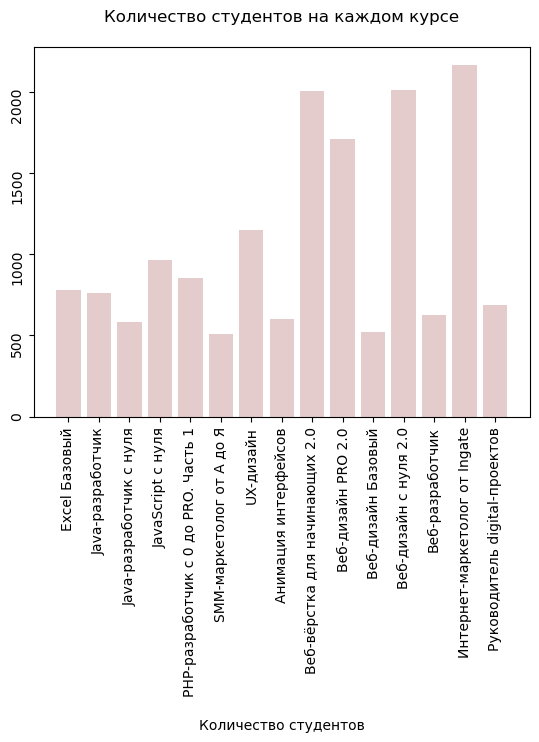

In [21]:
# Построим гистрограмму распределения количества учащихся на каждом курсе

fig, ax = plt.subplots()

ax.bar(stud_list.count().index, stud_list.count()['student_id'], color ='maroon',
       alpha = 0.2)
ax.set_xlabel('\nКоличество студентов')
ax.set_title('Количество студентов на каждом курсе\n')
ax.tick_params(rotation=90)
plt.show()

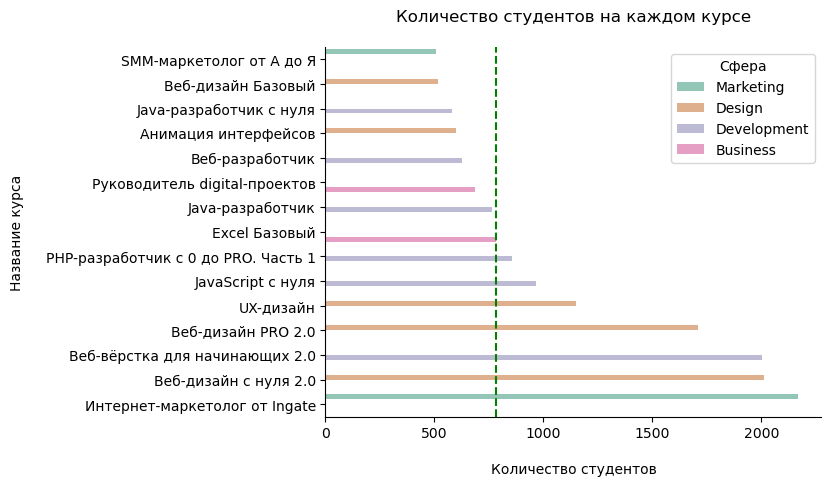

In [22]:
# Построим горизонтальную гистограмму, остортировав данные по количеству
# студентов на каждом курсе для наглядности

fig, ax = plt.subplots()

data = main_df[['course_title', 'course_field','student_id']].\
                drop_duplicates(subset=['course_title', 'student_id']).\
                groupby(['course_title', 'course_field']).count().\
                sort_values('student_id')
data.reset_index(inplace=True)

sns.barplot(data=data, y='course_title', x='student_id', hue='course_field',
            ax=ax, palette='Dark2', alpha=0.5)
plt.axvline(x=data['student_id'].median(), color='green', linestyle='--')
ax.set_xlabel('\nКоличество студентов')
ax.set_ylabel('Название курса\n')
ax.set_title('Количество студентов на каждом курсе\n')
ax.legend(title='Сфера')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

Самый популярный курс на платформе "Интернет маркетолог от Ingate". Так же высоко востребованы курсы "Веб-дизайн с нуля 2.0", "Веб-дизайн PRO 2.0" и "Веб-верстка для начинающих 2.0". Можем сделать вывод, что самым высоким спросом в данный момент пользуются курсы, связанные с созданием Веб-сайтов и e-commerce. Так же заметим, что в целом курсы в сфере Дизайна более популярные, чем остальные области обучения.

## 2. Расчет потенциальной нагрузки на преподавателей

1. **(p)** Рассчитать количество студентов в каждом месяце для каждого курса, которые начинали выполнение первой домашней работы в каждом месяце за всю историю (каждый месяц в диапазоне от марта 2016 года до июля 2019 года включительно). При этом расчёт идёт по первой домашней работе по программе курса (не просто по любой работе, которую конкретный студент начал первой). Обратите внимание, что на разных курсах разный номер модуля, где это ДЗ лежит, но при этом нужно придумать, как лаконично отфильтровать данные по этой информации. Здесь важно не прописывать вручную в запросе, где на каком модуле лежит первое ДЗ, а попробовать придумать, как оптимизировать этот процесс, чтобы наше решение работало даже если бы у нас было не 15 курсов, а 15 тысяч курсов, и каждый со своим номером, где лежит первое ДЗ.

<details>
<summary><b>Hint #1</b></summary>
    <p>
В этом задании для оптимального решения нужна фильтрация одного датасета по другому, которую можно выполнить через merge(). Первый датасет будет с «адресами» первых домашних работ на курсах в соответствии с их программой. Второй — датасет записями о домашних работах студентов.
    </p>
    <br>
</details>
<details>
<summary><b>Hint #2</b></summary>
    <p>
Для создания датасета с «адресами» первых домашних работ на курсах в соответствии с их программой понадобится метод agg().
    </p>
    <br>
</details>

In [45]:
# Создаем датасет с данными по домашним работам

hw = main_df[main_df['is_homework'] == True]

In [24]:
# Создаем датасет, в котором будет сожержаться информация о том, какая первая
# домашняя работа представлена в курсе

first_hw = hw.sort_values(['course_title', 'module_number', 'lesson_number']).\
                        groupby('course_title').nth(0).reset_index()\
                        [['course_title', 'module_number', 'lesson_number']]
first_hw

course_title  module_number  lesson_number
0                         Excel Базовый              1             11
1                      Java-разработчик              1              8
2               Java-разработчик c нуля              1              7
3                     JavaScript с нуля              1              7
4   PHP-разработчик с 0 до PRO. Часть 1              1              5
5              SMM-маркетолог от А до Я              1              6
6                             UX-дизайн              1              8
7                  Анимация интерфейсов              1              3
8        Веб-вёрстка для начинающих 2.0              1              6
9                    Веб-дизайн PRO 2.0              1              6
10                   Веб-дизайн Базовый              3              2
11                Веб-дизайн с нуля 2.0              1              9
12                      Веб-разработчик              1              2
13        Интернет-маркетолог от Ingate              1              7
14        Руководитель digital-проектов              1              4

In [ ]:
# Создадим столбец в датасет hw с информацией о месяце и годе, когда студент
# приступил к изучению урока

hw['start_date'] = pd.to_datetime(hw['start_date'], yearfirst = True,
                                  format = 'mixed').dt.normalize()
hw['finish_date'] = pd.to_datetime(hw['finish_date'], yearfirst = True,
                                   format = 'mixed').dt.normalize()


hw['date_first_hw'] = hw['start_date'].dt.to_period("M")


In [26]:
# Объединим полученные датасеты

start_hw = hw.merge(first_hw,
                    on = ['course_title', 'module_number', 'lesson_number'],
                    how = 'inner')

# Сгруппируем данные по курсу и месяцу и посчитаем, скольку студентов присутпили 
# к выполнению домашнего задания в данном периоде

res = start_hw.groupby(['course_title', 'date_first_hw'])[['student_id']].\
               agg('count')
res

student_id
course_title                  date_first_hw            
Excel Базовый                 2018-02                 6
                              2018-03                 3
                              2018-05                 3
                              2018-06                 9
                              2018-07                13
...                                                 ...
Руководитель digital-проектов 2019-03                36
                              2019-04                17
                              2019-05                25
                              2019-06                15
                              2019-07                20

[244 rows x 1 columns]

2. **(m)** На основании первого пункта построить line-graph с приростом студентов в каждом месяце для каждого курса. 15 графиков. Графики должны иметь заголовки, оси должны быть подписаны. Ticks нужно развернуть так, чтобы они были читаемы.

In [27]:
# Подготовим данные для прорисовки графика. 

data = res.reset_index()
data['date_first_hw'] = data['date_first_hw'].dt.strftime('%Y-%m')


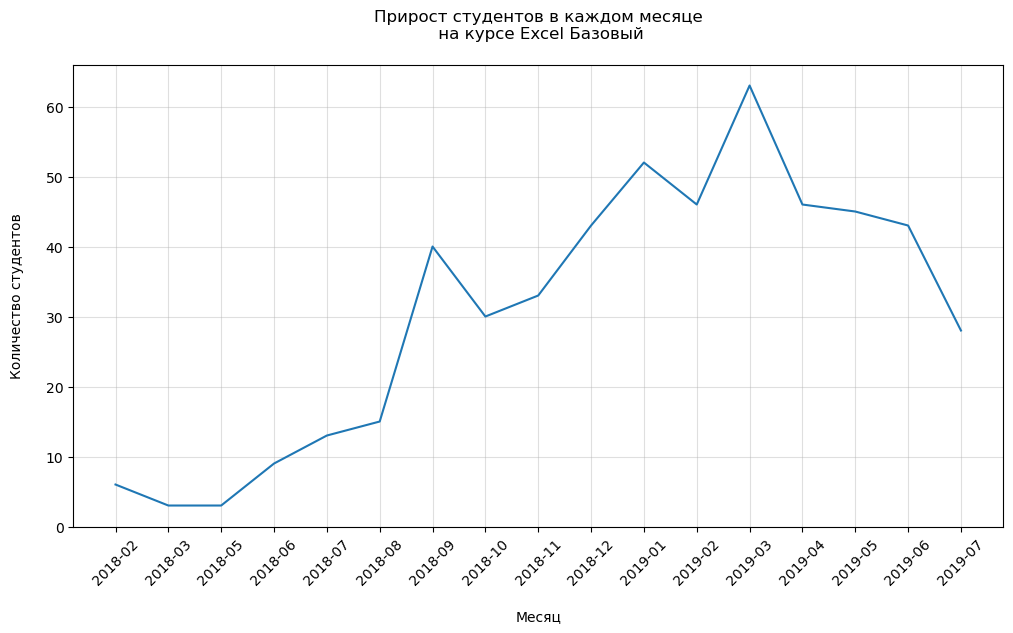

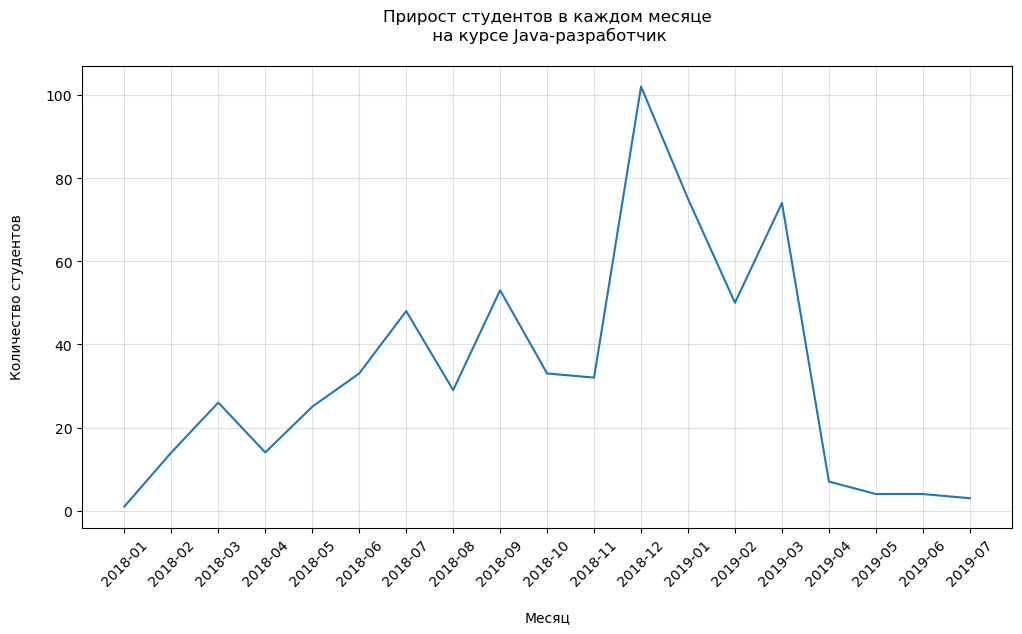

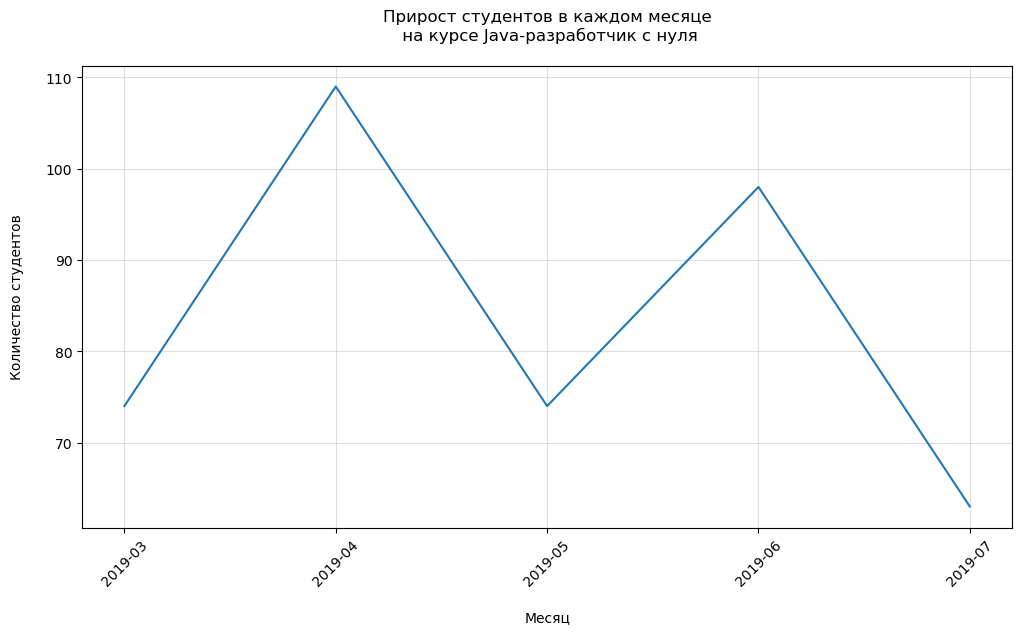

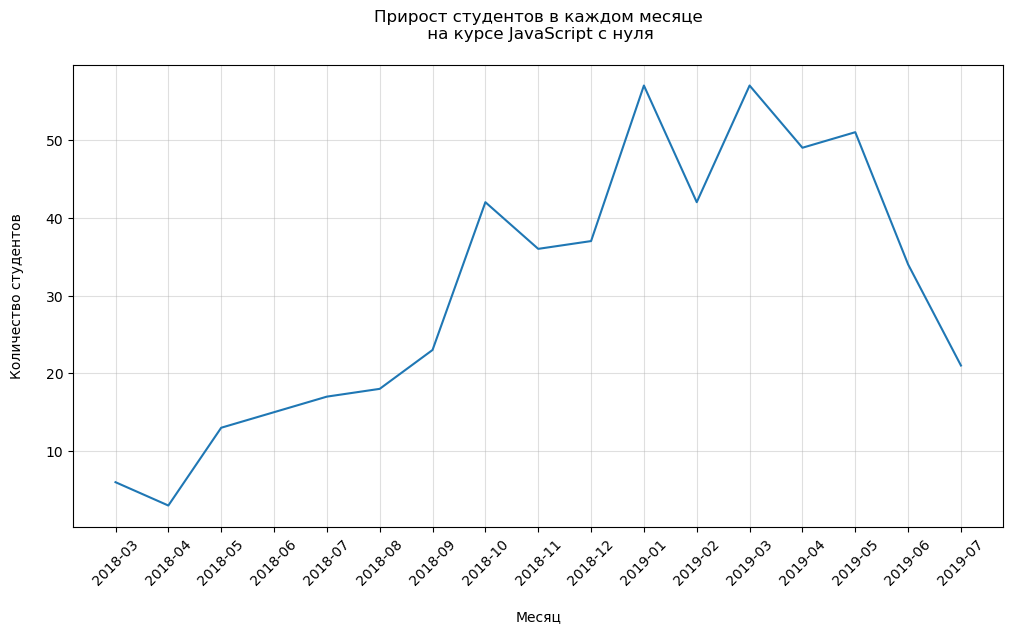

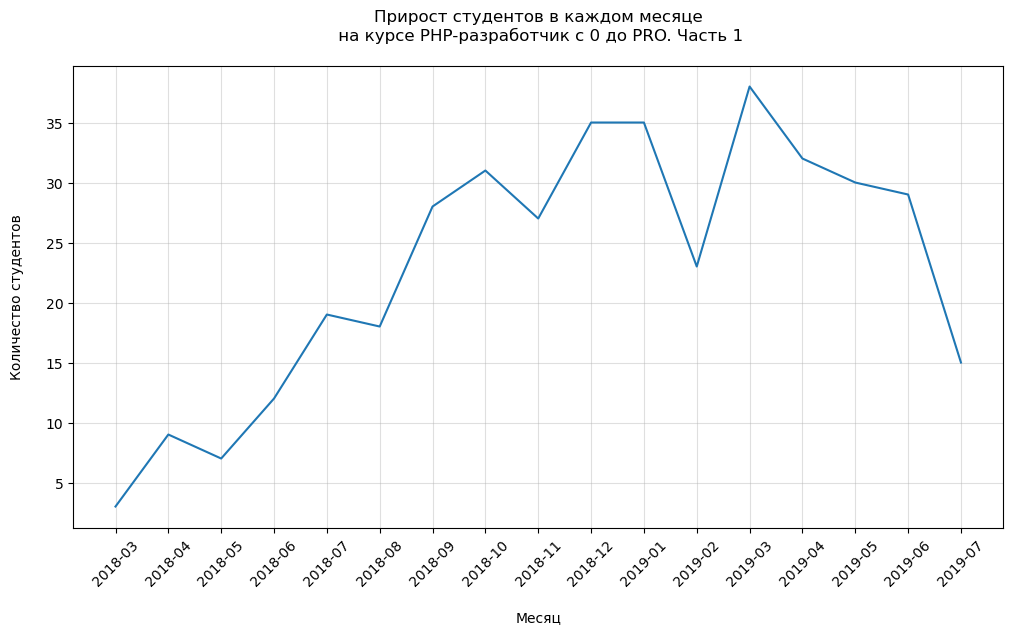

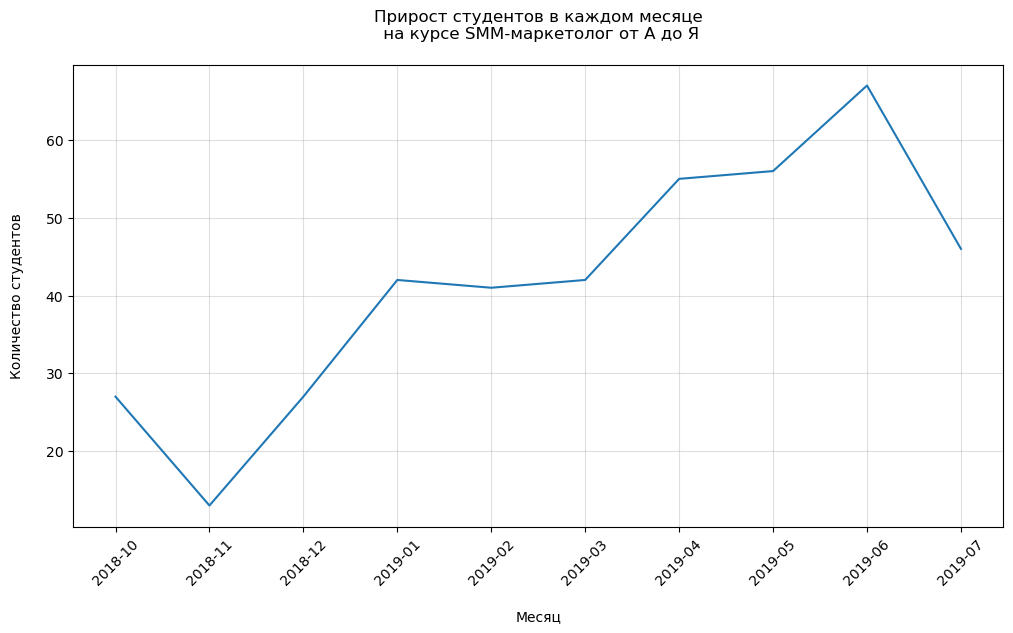

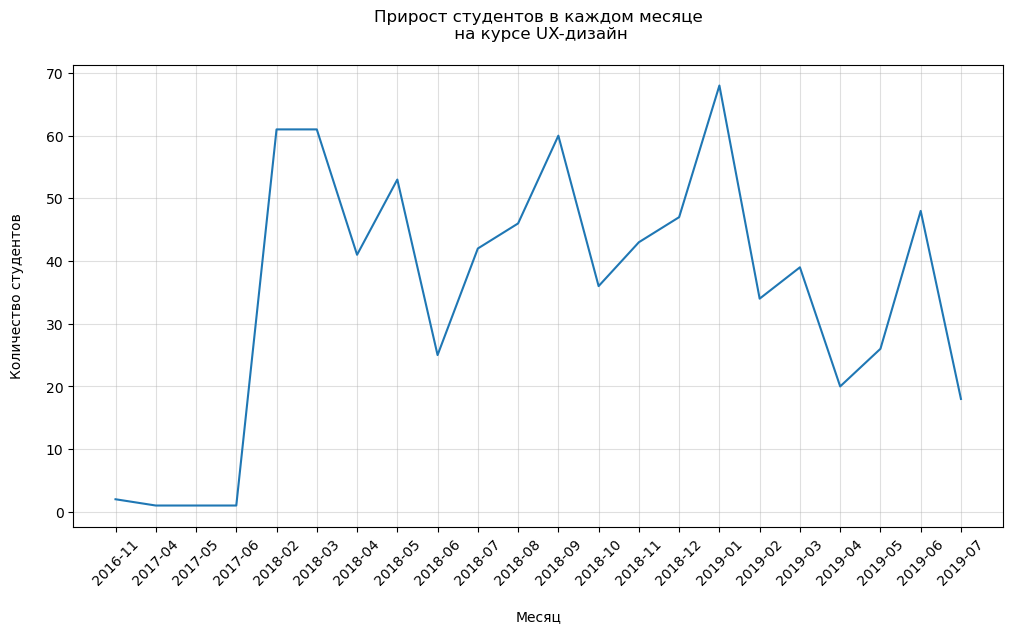

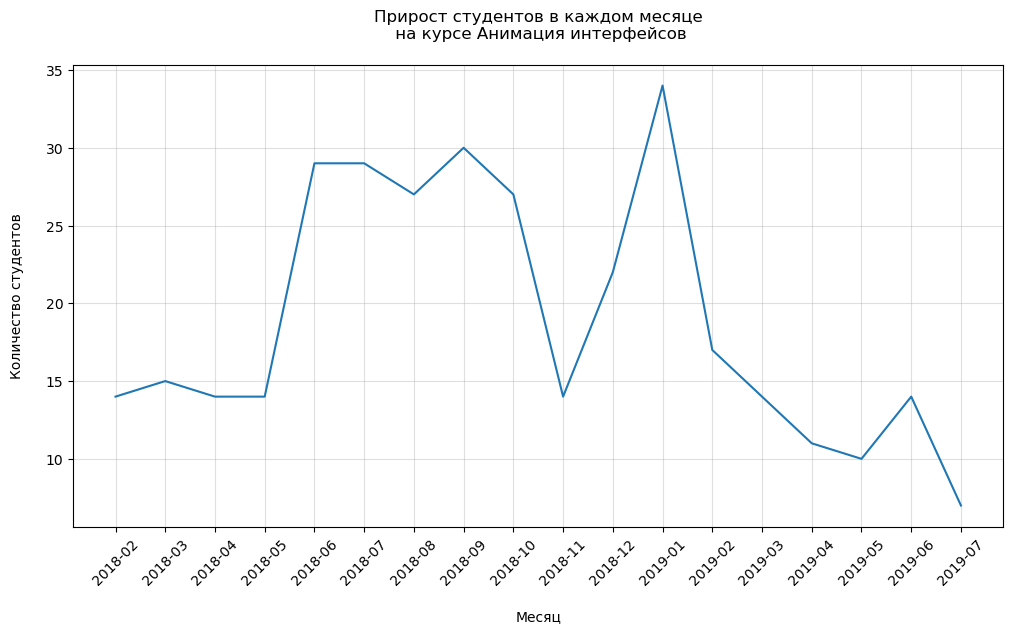

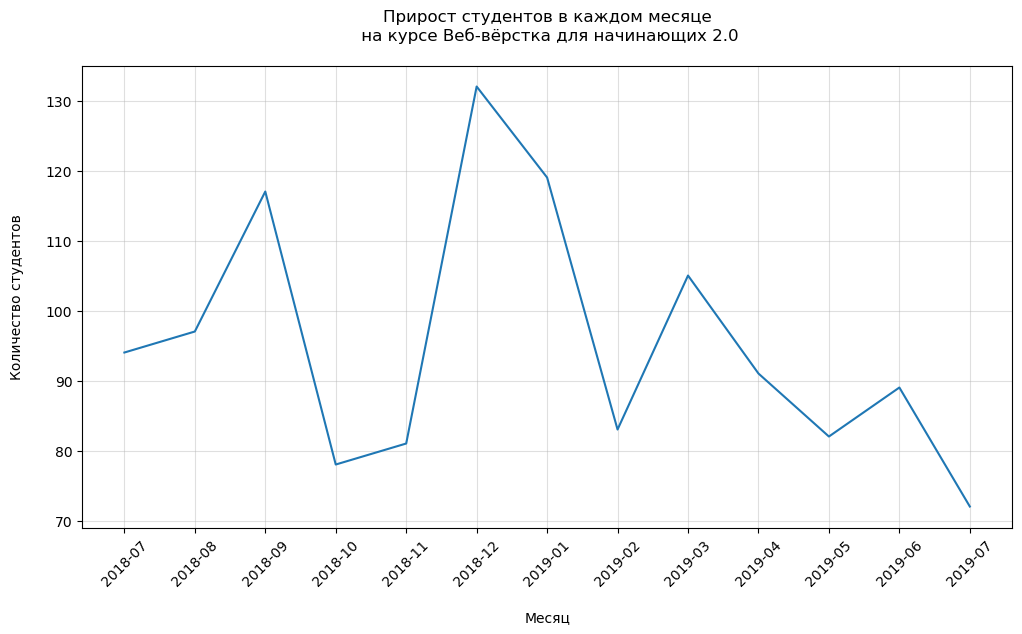

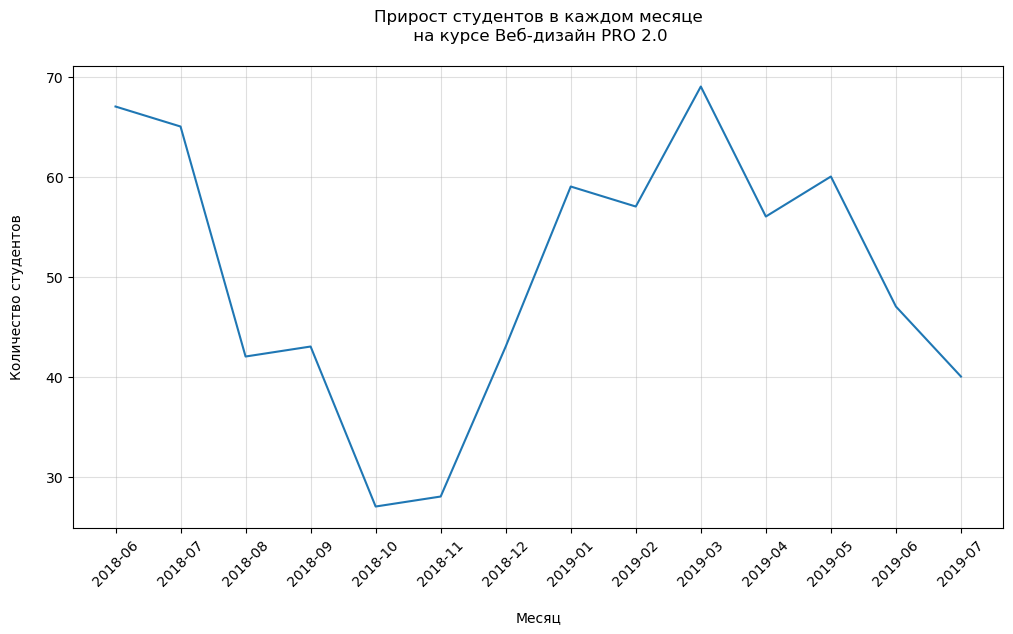

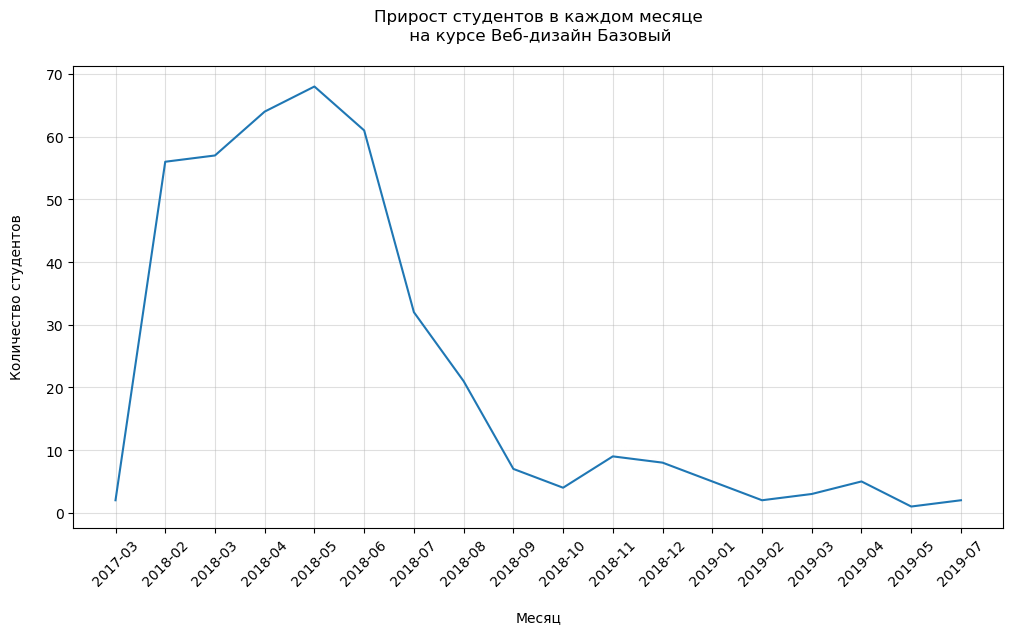

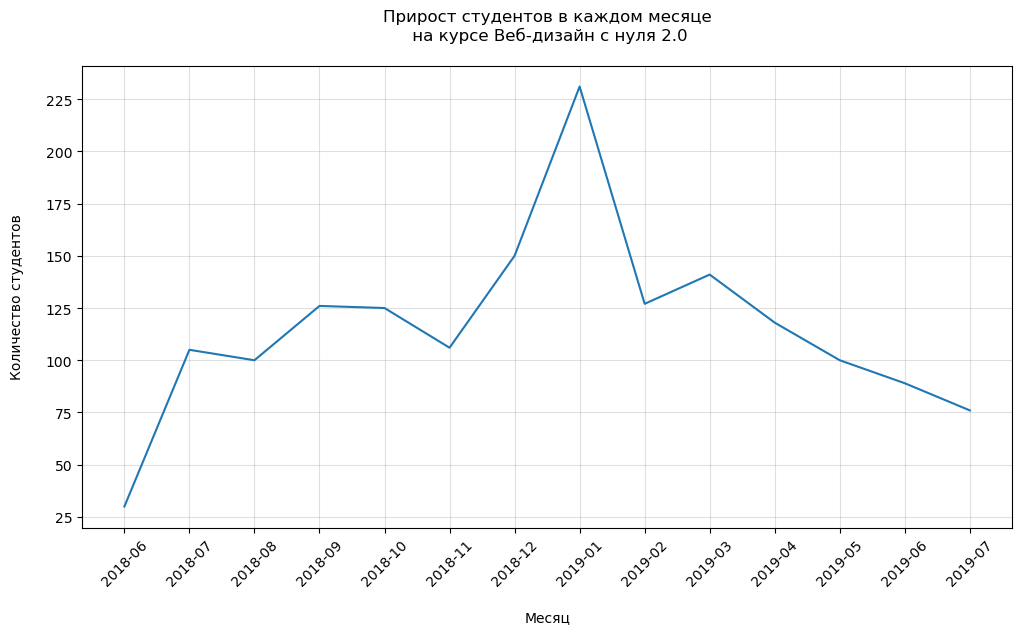

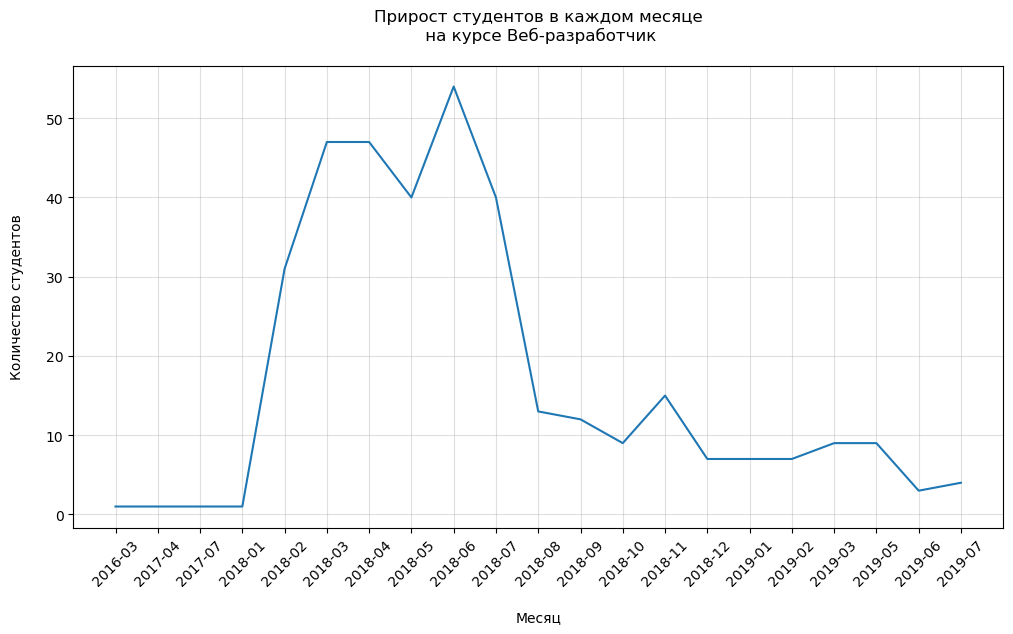

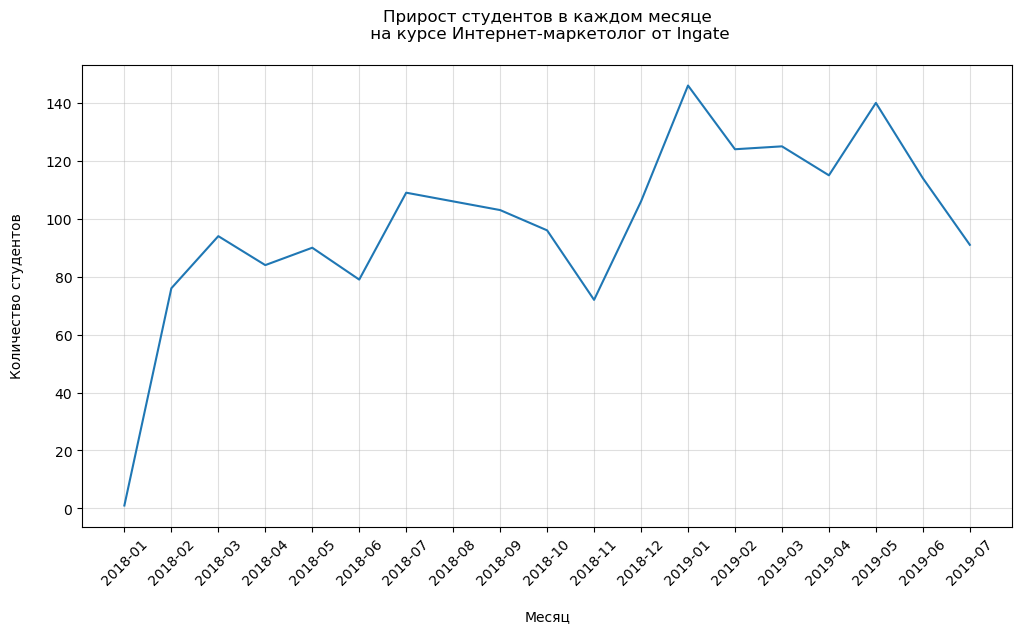

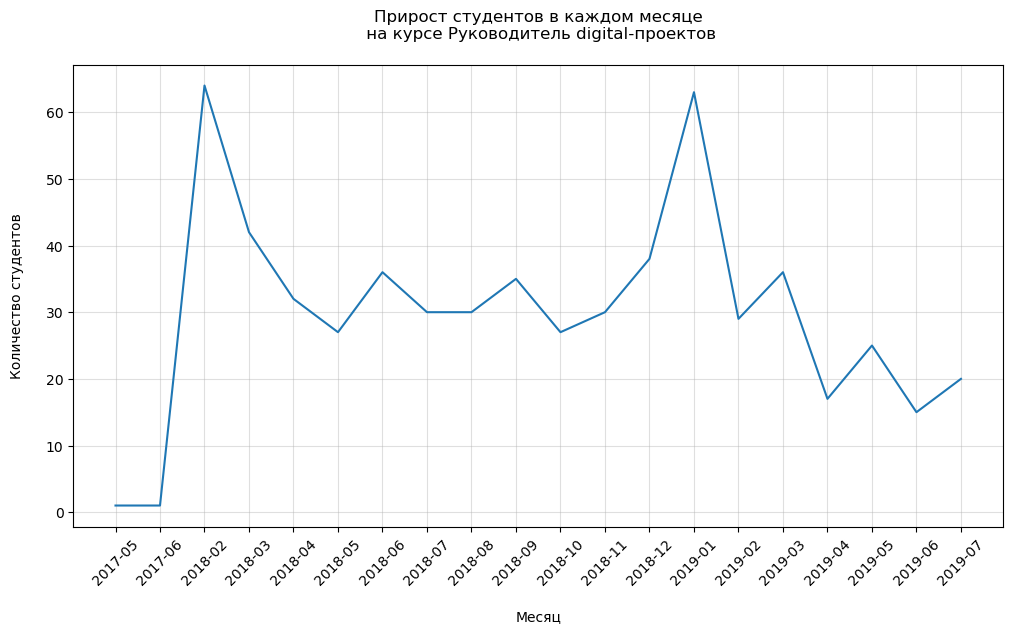

In [28]:
# Прорисуем в цикле график по каждому курсу:

for _course in first_hw['course_title']:

    
    fig, ax = plt.subplots(figsize = (12,6))
    ax.tick_params(axis='x', rotation=45)
    plt.plot(data[data['course_title'] == _course]['date_first_hw'],\
         data[data['course_title'] == _course]['student_id'])
    
    ax.set_title(f'Прирост студентов в каждом месяце\n на курсе {_course}\n')
    ax.set_xlabel('\nМесяц')
    ax.set_ylabel('Количество студентов\n')
    
    plt.grid(alpha=0.4)
    plt.show()


3. **(m)** На основании первого пункта построить line-graph с несколькими линиями, отражающими прирост студентов в каждом месяце для каждого курса. 15 линий на графике. Ticks нужно развернуть так, чтобы они были читаемы. График должен иметь заголовок. Ось, отражающая прирост, должна быть подписана. Линия для каждого курса должна иметь свой цвет (нужна легенда). Рамок у графика быть не должно ⭐

In [29]:
# Отсортируем данные для графика по дате для корректного отображения

data = data.sort_values('date_first_hw')

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


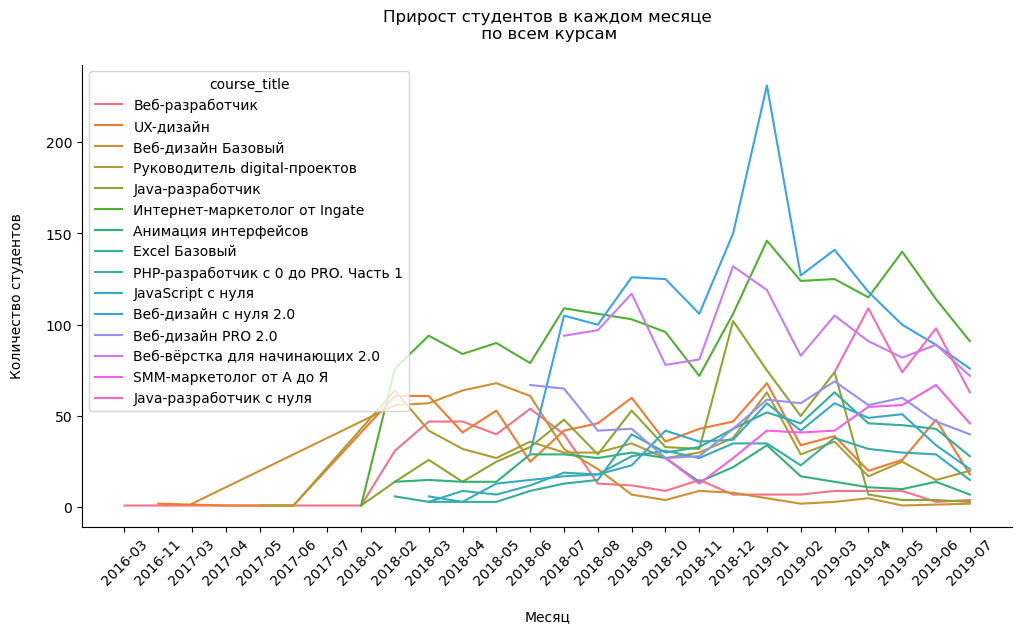

In [30]:
# Построим график 

fig, ax = plt.subplots(figsize=(12,6))

ax.tick_params(axis='x', rotation=45)

sns.lineplot(data=data, x='date_first_hw', y='student_id', hue='course_title', ax=ax)

ax.set_title(f'Прирост студентов в каждом месяце\n по всем курсам\n')
ax.set_xlabel('\nМесяц')
ax.set_ylabel('Количество студентов\n')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
    
plt.show()


4. **(p)** Рассчитать количество прогрессов по выполнению домашних работ в каждом месяце за всю историю (каждый месяц в диапазоне от марта 2016 года до июля 2019 года включительно) для каждого курса. Учитывать, что выполнение домашнего задания может перетекать из одного месяца в другой (такие ДЗ надо включать в общее число прогрессов для всех месяцев, которые покрывает срок выполнения этих ДЗ).  Если у нас нет финишной даты, то мы можем либо учесть эту работу как нагрузку только в самом первом месяце, либо как нагрузку во всех месяцах с начала выполнения работы до даты, когда был выгружен датафрейм (последняя встречающаяся дата в дф). Таким образом, нам для каждого месяца по каждому курсу нужно посчитать количество домашних работ, которые пришлось проверять преподавателям.

<details>
<summary><b>Hint #1</b></summary>
    <p>
В этом задании для оптимального решения понадобятся методы date_range(), explode() из Pandas, а также модуль pandas.tseries.offsets и методы MonthEnd, MonthBegin и Day из него.
    </p>
    <br>
</details>



In [ ]:
# Приведем столбцы с датами в нужный нам вид

hw['start_date'] = hw['start_date'].dt.to_period("M")
hw['finish_date'] = hw['finish_date'].dt.to_period("M")
hw['start_date'] = hw['start_date'].dt.strftime('%Y-%m-%d')
hw['finish_date'] = hw['finish_date'].dt.strftime('%Y-%m-%d')

In [32]:
# Создадим датасет load_tacher на основе уже существующего hw, в котором
# содержится информация только по тем урокам, где есть домашнее задание

load_teacher = hw.loc[:]
load_teacher.head()

progress_id  module_number  lesson_number status  \
0  8459fbc07e32ec92bd7b43d7df9bfa89              4              3   done   
1  cc5799c97826d79ac3ede2791daac00e              4              3   fail   
2  287a0ef515f4011877f559b8b25e0023              4              3   done   
3  f509f6a3dccb8eda2aafcfe56d2efc48              4              3   done   
4  17cc1bdd5d69eda56e3cca1c70cbae36              4              3   done   

   start_date finish_date                        student_id  \
0  2018-02-28  2018-02-28  a6ae278c0eab719b3784e5ea147c128f   
1  2018-03-31         NaN  9dfc270466449081a82b19afd5fd44f4   
2  2018-04-30  2018-11-30  12f268f55937f8944e581af9cd410817   
3  2018-06-30  2018-09-30  1e3b956482994c0b5c11c822f176cb22   
4  2018-08-31  2018-08-31  c8ce8ad31f42723fb77d1da2f28610db   

                          course_id                   course_title  \
0  0770b1b039964228294f1f34b29fc2c1  Руководитель digital-проектов   
1  0770b1b039964228294f1f34b29fc2c1  Руководитель digital-проектов   
2  0770b1b039964228294f1f34b29fc2c1  Руководитель digital-проектов   
3  0770b1b039964228294f1f34b29fc2c1  Руководитель digital-проектов   
4  0770b1b039964228294f1f34b29fc2c1  Руководитель digital-проектов   

  course_field               module_title     lesson_title  \
0     Business  Аналитика. Базовые навыки  Домашняя работа   
1     Business  Аналитика. Базовые навыки  Домашняя работа   
2     Business  Аналитика. Базовые навыки  Домашняя работа   
3     Business  Аналитика. Базовые навыки  Домашняя работа   
4     Business  Аналитика. Базовые навыки  Домашняя работа   

                           lesson_token  is_video  is_homework date_first_hw  
0  e977dbbd-0b9f-461d-8599-b4abdc9e54f9     False         True       2018-02  
1  e977dbbd-0b9f-461d-8599-b4abdc9e54f9     False         True       2018-03  
2  e977dbbd-0b9f-461d-8599-b4abdc9e54f9     False         True       2018-04  
3  e977dbbd-0b9f-461d-8599-b4abdc9e54f9     False         True       2018-06  
4  e977dbbd-0b9f-461d-8599-b4abdc9e54f9     False         True       2018-08

In [33]:
# Пропущенные значения в столбце finish_date заполним значениям из start_date

load_teacher['finish_date'] = load_teacher['finish_date'].\
                                          fillna(load_teacher['start_date'])
load_teacher.head()

progress_id  module_number  lesson_number status  \
0  8459fbc07e32ec92bd7b43d7df9bfa89              4              3   done   
1  cc5799c97826d79ac3ede2791daac00e              4              3   fail   
2  287a0ef515f4011877f559b8b25e0023              4              3   done   
3  f509f6a3dccb8eda2aafcfe56d2efc48              4              3   done   
4  17cc1bdd5d69eda56e3cca1c70cbae36              4              3   done   

   start_date finish_date                        student_id  \
0  2018-02-28  2018-02-28  a6ae278c0eab719b3784e5ea147c128f   
1  2018-03-31  2018-03-31  9dfc270466449081a82b19afd5fd44f4   
2  2018-04-30  2018-11-30  12f268f55937f8944e581af9cd410817   
3  2018-06-30  2018-09-30  1e3b956482994c0b5c11c822f176cb22   
4  2018-08-31  2018-08-31  c8ce8ad31f42723fb77d1da2f28610db   

                          course_id                   course_title  \
0  0770b1b039964228294f1f34b29fc2c1  Руководитель digital-проектов   
1  0770b1b039964228294f1f34b29fc2c1  Руководитель digital-проектов   
2  0770b1b039964228294f1f34b29fc2c1  Руководитель digital-проектов   
3  0770b1b039964228294f1f34b29fc2c1  Руководитель digital-проектов   
4  0770b1b039964228294f1f34b29fc2c1  Руководитель digital-проектов   

  course_field               module_title     lesson_title  \
0     Business  Аналитика. Базовые навыки  Домашняя работа   
1     Business  Аналитика. Базовые навыки  Домашняя работа   
2     Business  Аналитика. Базовые навыки  Домашняя работа   
3     Business  Аналитика. Базовые навыки  Домашняя работа   
4     Business  Аналитика. Базовые навыки  Домашняя работа   

                           lesson_token  is_video  is_homework date_first_hw  
0  e977dbbd-0b9f-461d-8599-b4abdc9e54f9     False         True       2018-02  
1  e977dbbd-0b9f-461d-8599-b4abdc9e54f9     False         True       2018-03  
2  e977dbbd-0b9f-461d-8599-b4abdc9e54f9     False         True       2018-04  
3  e977dbbd-0b9f-461d-8599-b4abdc9e54f9     False         True       2018-06  
4  e977dbbd-0b9f-461d-8599-b4abdc9e54f9     False         True       2018-08

In [ ]:
# Добавим в датасет столбец, в котором будет содержаться списко с датами в 
# промежутке от начала выполнения домашней работы до ее окончания

f = lambda x: pd.date_range(start = x[0], end = x[1], freq="M")
    
load_teacher['progresse_hw'] = load_teacher.loc[:,'start_date':'finish_date'].\
                                            apply(f, axis=1)

In [35]:
# "Взорвем датасет", чтобы каждому значению из полученного списка дат 
# соответствовала строка

load_teacher = load_teacher.explode('progresse_hw')

# Приведем даты в нужный нам вид

load_teacher['progresse_hw'] = load_teacher['progresse_hw'].dt.to_period("M")

# Сгруппируем датасет по курсам и месяцам прохождения и подсчитаем количество
# студентов

load_teacher = load_teacher.groupby(['course_title', 'progresse_hw'])\
                            [['student_id']].agg('count')
load_teacher = load_teacher.reset_index()
load_teacher['progresse_hw'] = load_teacher['progresse_hw'].dt.strftime('%Y-%m')

load_teacher

course_title progresse_hw  student_id
0                    Excel Базовый      2018-02          37
1                    Excel Базовый      2018-03           7
2                    Excel Базовый      2018-04          13
3                    Excel Базовый      2018-05          17
4                    Excel Базовый      2018-06          37
..                             ...          ...         ...
253  Руководитель digital-проектов      2019-03         385
254  Руководитель digital-проектов      2019-04         284
255  Руководитель digital-проектов      2019-05         291
256  Руководитель digital-проектов      2019-06         231
257  Руководитель digital-проектов      2019-07         174

[258 rows x 3 columns]

5. **(m)** Построить line-graph по четвёртому пункту. 15 графиков. Графики должны иметь заголовки, оси должны быть подписаны. Ticks нужно развернуть так, чтобы они были читаемы.

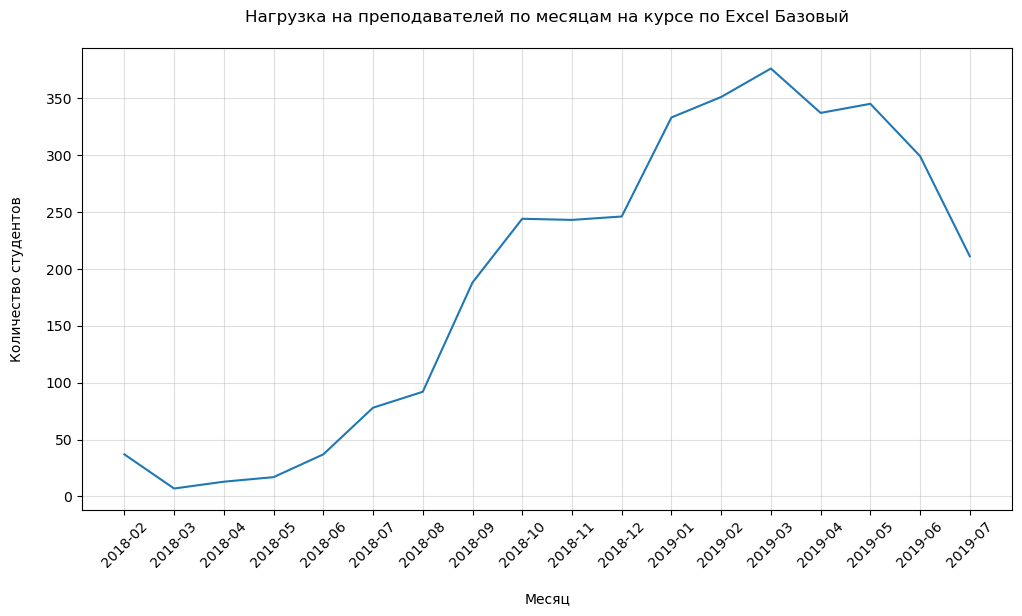

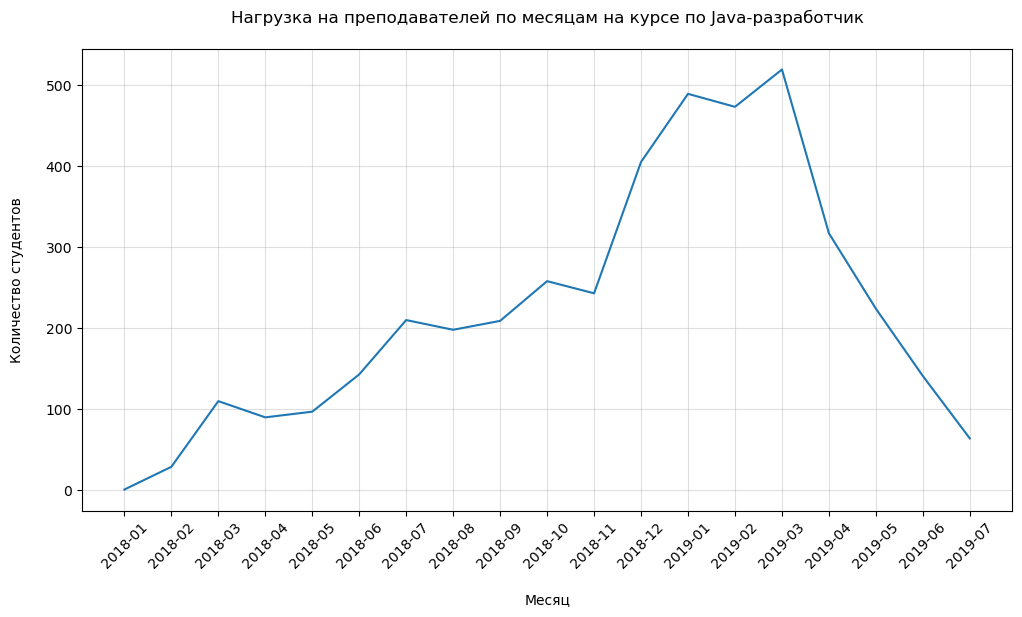

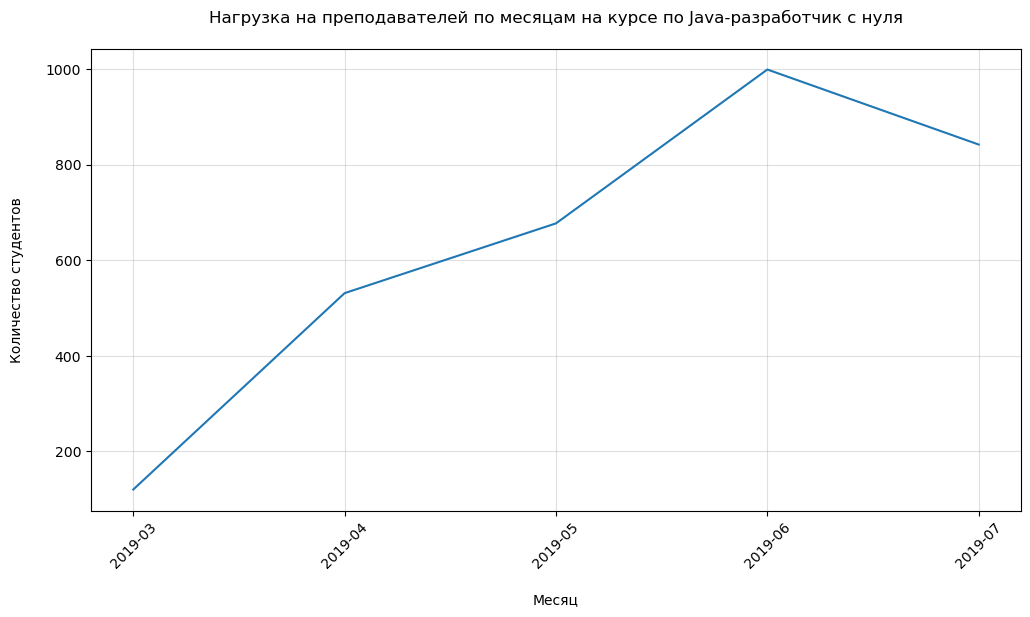

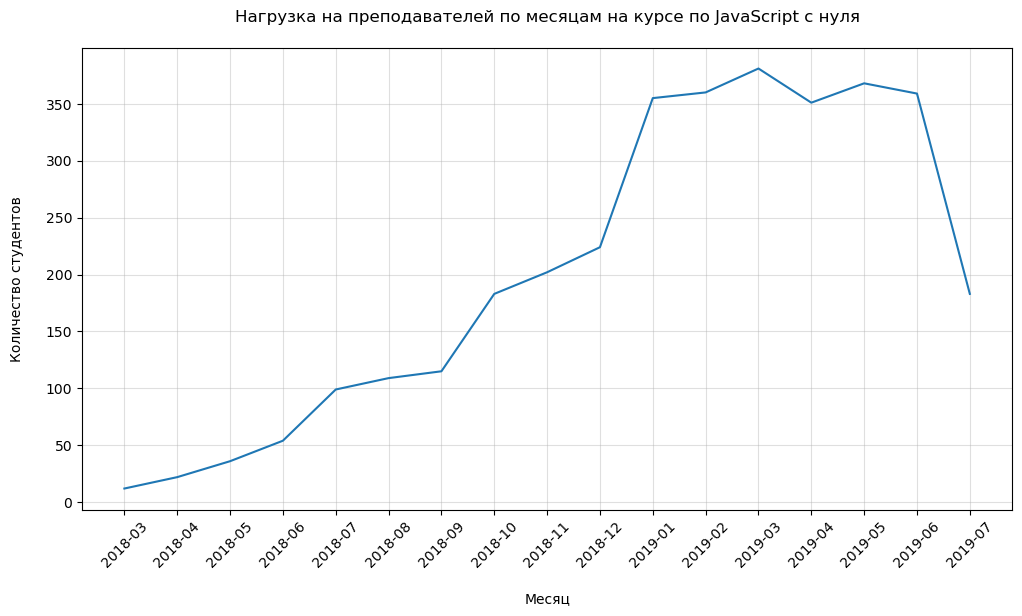

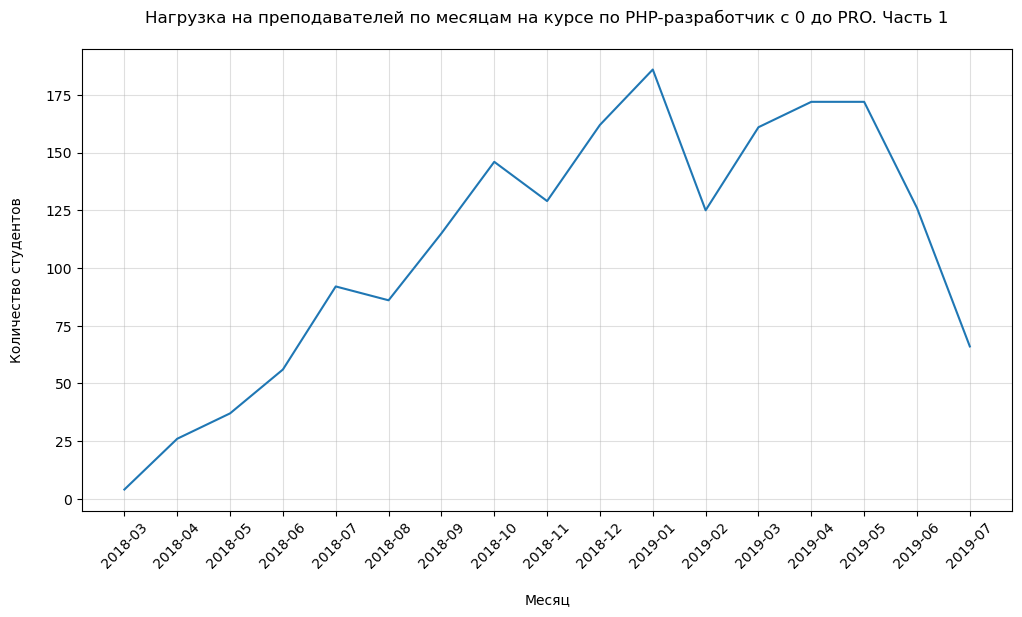

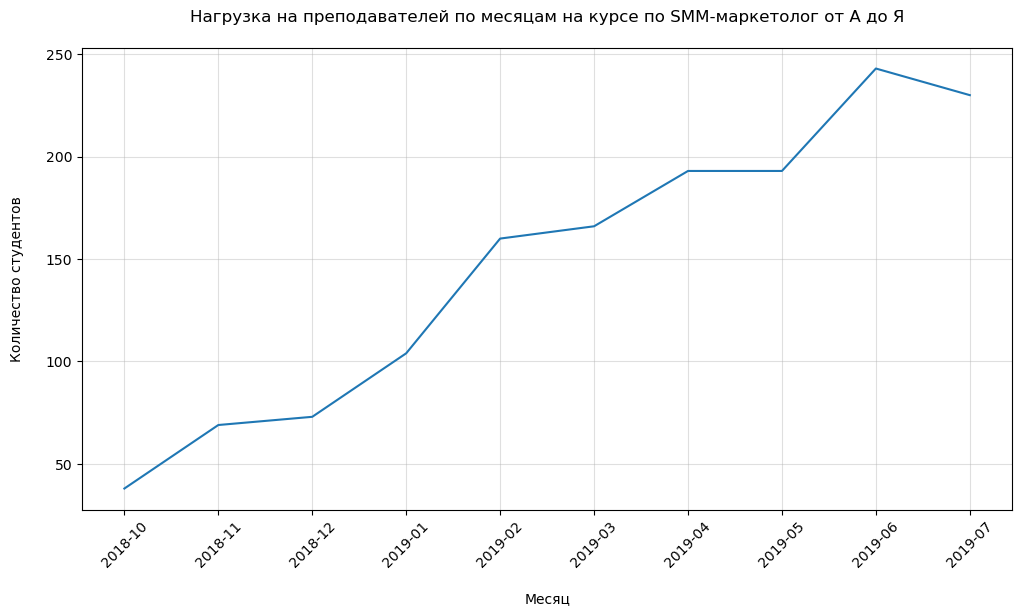

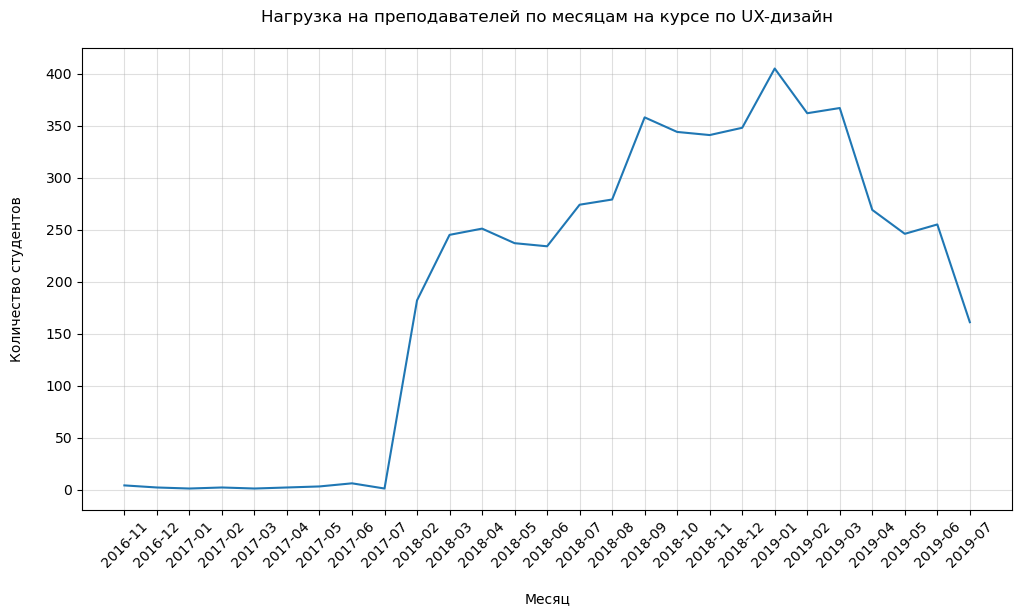

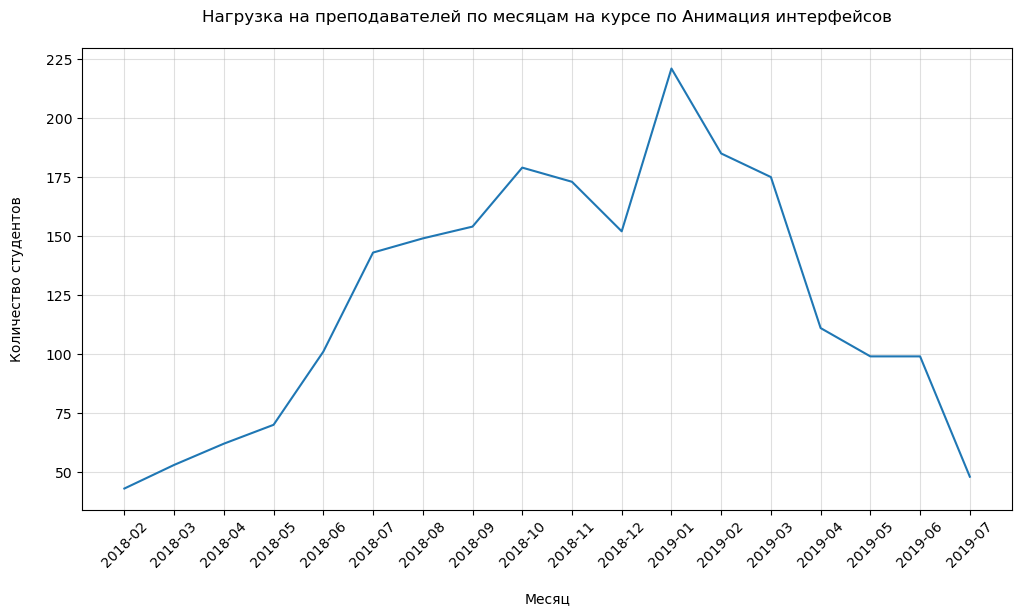

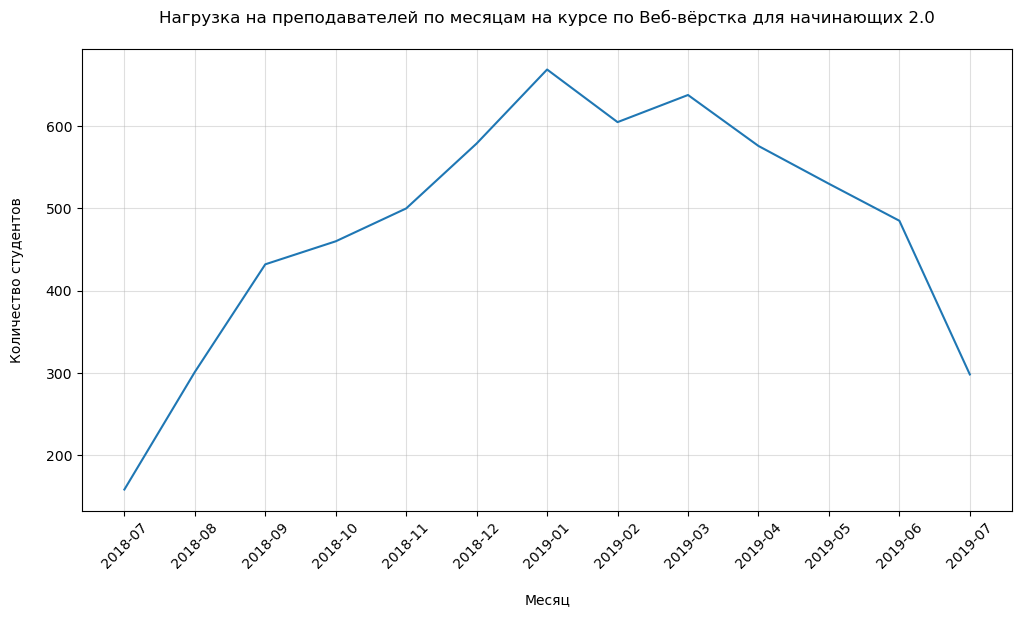

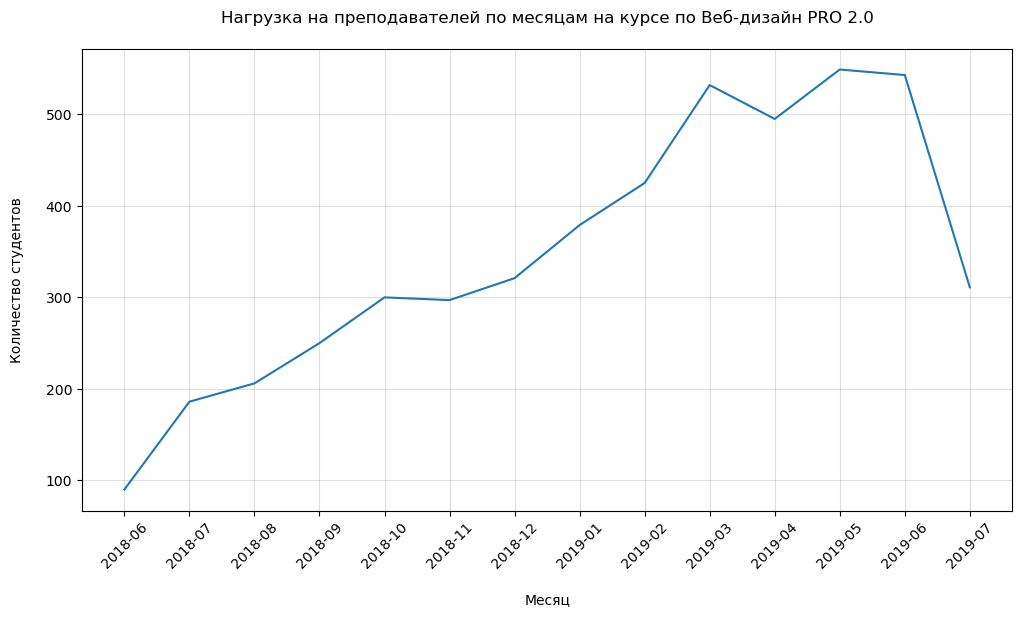

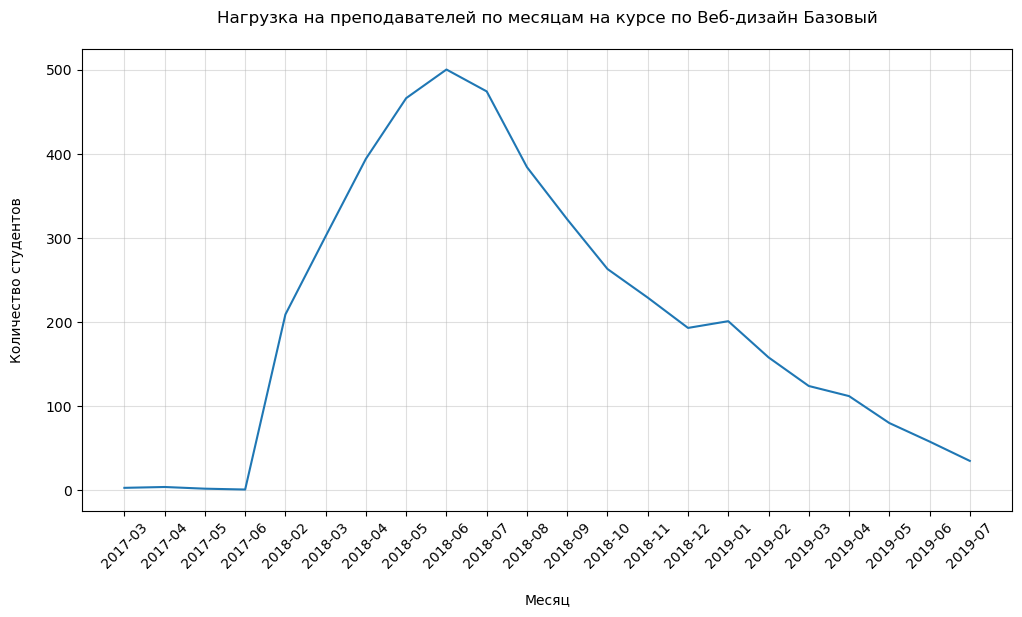

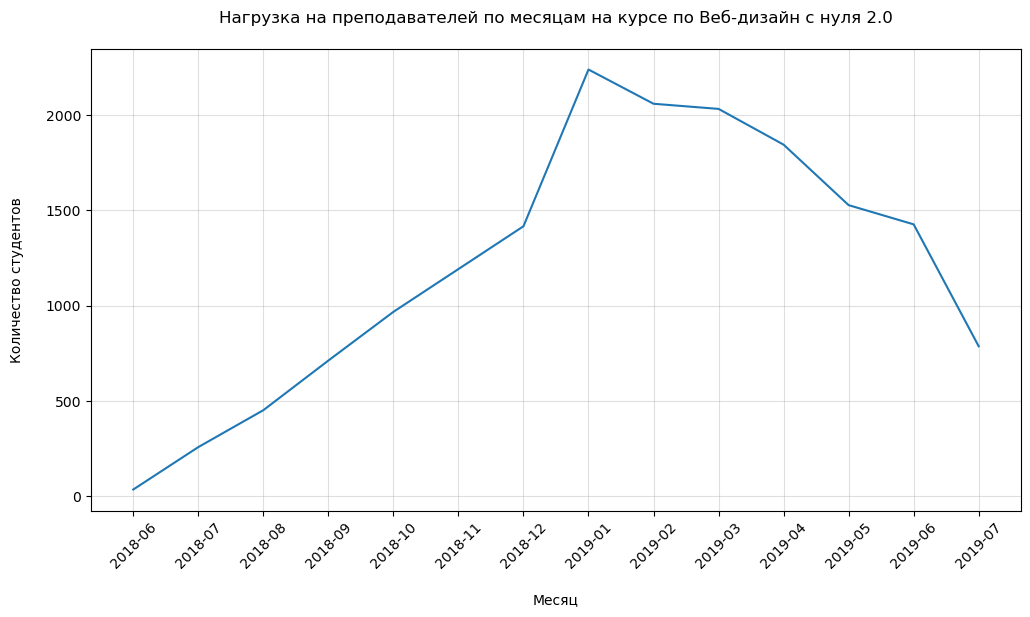

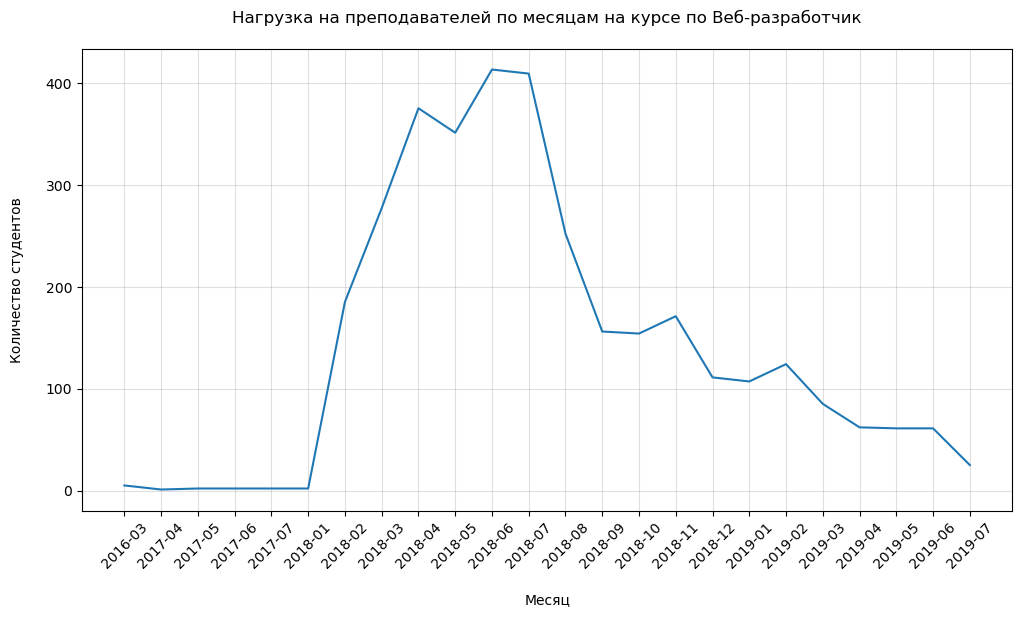

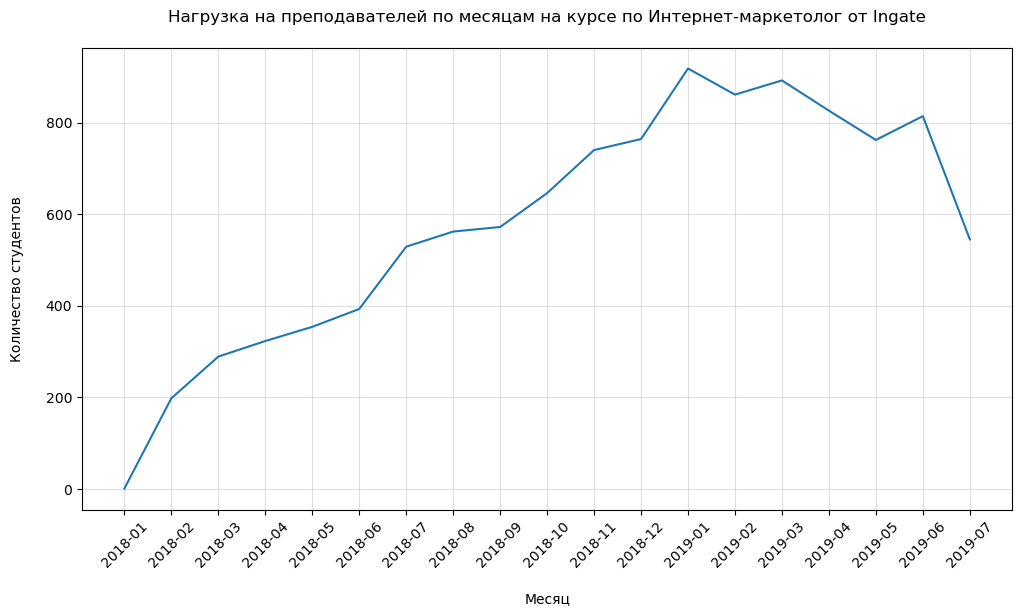

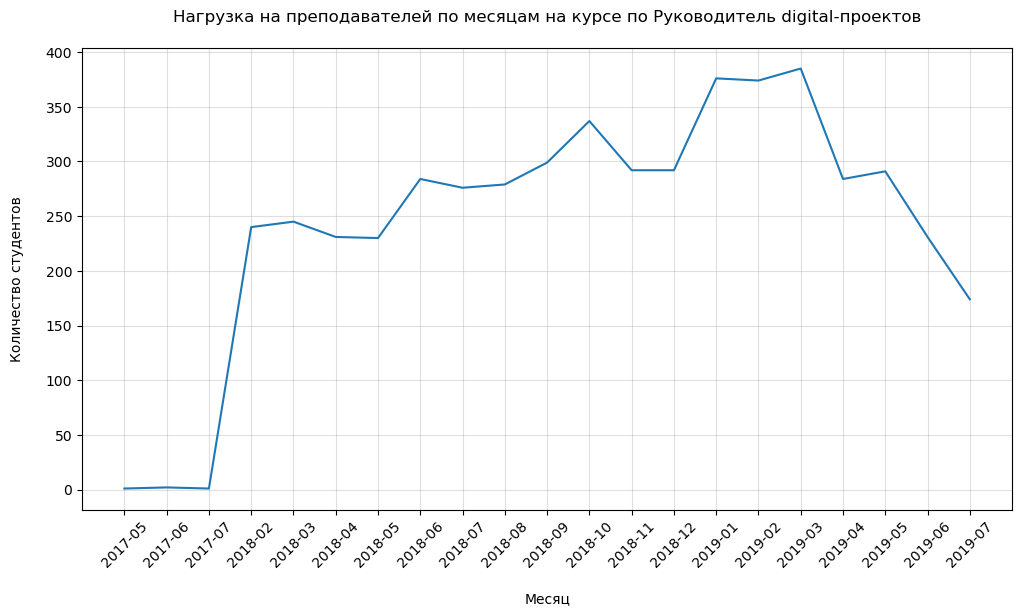

In [36]:
# В цикле построим графики для каждого курса

for _course in first_hw['course_title']:

    fig, ax = plt.subplots(figsize = (12,6))

    ax.tick_params(axis='x', rotation=45)
    plt.plot(load_teacher[load_teacher['course_title'] == _course]['progresse_hw'],
         load_teacher[load_teacher['course_title'] == _course]['student_id'])
    
    ax.set_title(f'Нагрузка на преподавателей по месяцам на курсе по {_course}\n')
    ax.set_xlabel('\nМесяц')
    ax.set_ylabel('Количество студентов\n')
    
    plt.grid(alpha=0.4)
    plt.show()

6. **(m)** Построить один line-graph для всех курсов по четвёртому пункту. 15 линий на графике. Ticks нужно развернуть так, чтобы они были читаемы. График должен иметь заголовок. Ось, отражающая количество прогрессов, должна быть подписана. Линия для каждого курса должна иметь свой цвет (нужна легенда). Рамок у графика быть не должно ⭐

In [37]:
# Отсортируем данные для графика по дате для корректного отображения

load_teacher = load_teacher.sort_values('progresse_hw')

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


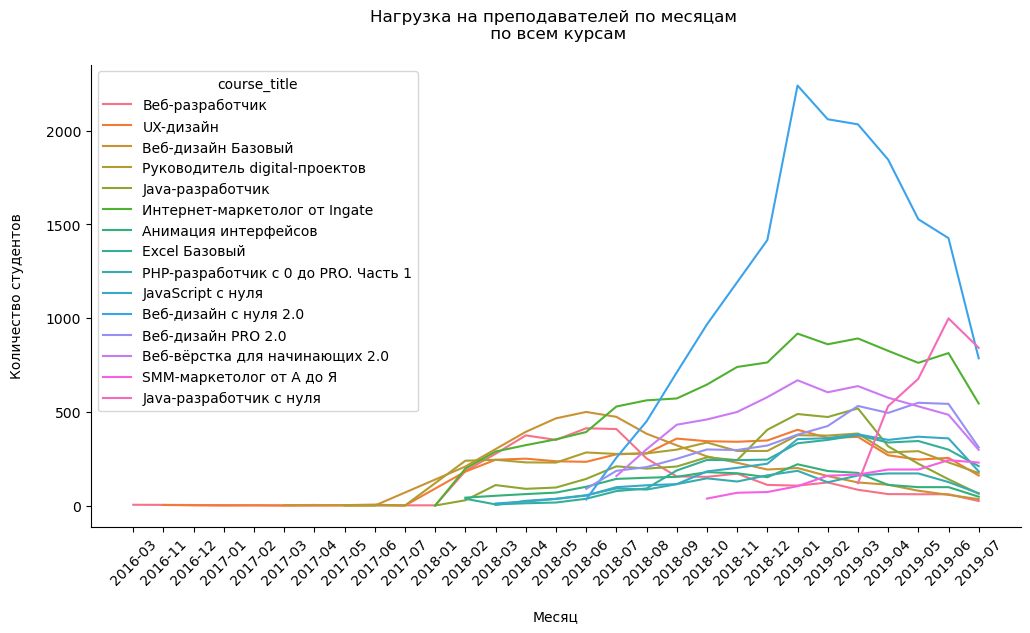

In [38]:
# Построим график 

fig, ax = plt.subplots(figsize=(12,6))

ax.tick_params(axis='x', rotation=45)

sns.lineplot(data=load_teacher, x='progresse_hw', y='student_id', hue='course_title',
             ax=ax)

ax.set_title(f'Нагрузка на преподавателей по месяцам \n по всем курсам\n')
ax.set_xlabel('\nМесяц')
ax.set_ylabel('Количество студентов\n')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
    
plt.show()


7. На основании рассчитанных значений сделайте аналитический вывод (должен быть полным и покрывать все полученные выше метрики).

Анализ данных показал, что самая высокая нагрузка на курсе "Веб-дизайн с нуля 2.0". Этот курс так же оказался в тройке лидеров по количеству студентов за весь период. Отметим, что практически на всех курсах наблюдается снижение нагрузки. У курсов:

 * Интернет маркетолог от Ingate
 * Веб-верстка для начинающих 2.0
 * UX-дизайн
 * JavaScript с нуля
 * Java разработчик
 * Руководитель digital-проектов
 
пики приходятся на январь 2019, а после наблюдается снижение. В это же время наблюдается снижение так же и среди прироста новых студентов. Это может быть связано с появлением конкурентов на рынке онлайн образования. Некоторые курсы пришли по нагрузке пришли к своим первоначальным показателям при запуске курсов.

Зато на одном из самых новых курсов на платформе - "Java разработчик с нуля" - нагрузка выросла и оказалась даже выше нагрузки самого популярного курса на платформе "Интернет маркетолог от Ingate»

Есть несколько курсов, на которые стоит обратить более пристально внимание. Курс "Веб-дизайн Базовый" после мая 2018 года показал сильное снижение прироста студентов. Этот показатель снизился до уровня меньше 10 уникальных пользователей в месяц и держится на этом уровне с сентября 2018 по июль 2019 года. Похожая негативная динамика у куса Веб разработка. После пика в июне 2018 года. Далее резкий спад. И с декабря 2018 по июль 2019 года прирост держится на показателе меньше 10 пользователей в месяц. Показатели нагрузки на этих курсах так же одни из самых низких и достигают 10-20 домашних работ в месяц.

## 3. Выявление проблемных модулей

1. **(p)** Рассчитать минимальное, максимальное, среднее, медианное время прохождения каждого модуля (разность между временем начала и окончания выполнения домашней работы) для каждого курса. Если домашних заданий в модуле несколько, то считать разность между временем начала выполнения первой домашней работы и временем окончания выполнения последней домашней работы в модуле. Записи без финишной даты для этого пункта имеет смысл удалить

In [51]:
# На базе датасета hw создадим датасет module_time, в котором будет 
# содержаться информация только по тем начатым домашним работам,
# который были закончены студентами.

module_time = hw.drop(['is_homework', 'lesson_token',
                       'lesson_title', 'is_video'], axis=1).\
                        dropna(subset=['finish_date'])
module_time.head()

progress_id  module_number  lesson_number status  \
0  8459fbc07e32ec92bd7b43d7df9bfa89              4              3   done   
2  287a0ef515f4011877f559b8b25e0023              4              3   done   
3  f509f6a3dccb8eda2aafcfe56d2efc48              4              3   done   
4  17cc1bdd5d69eda56e3cca1c70cbae36              4              3   done   
5  aa64ea056fa167da0fbfaa10b5df9799              4              3   done   

                 start_date               finish_date  \
0 2018-02-19 00:00:00+00:00 2018-02-20 00:00:00+00:00   
2 2018-04-10 00:00:00+00:00 2018-11-13 00:00:00+00:00   
3 2018-06-05 00:00:00+00:00 2018-09-12 00:00:00+00:00   
4 2018-08-09 00:00:00+00:00 2018-08-24 00:00:00+00:00   
5 2018-12-10 00:00:00+00:00 2018-12-10 00:00:00+00:00   

                         student_id                         course_id  \
0  a6ae278c0eab719b3784e5ea147c128f  0770b1b039964228294f1f34b29fc2c1   
2  12f268f55937f8944e581af9cd410817  0770b1b039964228294f1f34b29fc2c1   
3  1e3b956482994c0b5c11c822f176cb22  0770b1b039964228294f1f34b29fc2c1   
4  c8ce8ad31f42723fb77d1da2f28610db  0770b1b039964228294f1f34b29fc2c1   
5  17c408ab90a10bbe05305778c28630c1  0770b1b039964228294f1f34b29fc2c1   

                    course_title course_field               module_title  \
0  Руководитель digital-проектов     Business  Аналитика. Базовые навыки   
2  Руководитель digital-проектов     Business  Аналитика. Базовые навыки   
3  Руководитель digital-проектов     Business  Аналитика. Базовые навыки   
4  Руководитель digital-проектов     Business  Аналитика. Базовые навыки   
5  Руководитель digital-проектов     Business  Аналитика. Базовые навыки   

  date_first_hw  
0       2018-02  
2       2018-04  
3       2018-06  
4       2018-08  
5       2018-12

In [52]:
# Сгруппируем данные, и найдем даты начала и конца выполнения урока 

module_time = module_time.\
                groupby(['course_title', 'module_title', 'module_number',
                         'student_id']).\
                agg(module_start = ('start_date', 'min'),
                    module_finish = ('finish_date', 'max'))
module_time = module_time.sort_values(['course_title', 'module_number'])
module_time

module_start  \
course_title                  module_title                                       module_number student_id                                                   
Excel Базовый                 Основной функционал Excel                          1             001b192f899a84496be98b41906246fc 2019-03-29 00:00:00+00:00   
                                                                                               006f0189ec657741ee4d53474c7a258d 2019-01-25 00:00:00+00:00   
                                                                                               0074621b6955733338ab0feb2a9a2100 2019-04-10 00:00:00+00:00   
                                                                                               0098ca12f73a56dadbf6099389305d80 2019-04-03 00:00:00+00:00   
                                                                                               0284a9c2ee0d9c7a97e2a943b0d52b92 2018-07-07 00:00:00+00:00   
...                                                                                                                                                   ...   
Руководитель digital-проектов Контроль. Риски. Поощрения. Наказания. Обратная... 16            e3794e7c0fcef6e0682a6914497f4bf7 2018-11-14 00:00:00+00:00   
                                                                                               e3cf05b76236f033304bb99fe2bb7bbd 2018-09-12 00:00:00+00:00   
                                                                                               e52d093cb79135e38e420734654ed571 2019-02-21 00:00:00+00:00   
                                                                                               e77ebf1f6c9bb45bcc6b0ad5b9c4cba8 2019-02-18 00:00:00+00:00   
                                                                                               e947f7450ad2364a6f5c78836a431f2b 2019-04-07 00:00:00+00:00   

                                                                                                                                            module_finish  
course_title                  module_title                                       module_number student_id                                                  
Excel Базовый                 Основной функционал Excel                          1             001b192f899a84496be98b41906246fc 2019-03-31 00:00:00+00:00  
                                                                                               006f0189ec657741ee4d53474c7a258d 2019-01-26 00:00:00+00:00  
                                                                                               0074621b6955733338ab0feb2a9a2100 2019-04-13 00:00:00+00:00  
                                                                                               0098ca12f73a56dadbf6099389305d80 2019-04-05 00:00:00+00:00  
                                                                                               0284a9c2ee0d9c7a97e2a943b0d52b92 2018-07-09 00:00:00+00:00  
...                                                                                                                                                   ...  
Руководитель digital-проектов Контроль. Риски. Поощрения. Наказания. Обратная... 16            e3794e7c0fcef6e0682a6914497f4bf7 2018-11-19 00:00:00+00:00  
                                                                                               e3cf05b76236f033304bb99fe2bb7bbd 2018-10-03 00:00:00+00:00  
                                                                                               e52d093cb79135e38e420734654ed571 2019-03-06 00:00:00+00:00  
                                                                                               e77ebf1f6c9bb45bcc6b0ad5b9c4cba8 2019-02-25 00:00:00+00:00  
                                                                                               e947f7450ad2364a6f5c78836a431f2b 2019-04-09 00:00:00+00:00  

[43427 rows x 2 columns]

In [53]:
# Добавим к получившемуся датасету столбец, в котором будет расчитан срок,
# за который студент выполнин урок

module_time['module_start'] = pd.to_datetime(module_time['module_start'])
module_time['module_finish'] = pd.to_datetime(module_time['module_finish'])

module_time['pass_time'] =  module_time['module_finish'] - \
                            module_time['module_start']

# Округлим полученный рузельтат до дней
module_time['pass_time'] = module_time['pass_time'].apply(lambda x: x.days)

In [54]:
# Рассчитаем максимум, минимум, среднее и медианное значения длительности
# выполнения урока студентами

pass_module = module_time.\
                groupby(['course_title', 'module_title', 'module_number']).\
                agg(min_time = ('pass_time', 'min'),\
                    max_time = ('pass_time', 'max'),\
                    mean_time = ('pass_time', 'mean'),\
                    median_time = ('pass_time', 'median'))

pass_module 

min_time  \
course_title                  module_title                                       module_number             
Excel Базовый                  Визуализация данных Excel                         7                     0   
                              Основной функционал Excel                          1                     0   
                              Основной функционал Excel (продолжение)            2                     0   
                              Сводные таблицы Excel                              8                     0   
                              Формулы и функции Excel. Более сложные формулы     5                     0   
...                                                                                                  ...   
Руководитель digital-проектов Решение факапов. Lean/TOC. Обзор.                  12                    0   
                              Требовательность digital-продюсера                 3                     0   
                              Управление временем                                9                     0   
                              Управление дизайнерами. Разработка дизайна по s... 14                    0   
                              Экологичный путь менеджера                         1                     0   

                                                                                                max_time  \
course_title                  module_title                                       module_number             
Excel Базовый                  Визуализация данных Excel                         7                   175   
                              Основной функционал Excel                          1                   184   
                              Основной функционал Excel (продолжение)            2                   185   
                              Сводные таблицы Excel                              8                   239   
                              Формулы и функции Excel. Более сложные формулы     5                   176   
...                                                                                                  ...   
Руководитель digital-проектов Решение факапов. Lean/TOC. Обзор.                  12                  212   
                              Требовательность digital-продюсера                 3                   397   
                              Управление временем                                9                   164   
                              Управление дизайнерами. Разработка дизайна по s... 14                  199   
                              Экологичный путь менеджера                         1                   246   

                                                                                                mean_time  \
course_title                  module_title                                       module_number              
Excel Базовый                  Визуализация данных Excel                         7              10.055000   
                              Основной функционал Excel                          1               6.139738   
                              Основной функционал Excel (продолжение)            2               4.453202   
                              Сводные таблицы Excel                              8               9.602151   
                              Формулы и функции Excel. Более сложные формулы     5               7.459259   
...                                                                                                   ...   
Руководитель digital-проектов Решение факапов. Lean/TOC. Обзор.                  12             21.454545   
                              Требовательность digital-продюсера                 3              17.762319   
                              Управление временем                                9               7.883721   
                              Управление дизайнерами. Разработка дизайна по s... 14    

2. **(m)** На основании первого пункта построить line-graph с медианным временем прохождения каждого модуля для каждого курса. 15 графиков. Графики должны иметь заголовки

In [55]:
# Приведем данные в удобный вид для прорисовки графика

pass_module = pass_module.sort_values(['course_title', 'module_number']).reset_index()


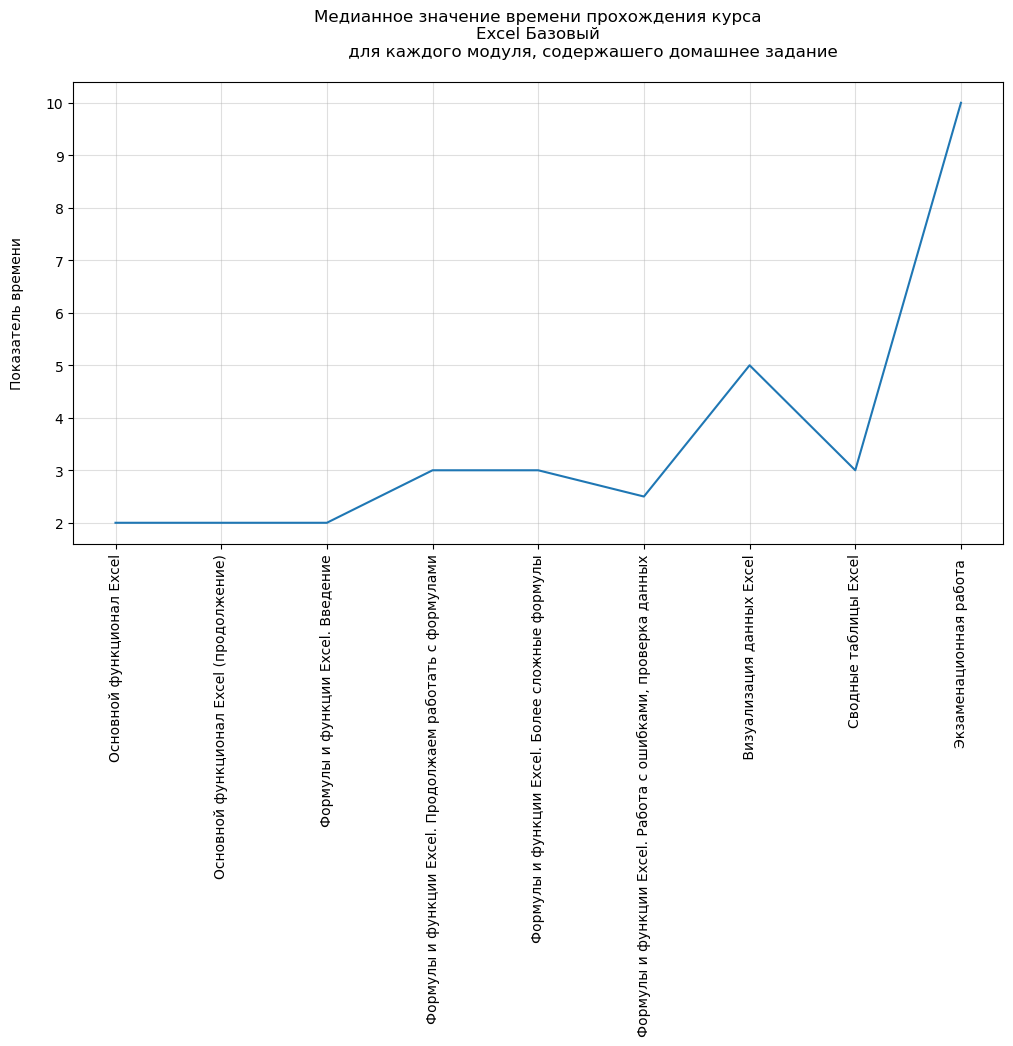

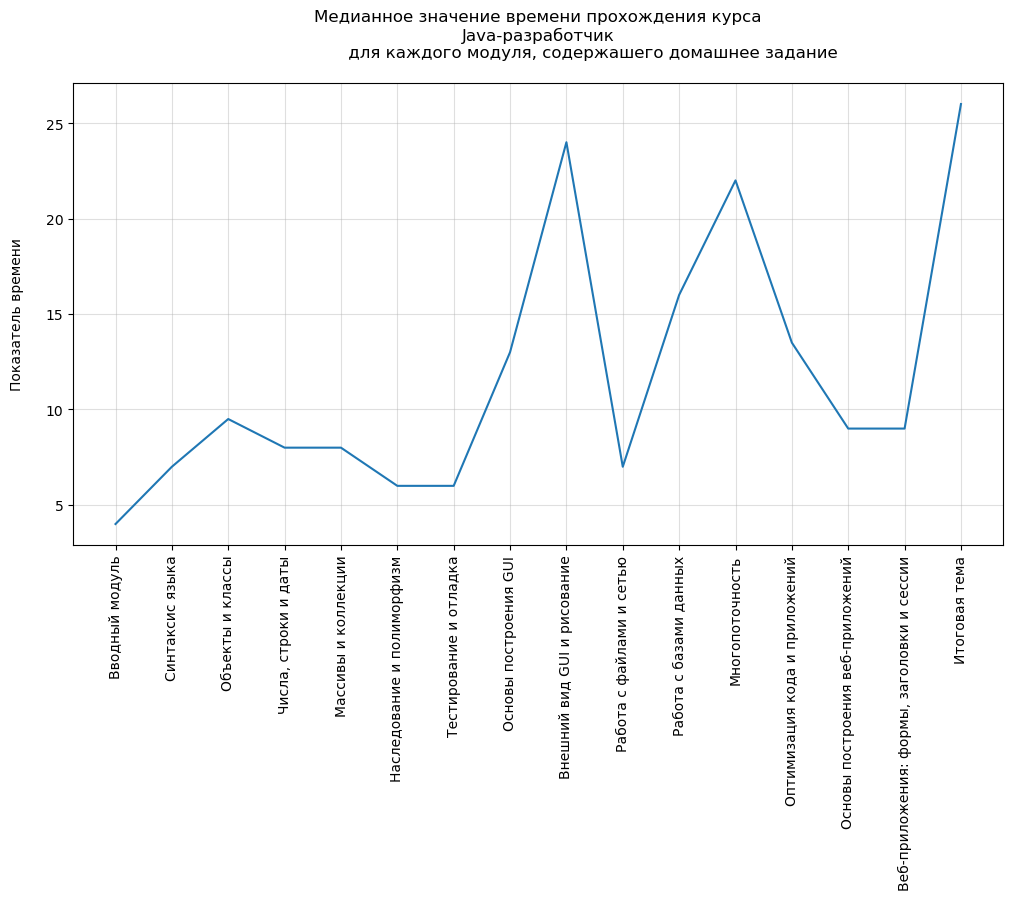

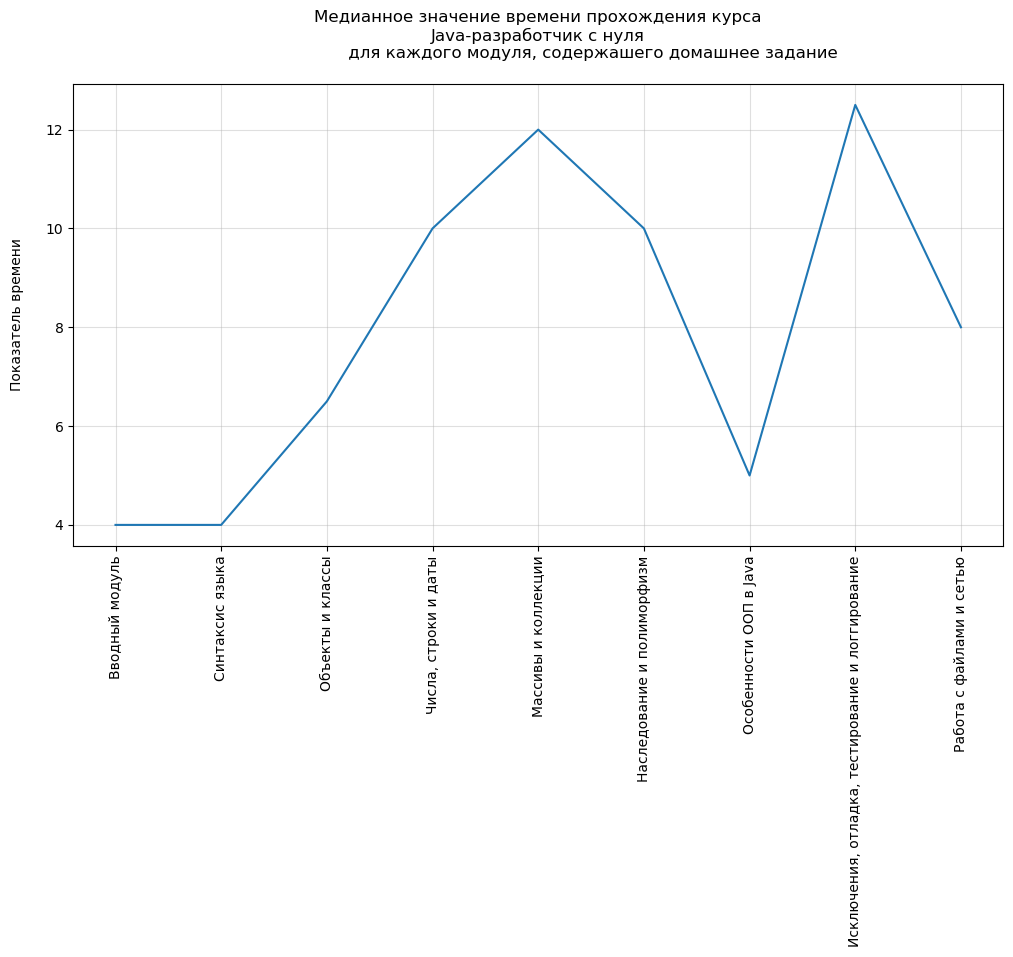

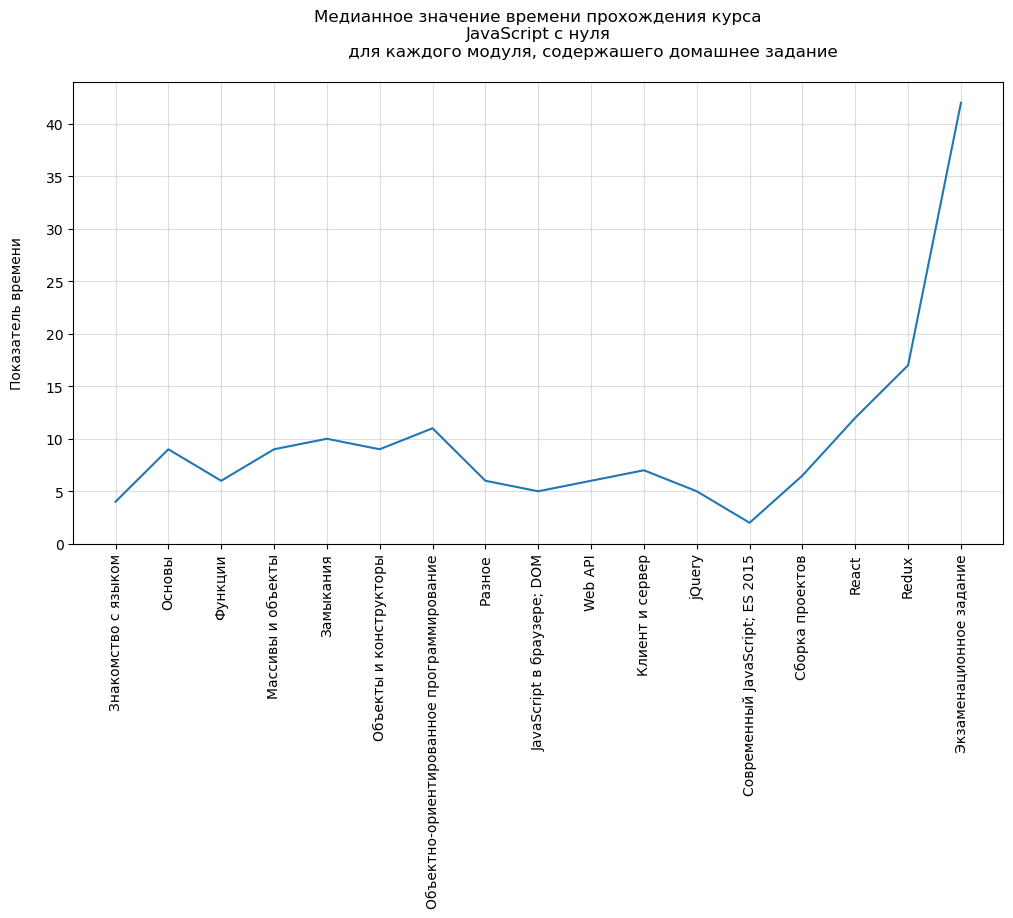

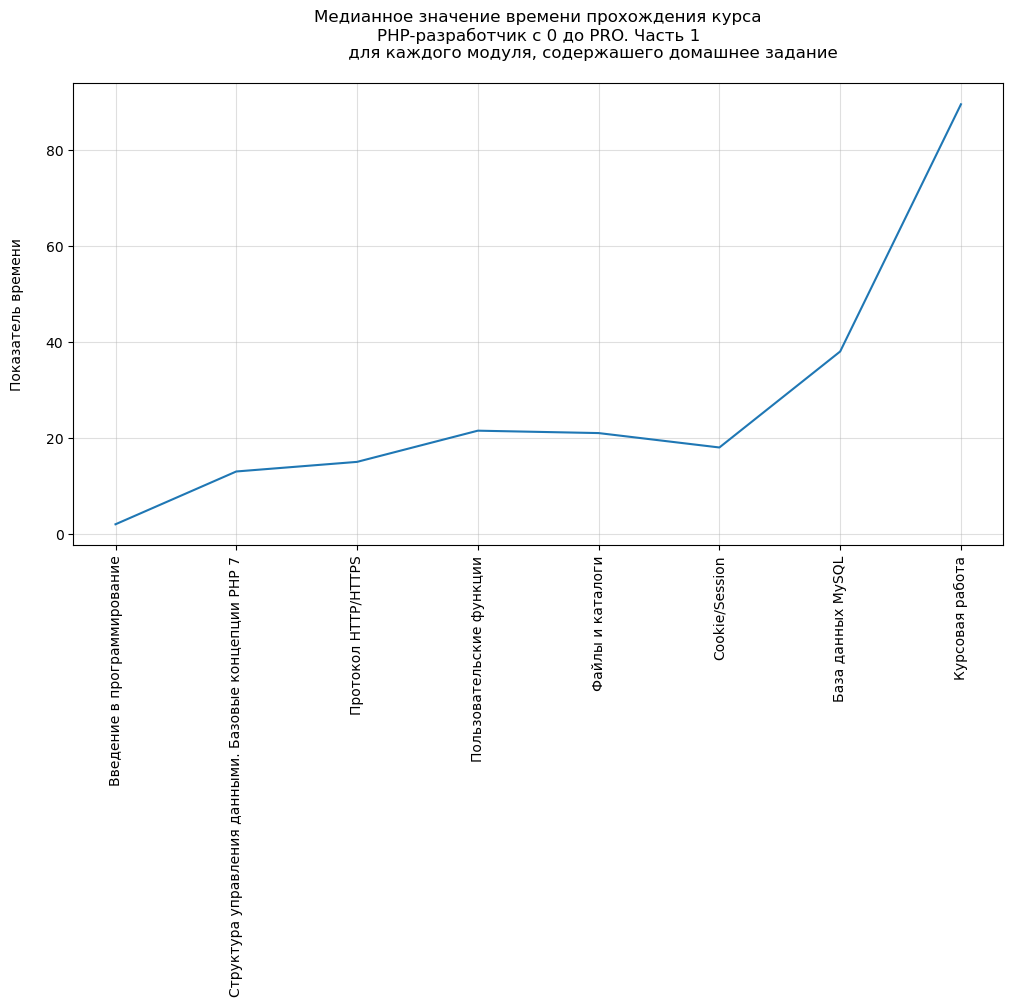

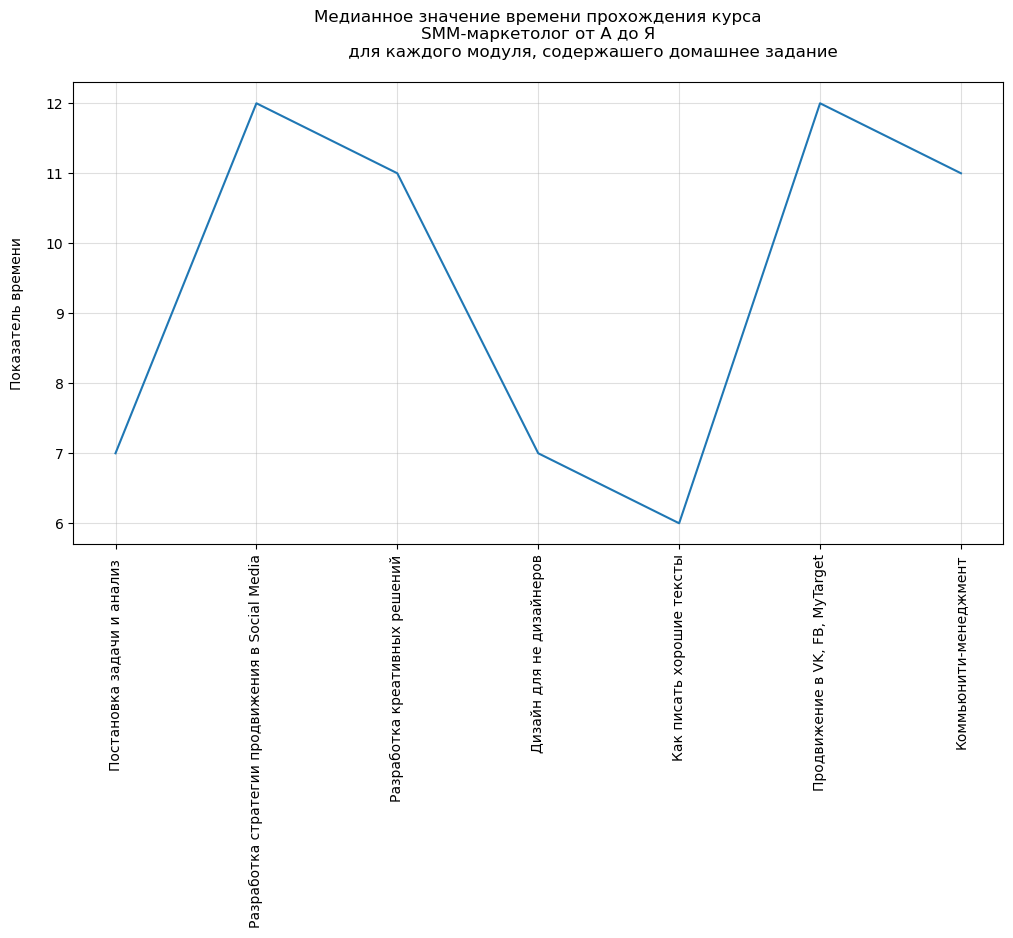

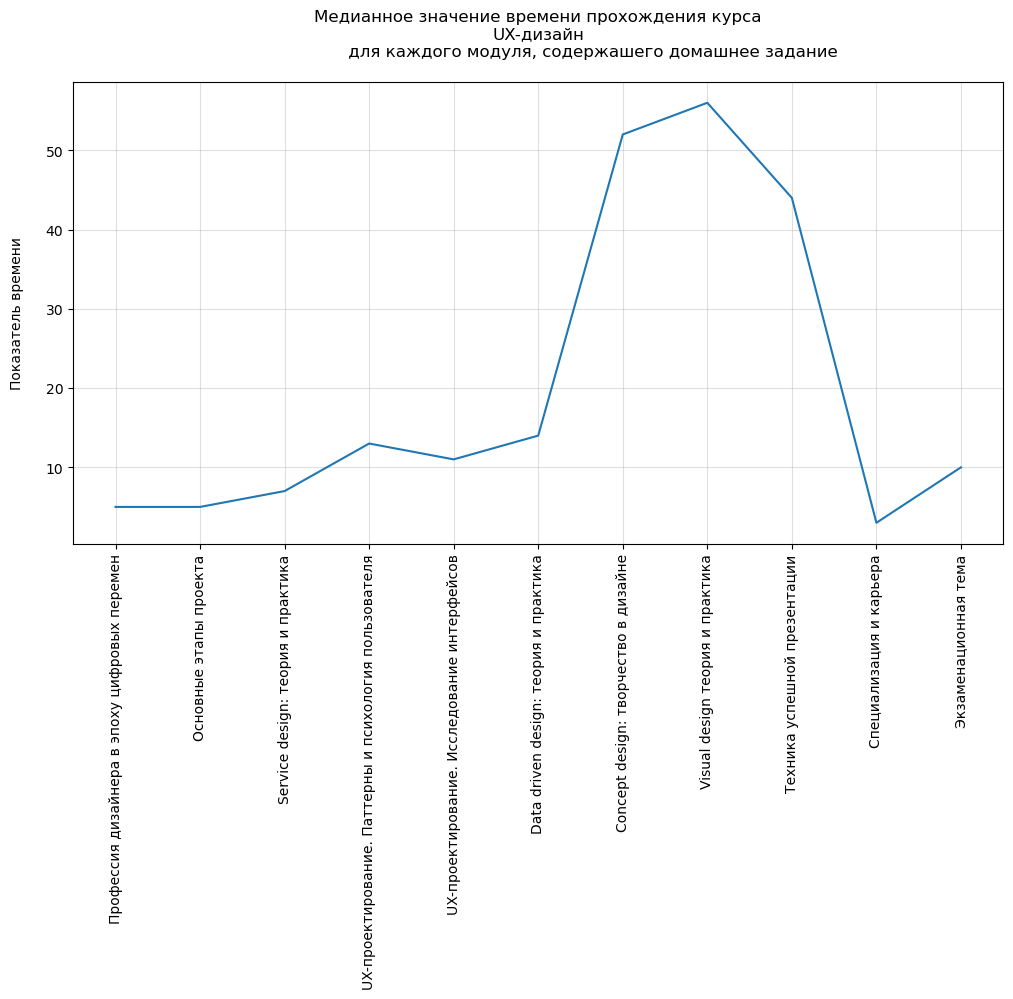

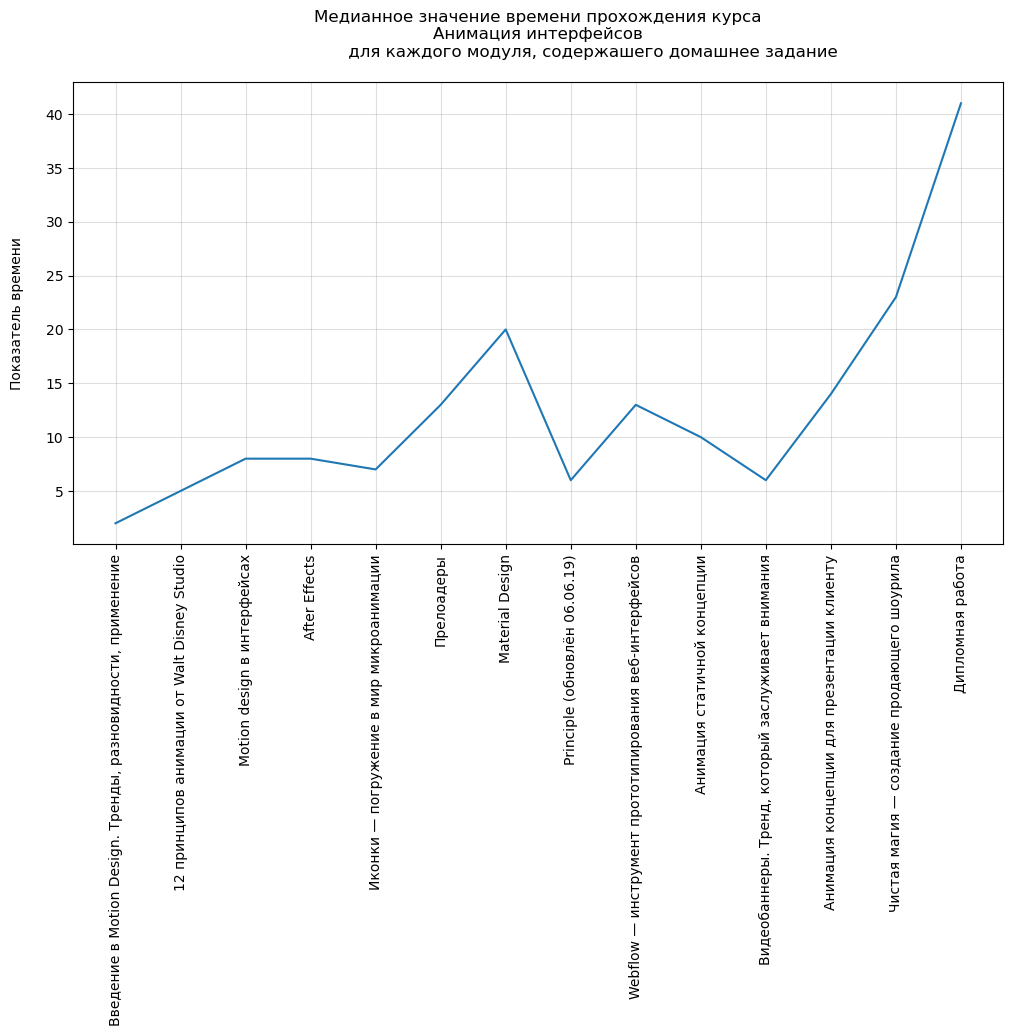

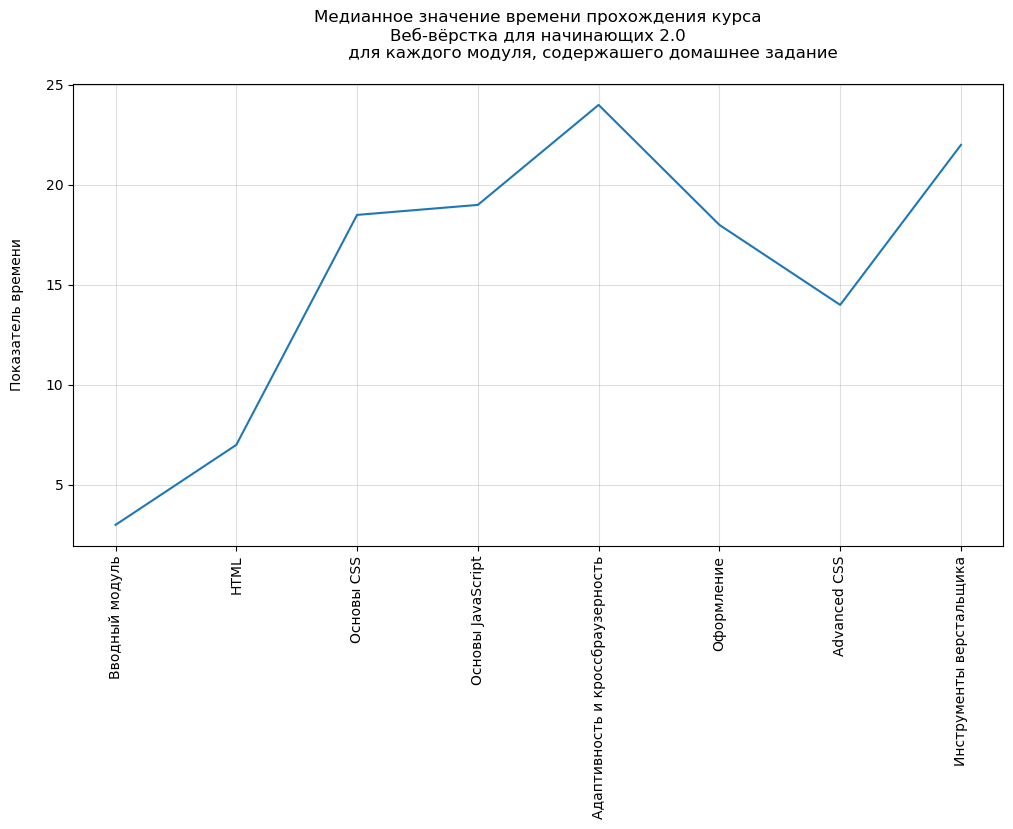

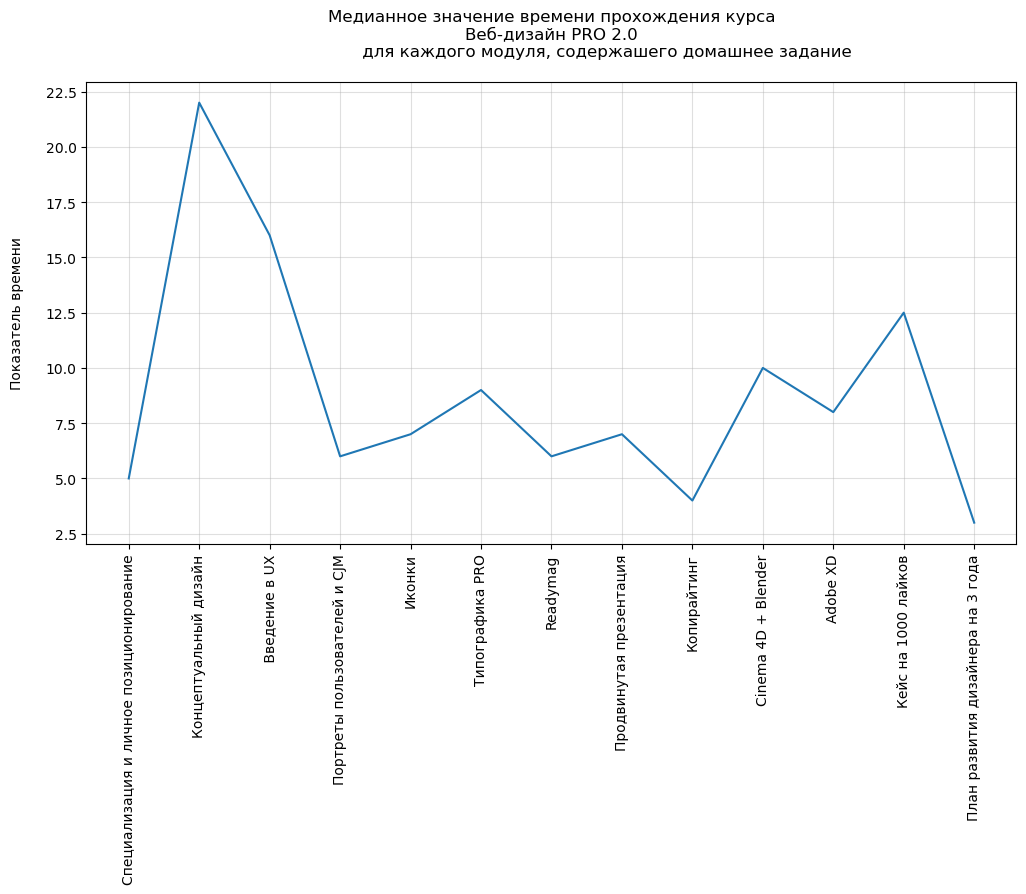

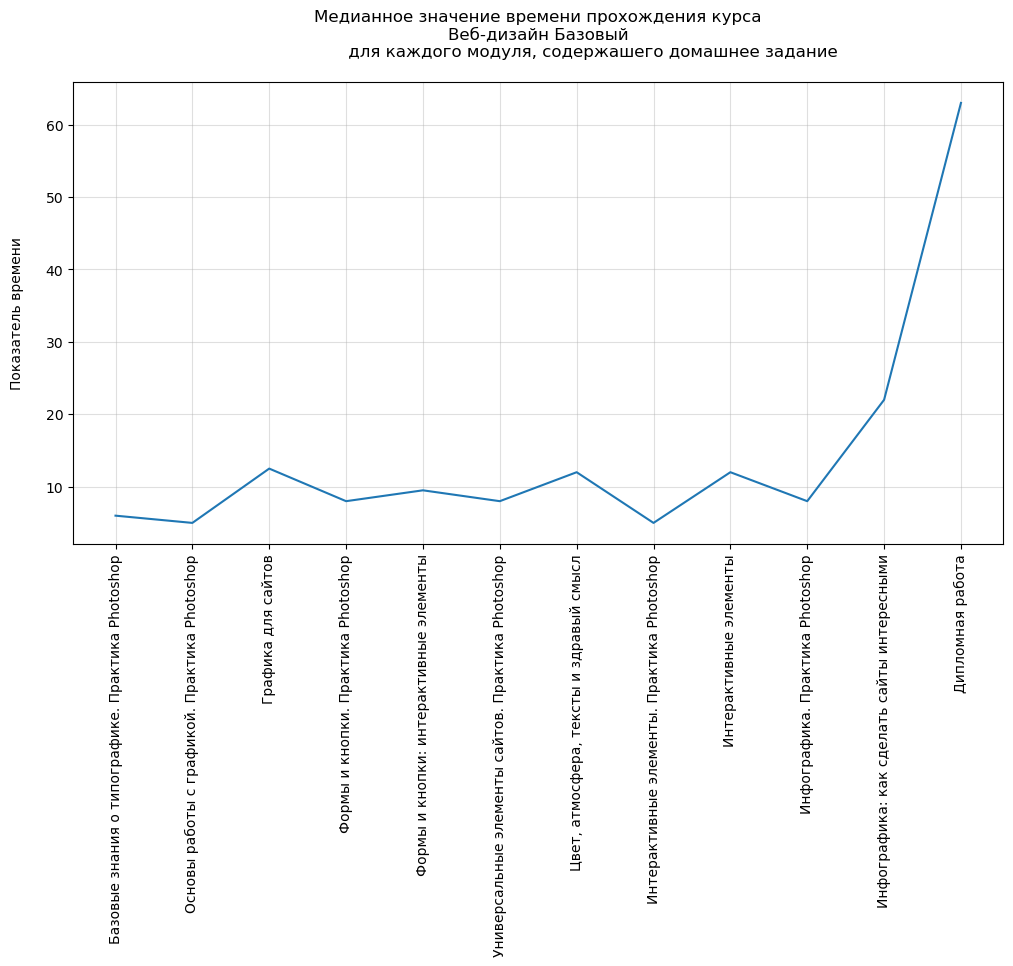

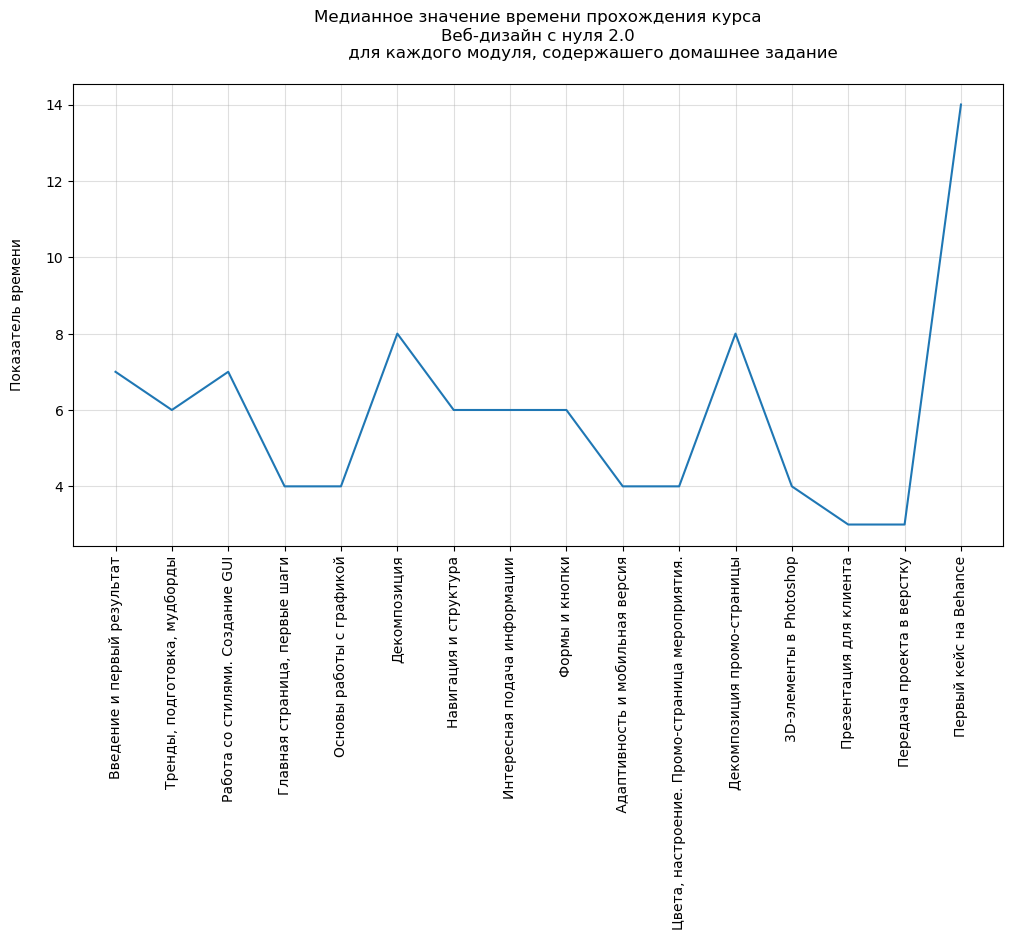

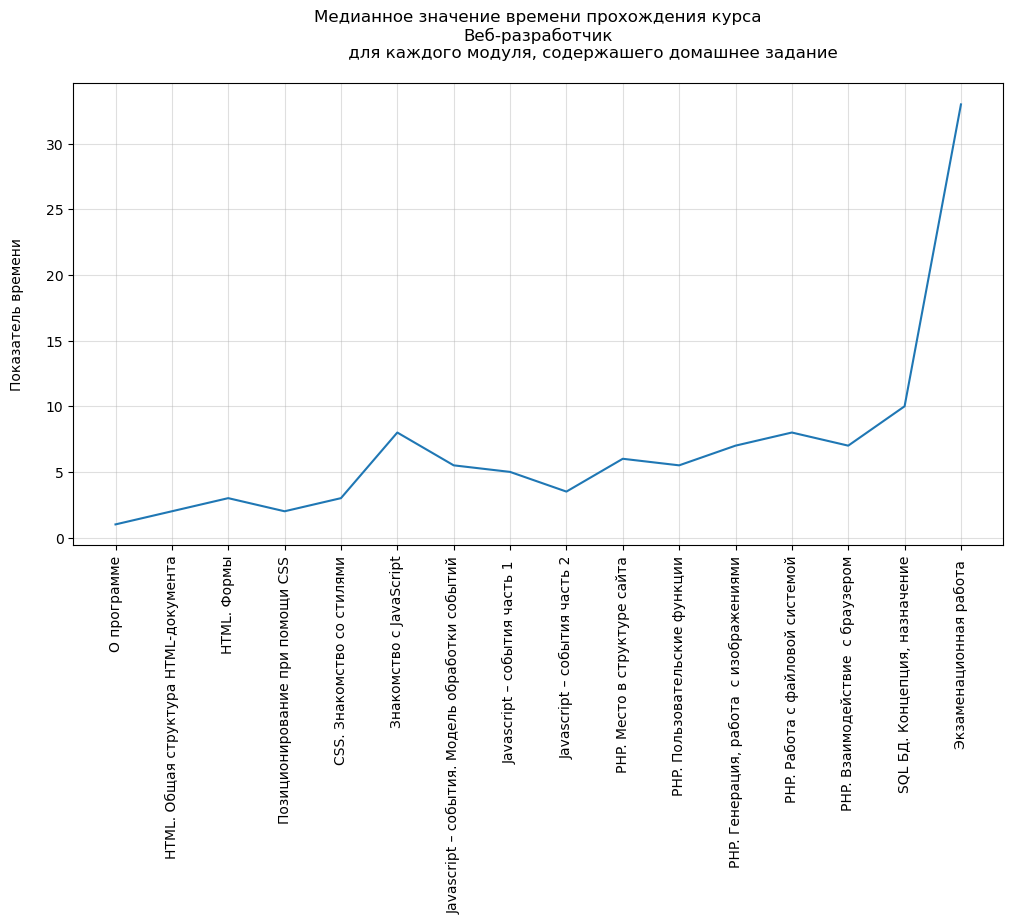

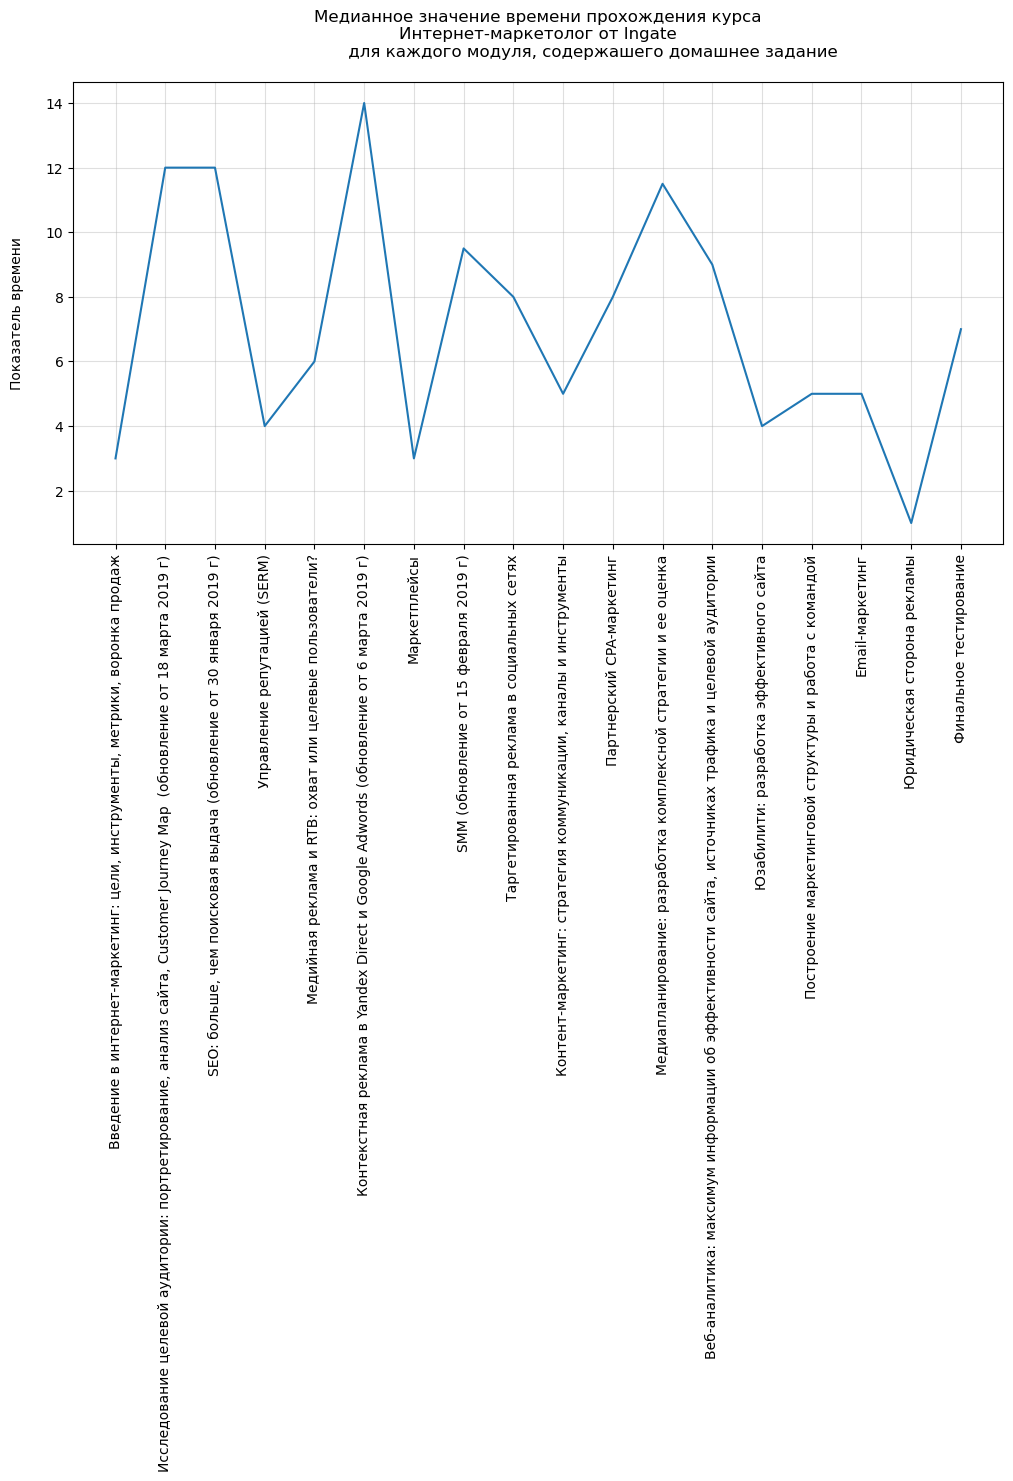

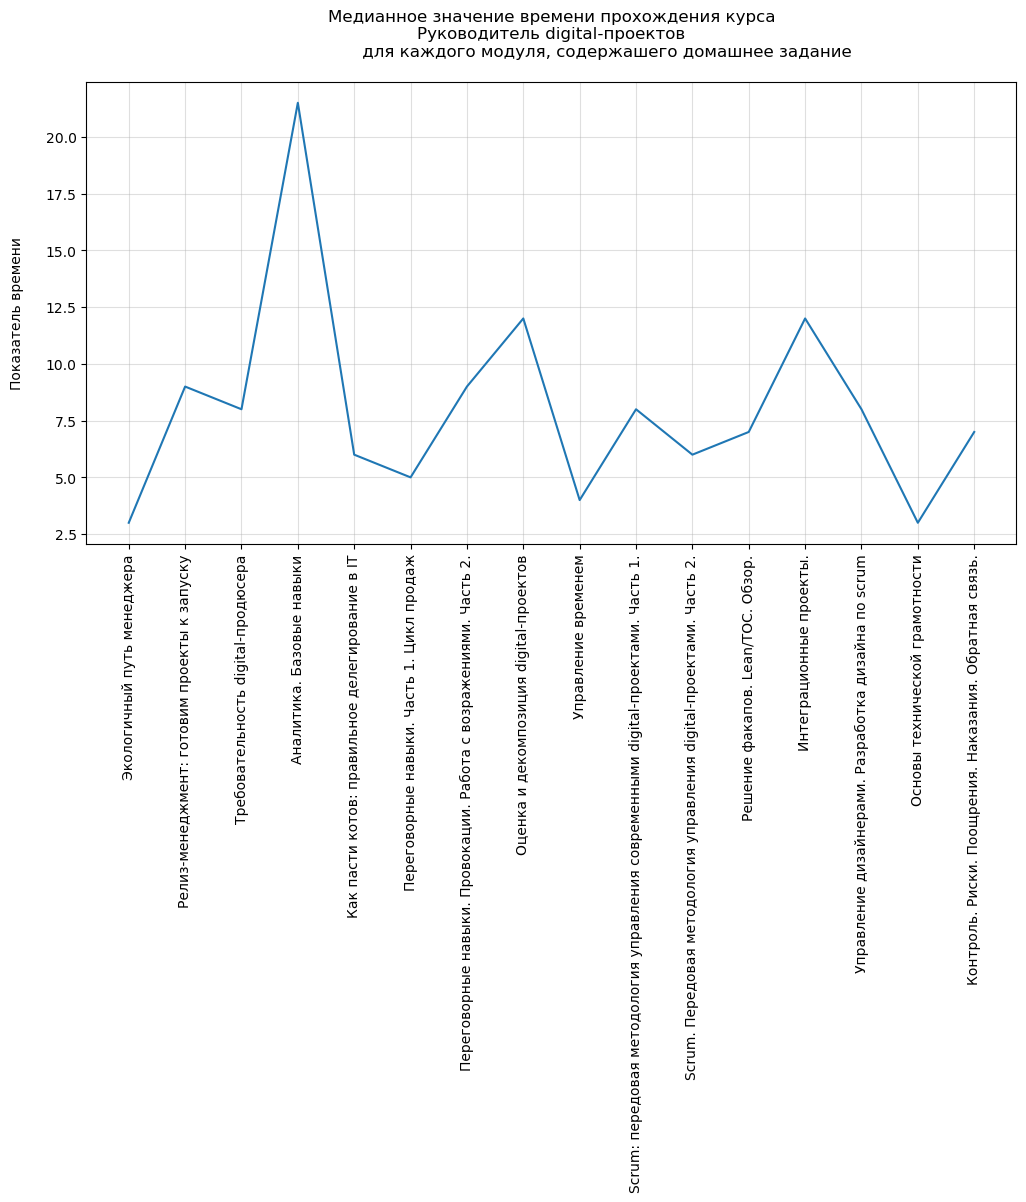

In [56]:
# Построим график Медианного значения времени прохождения курса по каждому курсу

for _course in first_hw['course_title']:
    
    data = pass_module[pass_module['course_title'] == _course]
    
    fig, ax = plt.subplots(figsize=(12,6))

    ax.tick_params(axis='x', rotation=90)
    plt.plot(data['module_title'], data['median_time'])
    
    ax.set_title(f'Медианное значение времени прохождения курса\n{_course}\n \
                    для каждого модуля, содержашего домашнее задание\n')

    ax.set_ylabel('Показатель времени\n')
    
    plt.grid(alpha=0.4)
    plt.show()

3. **(p)**  Чтобы выявить сезонность, посчитать медианное время выполнения домашней работы по месяцам (12 месяцев, январь-декабрь) для каждого курса. То есть посчитать для каждого месяца, медианное время выполнения работ, которые были начаты в этом месяце.

In [57]:
# Создадим датасет на базе датасета из прошлого задания

module_time_season = module_time.loc[:]

# Преобразуем данные в столбце с датой, когда студент приступил к выполнению задания.
# Оставим только информацию о месяце

module_time_season['module_start'] = module_time_season['module_start'].\
                                                        apply(lambda x: x.month)

# Сгруппируем данные по месяцам и посчитаем среднее значение прохождения курса 

module_time_season = module_time_season.groupby(['course_title', 'module_start']).\
                        agg(median_time = ('pass_time', 'median'))
module_time_season

median_time
course_title                  module_start             
Excel Базовый                 1                     2.0
                              2                     2.0
                              3                     3.0
                              4                     2.0
                              5                     3.0
...                                                 ...
Руководитель digital-проектов 8                    14.0
                              9                    10.0
                              10                    5.0
                              11                    6.0
                              12                    8.0

[171 rows x 1 columns]

4. **(m)** На основании третьего пункта построить line-graph, на который будут нанесены линии для каждого курса с медианным временем выполнения домашней работы по месяцам. 15 линий на графике. График должен иметь заголовок. Ось, отражающая время прохождения, должна быть подписана. Линия для каждого курса должна иметь свой цвет (нужна легенда). Рамок у графика быть не должно ⭐

In [58]:
# Подготовим данные для построения графика

data = module_time_season.reset_index()
data = data.sort_values('module_start')
data['module_start'] = data['module_start'].astype('str')


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


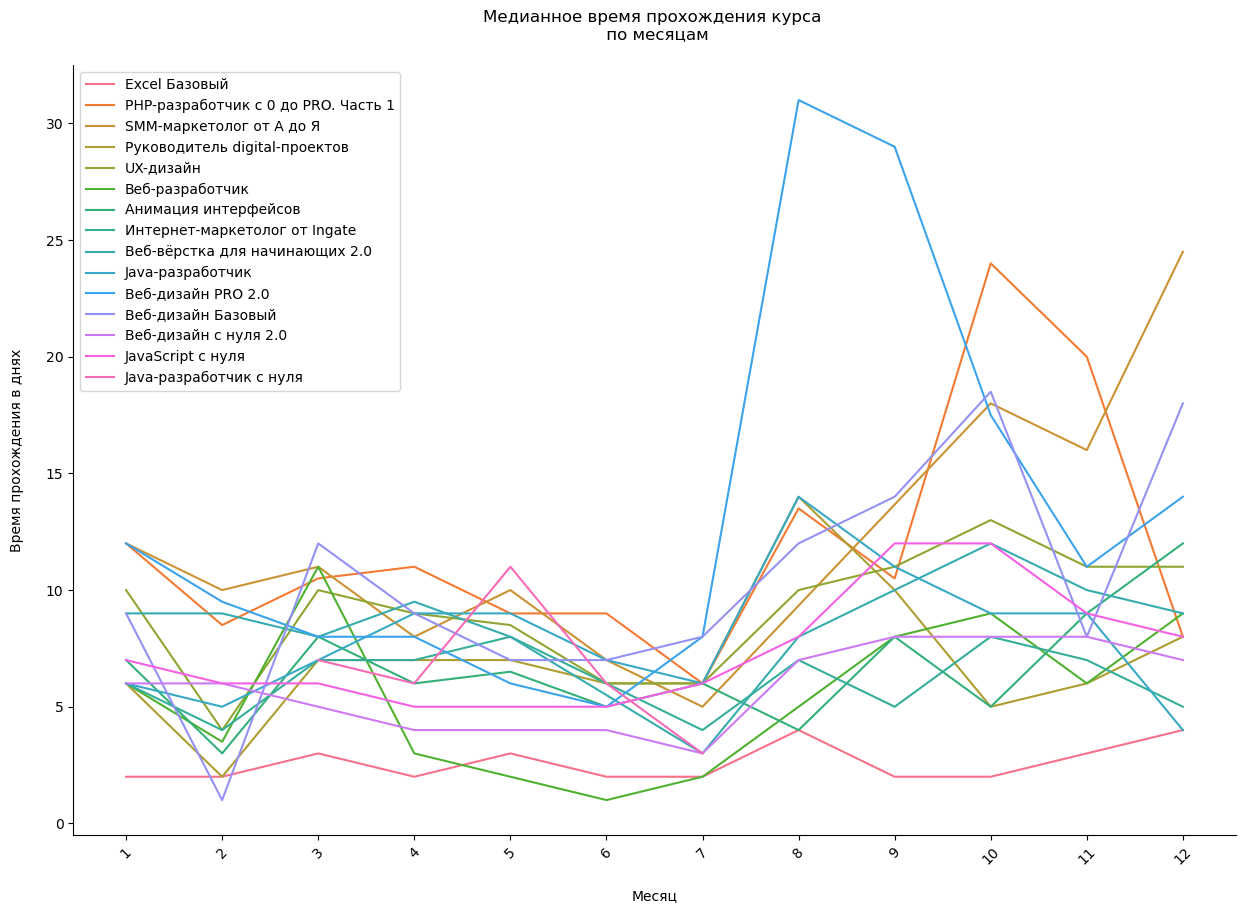

In [59]:
# Построим график медианного времени прохождения курса по месяцам для всех курса

fig, ax = plt.subplots(figsize=(15,10))

ax.tick_params(axis='x', rotation=45)

sns.lineplot(data=data, x='module_start', y='median_time', hue='course_title', ax=ax)

ax.set_title(f'Медианное время прохождения курса \n по месяцам\n')
ax.set_xlabel('\nМесяц')
ax.set_ylabel('Время прохождения в днях\n')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.legend()    
plt.show()

5. На основании рассчитанных значений сделайте аналитический вывод (должен быть полным и покрывать все полученные выше метрики)

После анализа данных по времени прохождения студентами модулей, бросаются в глаза высокие показатели максимального значения прохождения модулей во всех курсах. Этот показатель варьируется от полугода до года. Вероятно это связано с тем, что есть студенты, интерес которых к курсу падает в какой-то момент, и нужно достаточно большое количество времени, чтобы вернуть мотивацию к учебе. В связи с этим показатель среднего значения времени прохождения курса не слишком информативен с такими большими выбросами. Куда логичнее обратить внимание на медианое значение. 

Мы построили графики для каждого курса по медленному значению прохождения курса и готовы представить выводы по каждому курсу

 * Excel Базовый

В среднем студентам требуется 2-3 дня для выполнения каждой домашней работы на курtс. Урок по визуализации данных затрачивает больше времени - около 5 дней. Это может быть связано ни сколько со сложностью самого урока, сколько с тем что визуализация данных требует настройки большого количества нюансов, поэтому и увеличивается срок выполнения работы. Ожидаемо, что Экзаменационная работа выполняется дольше всех уроков и требует от студентов в среднем 10 дней.

 * Java-разработчик

В этом курсе домашние уроки выполняются студентами в среднем дольше - 5-10 дней. Наблюдается так же сложны работы в модулях "Внешний вид GUI и рисование" и "Многопоточность" - около 23 дней. Это достаточно большой срок и может негативно влиять на мотивацию студентов к прохождению курса в целом. Поэтому стоит обратить внимание на эти модули. Проверить, доступно ли представлена информация в данном модуле и понятно ли сформулированы задания, с какими трудностями сталкиваются студенты при выполнении работы. Так же, как и в предыдущем модуле, время на выполнение работы по Итоговой теме тратится студентами больше, чем на выполнение остальных работ в курсе. 

 * Java-разработчик c нуля

В этом курсе так же наблюдаются увеличение времени прохождения модулей "Массивы и коллекции" и "Исключения, отладка, тестирование и логгирование" - 12 и 13 дней соответственно.  Так же как и в предыдущем выводе рекомендуется обратить внимание на эти модули и убедиться, что увеличение времени не связано с качество предоставляемой информации.

 * JavaScript с нуля

В этом курсе в целом время выполнения домашнего задания выше, чем на предыдущих кусах - 5-10 дней. И увеличивается к концу прохождения курса. Время на выполнение экзаменационного задания более 40 дней. 

 * PHP-разработчик с 0 до PRO. Часть 1

На курсе время выполнения домашнего задания выше, чем на предыдущих кусах в среднем больше 15  дней. Логично, что Курсовая работа занимает время еще больше, но здесь этот показатель более 80 дней. Рекомендуется обратить внимание на этот курс. Не теряется ли интерес студентов при таком долгом выполнении работа. Подходящая ли изначальная подготовка пользователей, приобретающих этот курс.

 * SMM-маркетолог от А до Я

В целом студентам  на курсе требуется 6-12 дней для выполнения домашних работ. Временные пики в модулях "Проработка стратегии в Social Media" и "Продвижение в VK, FB, MyTarget".

 * UX-дизайн

В модулях "Concept design: теория и практика" и "Visual design теория и практика" домашняя работа занимает у студентов более 50 дней. Больше чем на Экзаменационную тему. Следует проанализировать данный курс и выявить сходности, с которыми сталкиваются студенты при прохождении.

 * Анимация интерфейсов

Самый высокий показатель времени прохождения модуля у студентов на этом курсе у  Дипломной работы. Так же пик наблюдается в модуле Анимация интерфейсов.

 * Веб-вёрстка для начинающих 2.0

Модуль Адаптивность и кроссбраузерность  требует наибольшего количества времени на прохождение среди всех модулей курса.

 * Веб-дизайн PRO 2.0

Стоит обратить внимание на модуль "Концептуальный дизайн". Время прохождения этого модуля около 21 дня, что сильно больше, чем в других модулях этого курса. Модуль находится в начале обучения и такая сложная работа может отбить мотивацию у студентов на дальнейшее прохождение по курсу.

 * Веб-дизайн Базовый

Судя по полученным нами данными курс выглядит сбалансированным. Пик среднего значения времени прохождения модуля наблюдается только у дипломной работы.

 * Веб-дизайн с нуля 2.0, Веб-разработчик

Так же как и в предыдущем курсе, явных пиков в этих курсах не наблюдается. Кроме последнего модуля с домашним заданием.

 * Интернет-маркетолог от Ingate

В среднем на прохождения модуля от студента требуется от 3 -14 дней.

 * Руководитель digital-проектов

Самым сложным для прохождения студентами модуля оказывается : Аналитика. Базовые знания - более 20 дней.  Остальные модули требуют от студентов о2-10 дней для прохождения модуля.

Практически для всех курсов наблюдается увеличение времени прохождения курса начиная с июля. В августе достигает своего пика и к ноябрю возвращается на исходные средние показатели. Второй пик у многих курсов наблюдается в декабре, что скорее всего связано с празднованием Нового года и традиционно длинными выходными в январе. Один из самых продуктивных месяцев для большинства курсов оказывается февраль.

## 4. Расчет конверсии

1. **(p)** Посчитать конверсию перехода студентов из одного модуля в другой на каждом курсе. Формула: отношение количества студентов, приступивших к выполнению домашнего задания в этом модуле (если ДЗ в модуле несколько, то считать по первому ДЗ в модуле), к количеству студентов, сдавших задание в предыдущем модуле (если ДЗ в модуле несколько, то считать по последнему ДЗ в модуле).
<details>
<summary><b>Hint #1</b></summary>
    <p>
Конверсию мы считаем как отношение домашних работ, которые в целом были начаты (здесь мы считаем не только работы в статусе done, но и работы, находящиеся в любом другом статусе) в этом модуле, к количеству работ, которые были полностью сданы в предыдущем модуле (то есть все они находятся в статусе done). 
    </p>
    <br>
</details>

In [60]:

# На базе датасета hw создадим датасет, сгруппировав данные по модулям и подсчитаем
# количество студентов, приступивших к выполнению домашнего задания

started_hw = hw.groupby(['course_title', 'module_title', 'module_number']).\
                        agg({'student_id': 'nunique'}).reset_index()

# Сгруппируем данные из датасет hw по модулям и подсчитаем количество студентов,
# закончивших выполнение домашнего задания

done_hw = hw[hw['status'] == 'done'].\
            groupby(['course_title', 'module_title', 'module_number']).\
            agg({'student_id':'nunique'}).reset_index()

# Сведем данные из двух датасетов в один

conversion = started_hw.merge(done_hw, left_on=['course_title', 'module_title',
                                                'module_number'],
                    right_on=['course_title', 'module_title', 'module_number'],
                    how='left').\
                    rename(columns={'student_id_x':'started_hws', 
                                    'student_id_y':'done_hws'}).\
                    dropna().\
                    astype({'done_hws':'int64'}).\
                    sort_values(by=['course_title', 'module_number', 'module_title'])

conversion.head(12)

course_title                                       module_title  \
1      Excel Базовый                          Основной функционал Excel   
2      Excel Базовый            Основной функционал Excel (продолжение)   
5      Excel Базовый                  Формулы и функции Excel. Введение   
6      Excel Базовый  Формулы и функции Excel. Продолжаем работать с...   
4      Excel Базовый     Формулы и функции Excel. Более сложные формулы   
7      Excel Базовый  Формулы и функции Excel. Работа с ошибками, пр...   
0      Excel Базовый                          Визуализация данных Excel   
3      Excel Базовый                              Сводные таблицы Excel   
8      Excel Базовый                            Экзаменационная работа    
9   Java-разработчик                                     Вводный модуль   
22  Java-разработчик                                    Синтаксис языка   
16  Java-разработчик                                   Объекты и классы   

    module_number  started_hws  done_hws  
1               1          518       458  
2               2          434       406  
5               3          398       387  
6               4          345       303  
4               5          298       270  
7               6          263       242  
0               7          238       200  
3               8          202       186  
8               9          191        91  
9               1          627       563  
22              2          521       427  
16              3          374       294

In [61]:
# Сместим колонку с данными по сделанным домашним заданиям,
# чтобы было удобнее посчитать конверсию, так как мы берем отношение текущего модуля
# к предыдущему

conversion['done_hws'] = conversion['done_hws'].shift(1)

# Добавим в датасет колонку с конверсией

conversion['conversion'] = conversion['started_hws']/conversion['done_hws']

conversion.head()


course_title                                       module_title  \
1  Excel Базовый                          Основной функционал Excel   
2  Excel Базовый            Основной функционал Excel (продолжение)   
5  Excel Базовый                  Формулы и функции Excel. Введение   
6  Excel Базовый  Формулы и функции Excel. Продолжаем работать с...   
4  Excel Базовый     Формулы и функции Excel. Более сложные формулы   

   module_number  started_hws  done_hws  conversion  
1              1          518       NaN         NaN  
2              2          434     458.0    0.947598  
5              3          398     406.0    0.980296  
6              4          345     387.0    0.891473  
4              5          298     303.0    0.983498

In [62]:
# Создадим датасет с информацией по первым модулям в курсе

first_module = hw.sort_values(['course_title', 'module_number', 'lesson_number']).\
                            groupby(['course_title']).nth(0).reset_index()

# Отфильтруем наш датасет, удалив информацию о первых модулях на каждом курсе. Так
# как нам не с чем сравнивать результаты учащихся в первых модулях

conversion = conversion[~conversion['module_title'].isin(first_module['module_title'].\
                                                         unique())]

conversion.head()

course_title                                       module_title  \
2  Excel Базовый            Основной функционал Excel (продолжение)   
5  Excel Базовый                  Формулы и функции Excel. Введение   
6  Excel Базовый  Формулы и функции Excel. Продолжаем работать с...   
4  Excel Базовый     Формулы и функции Excel. Более сложные формулы   
7  Excel Базовый  Формулы и функции Excel. Работа с ошибками, пр...   

   module_number  started_hws  done_hws  conversion  
2              2          434     458.0    0.947598  
5              3          398     406.0    0.980296  
6              4          345     387.0    0.891473  
4              5          298     303.0    0.983498  
7              6          263     270.0    0.974074

2. **(m)** Постройте bar-chart, отражающий конверсию перехода студентов из одного модуля в другой на каждом курсе. График должен иметь заголовок. Ticks нужно развернуть так, чтобы они были читаемы.

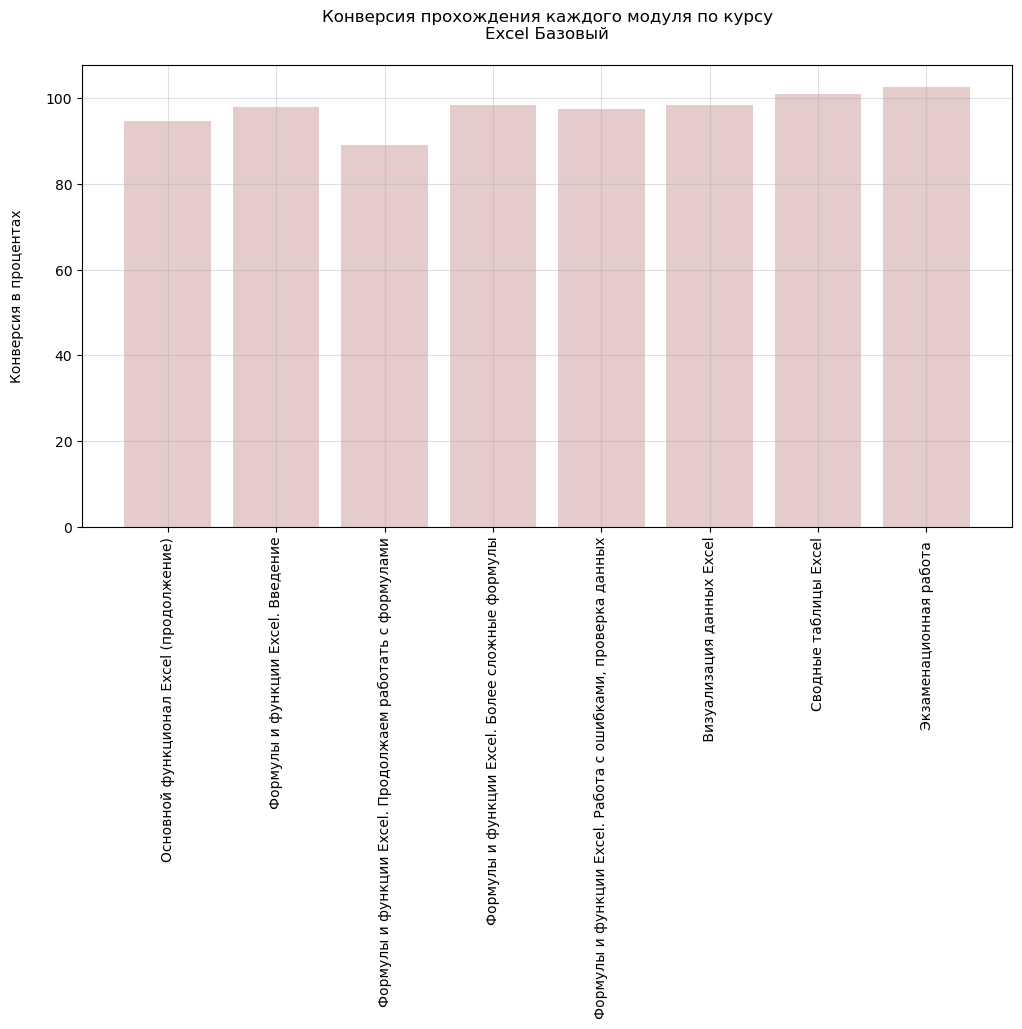

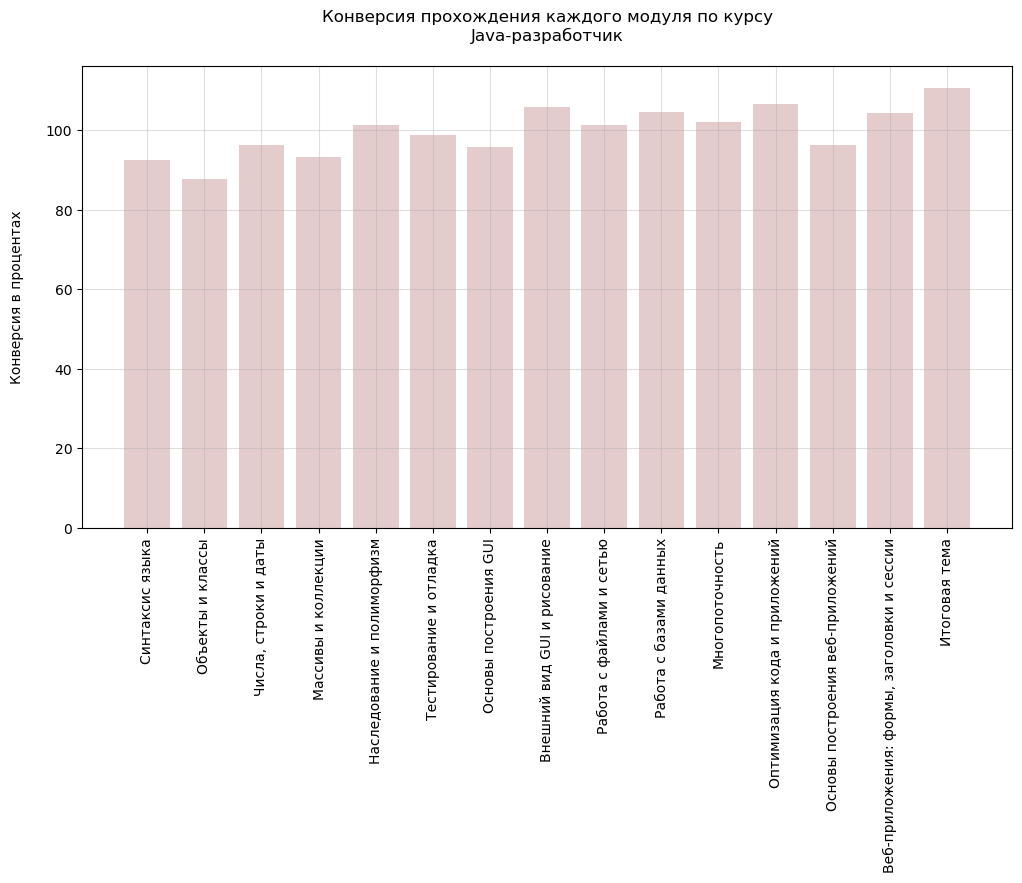

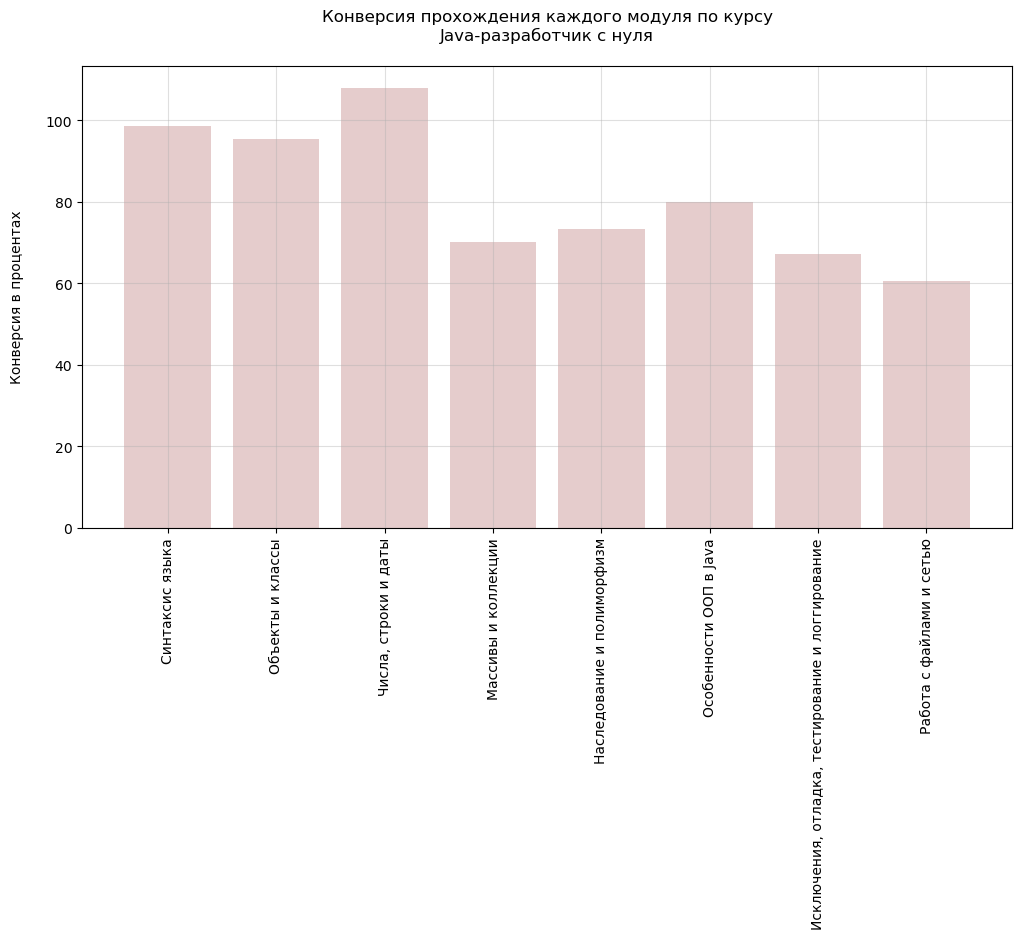

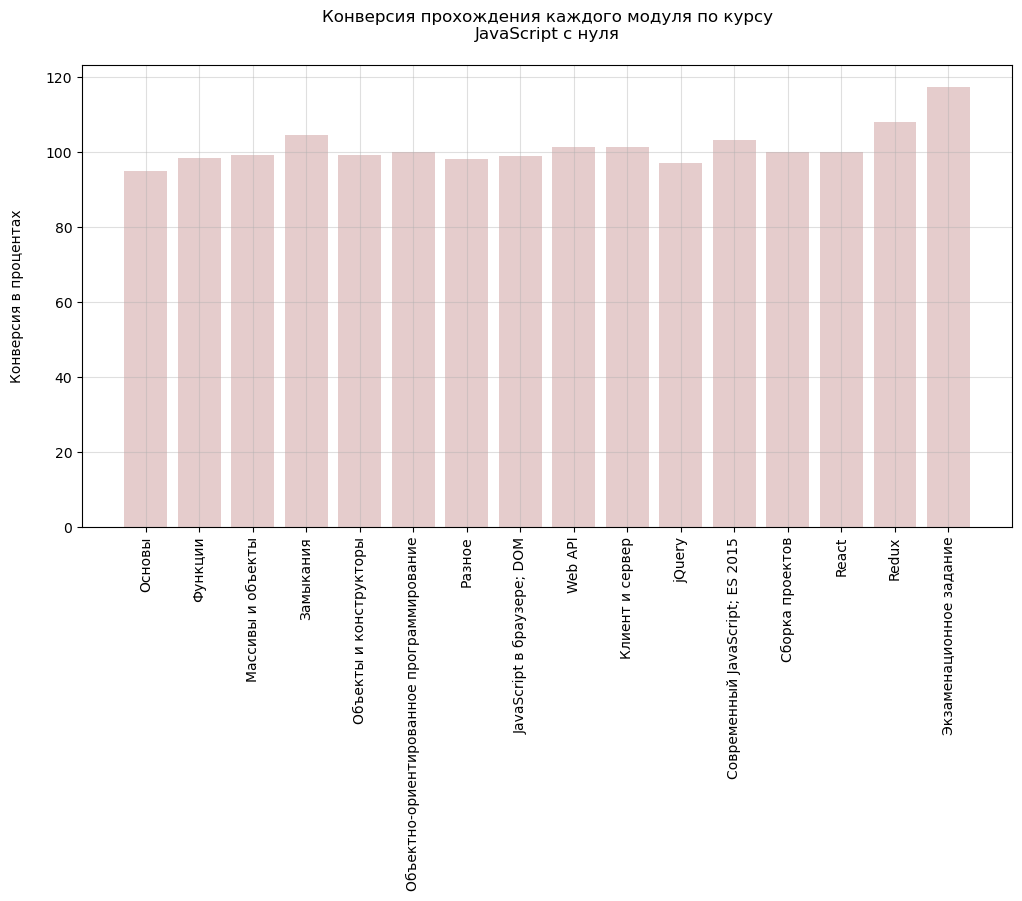

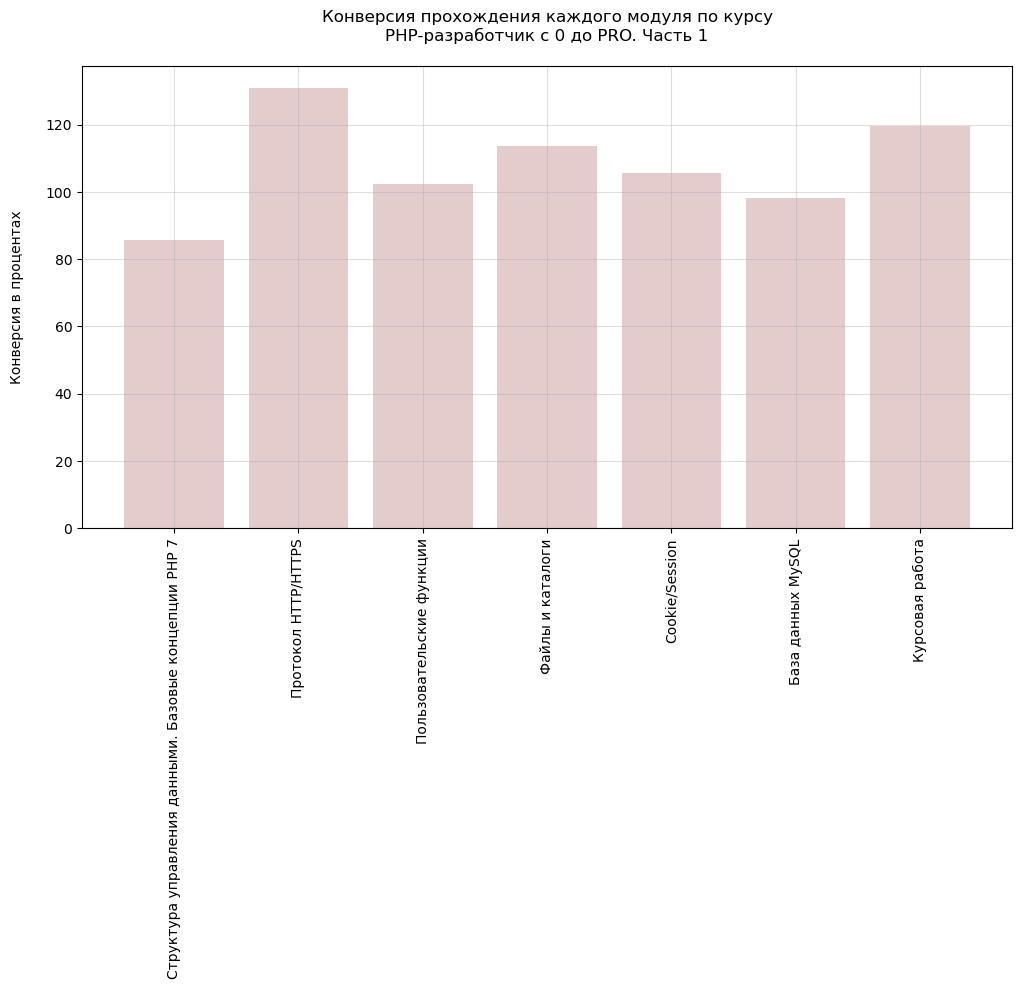

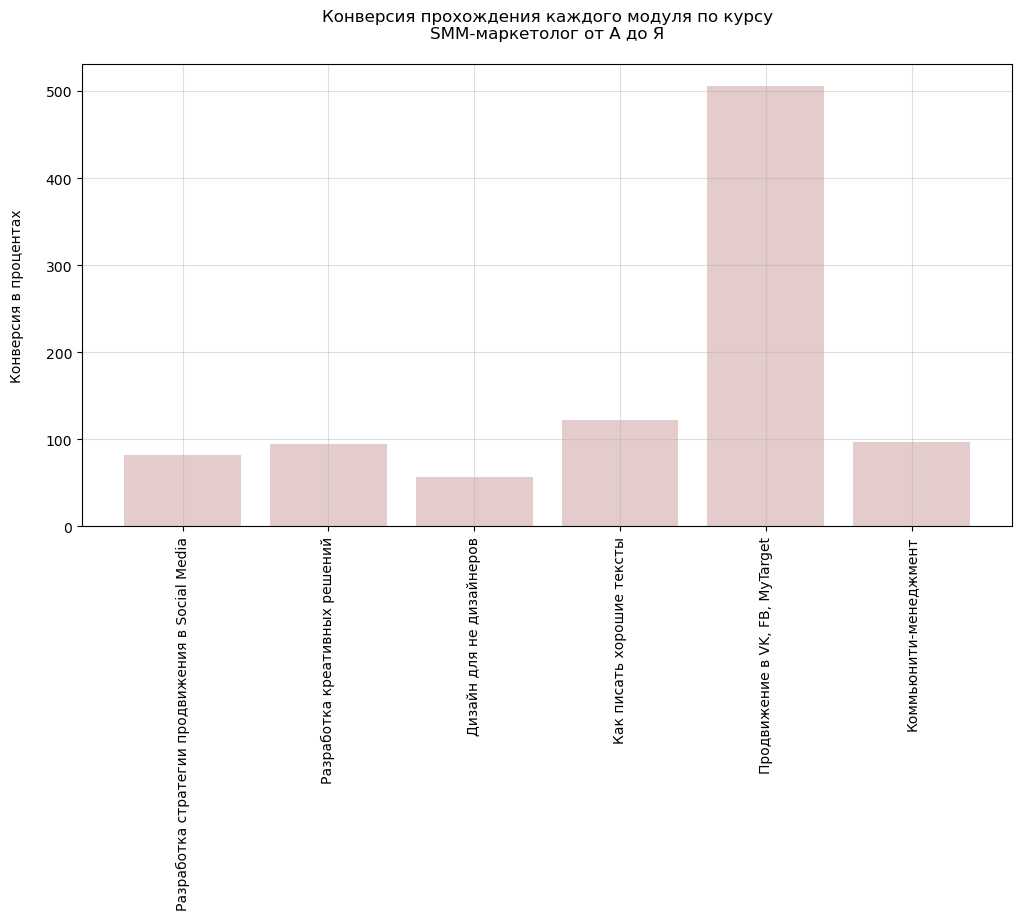

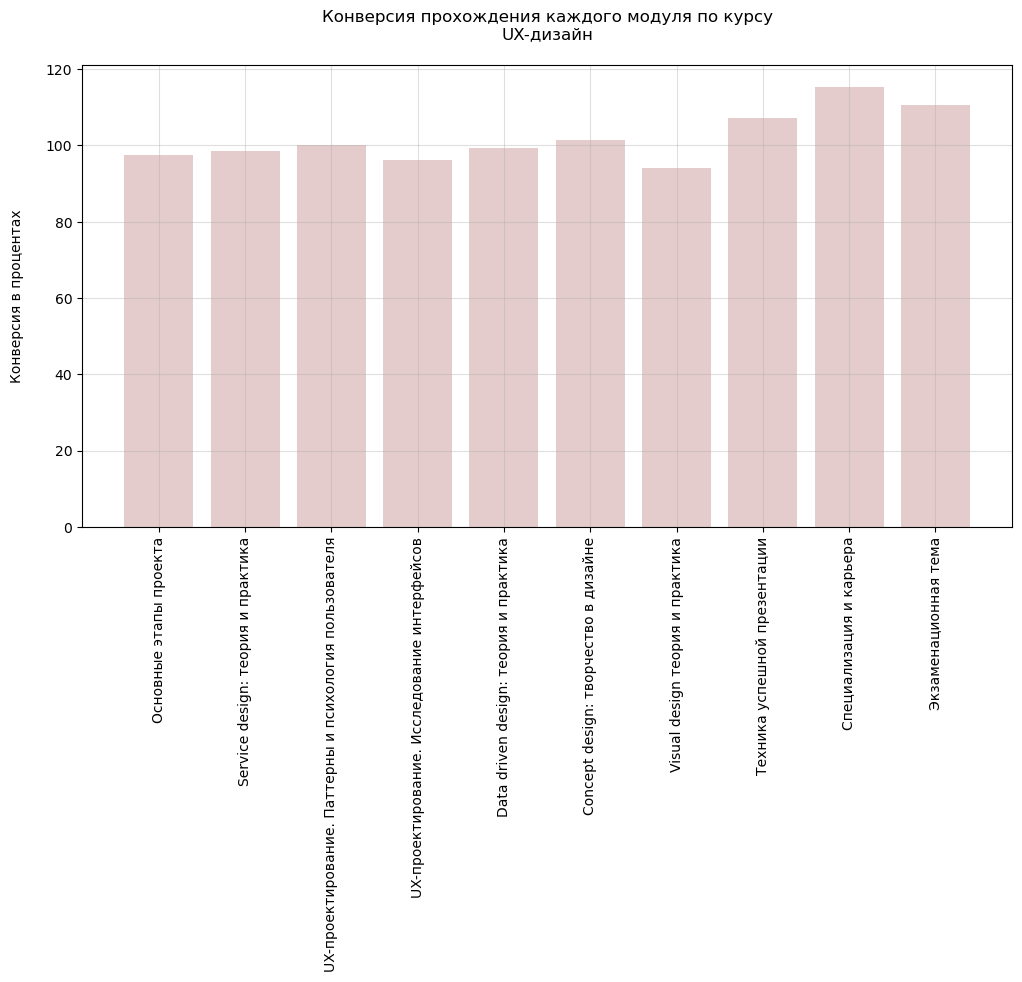

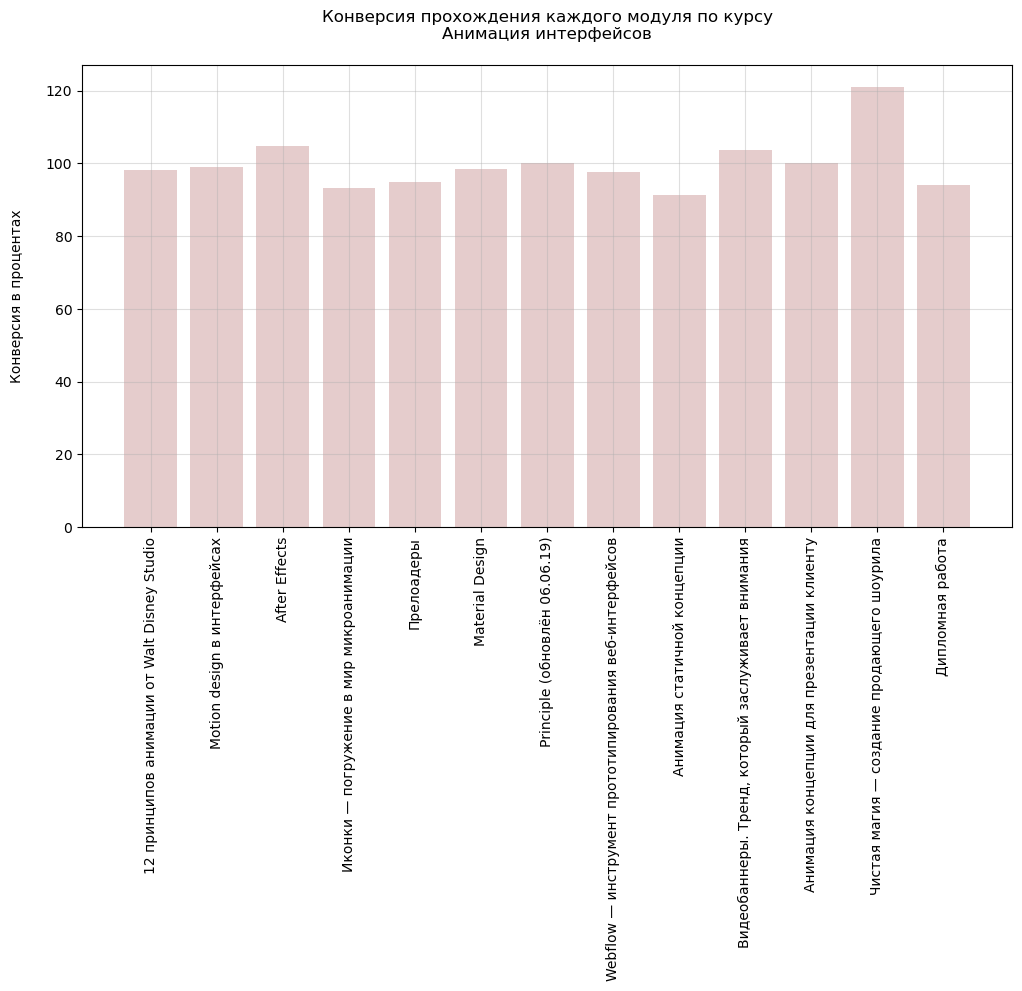

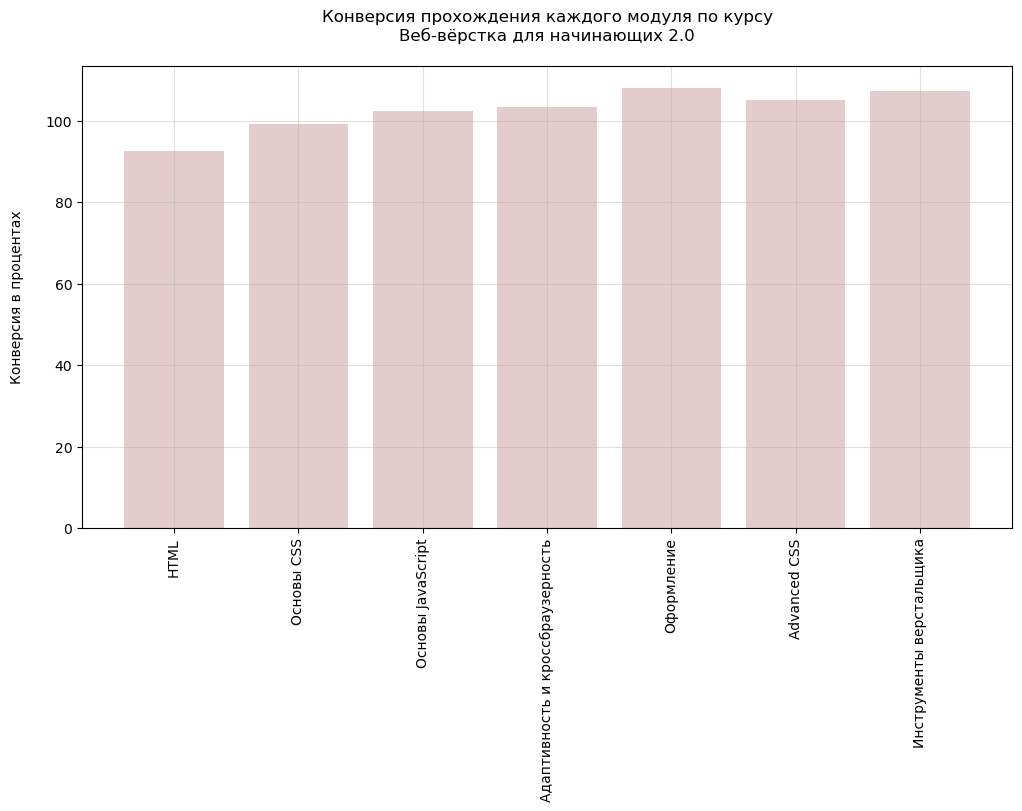

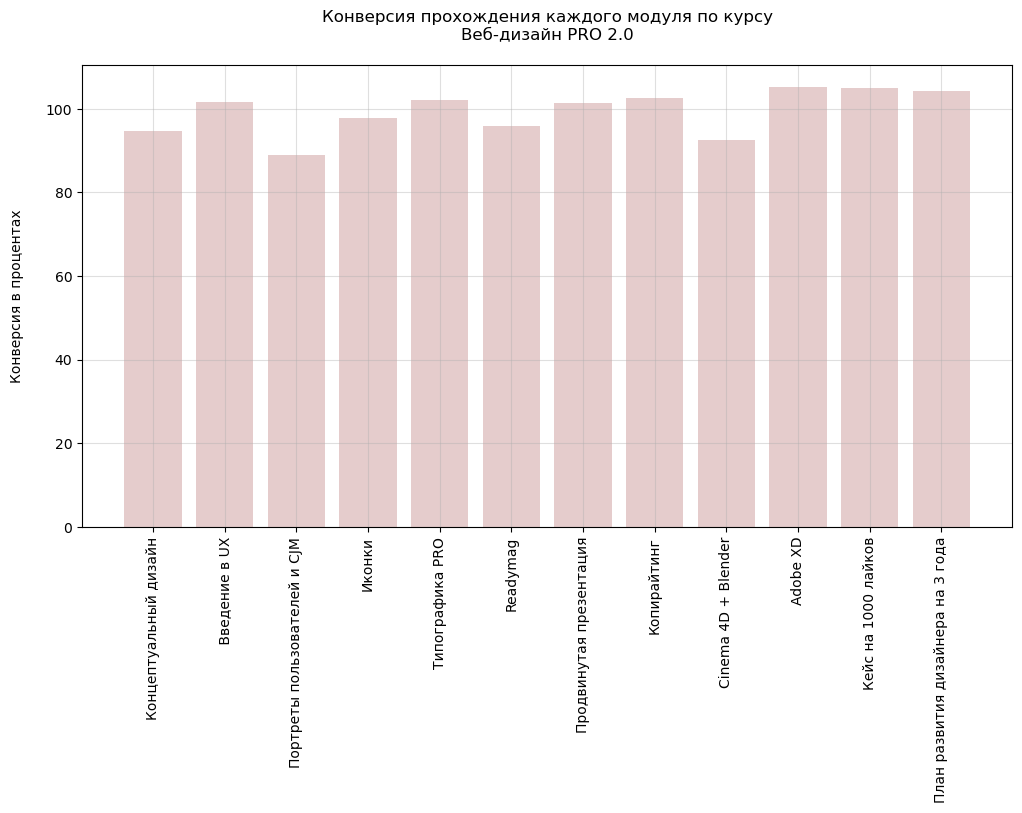

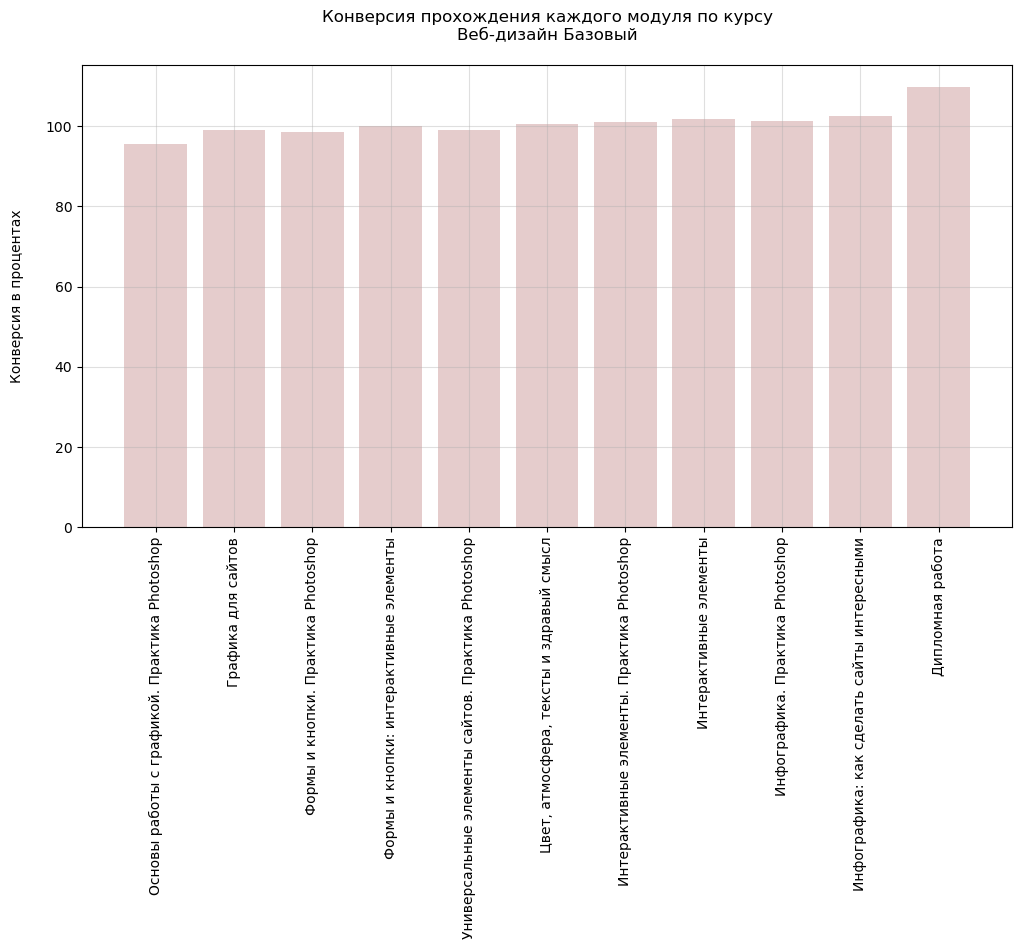

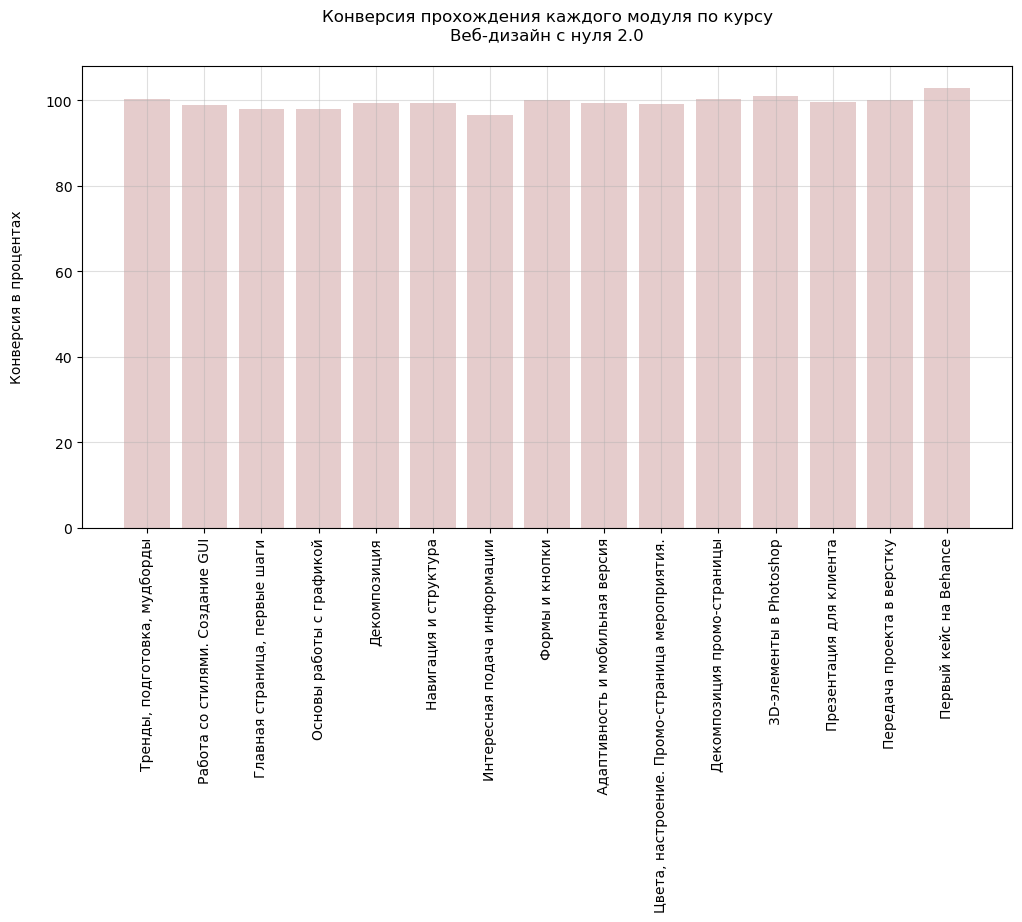

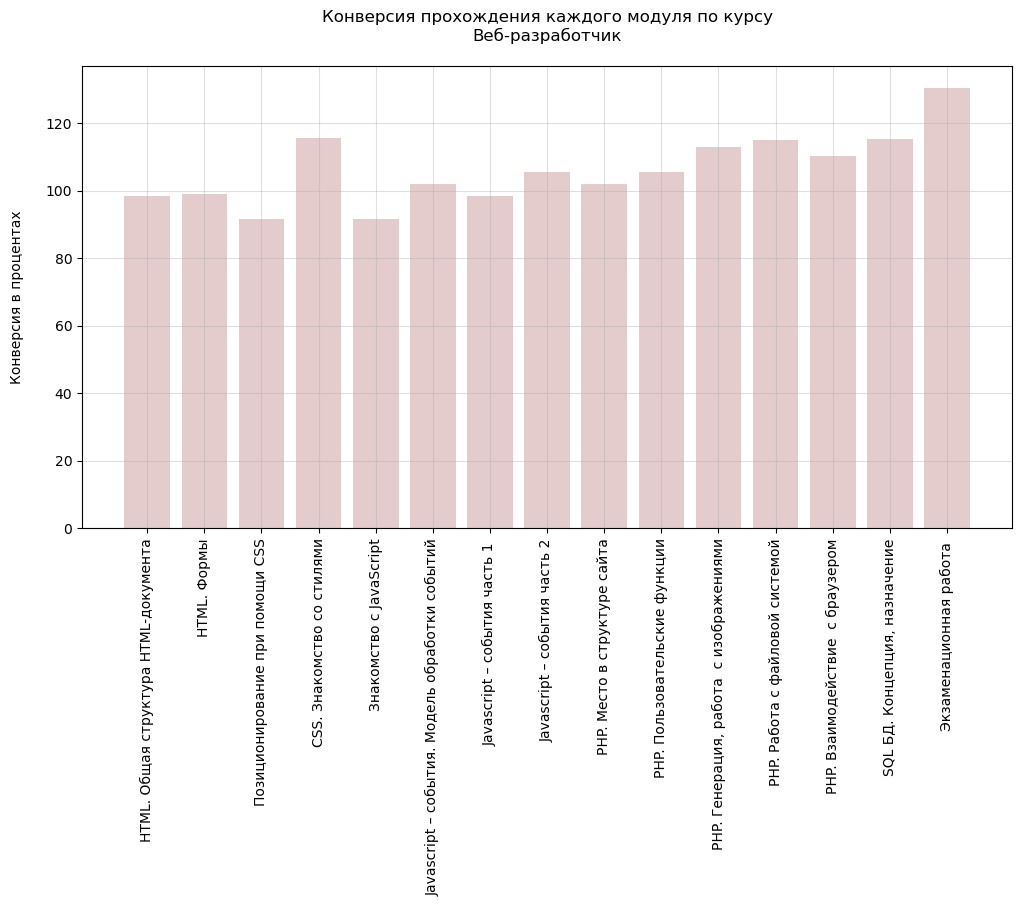

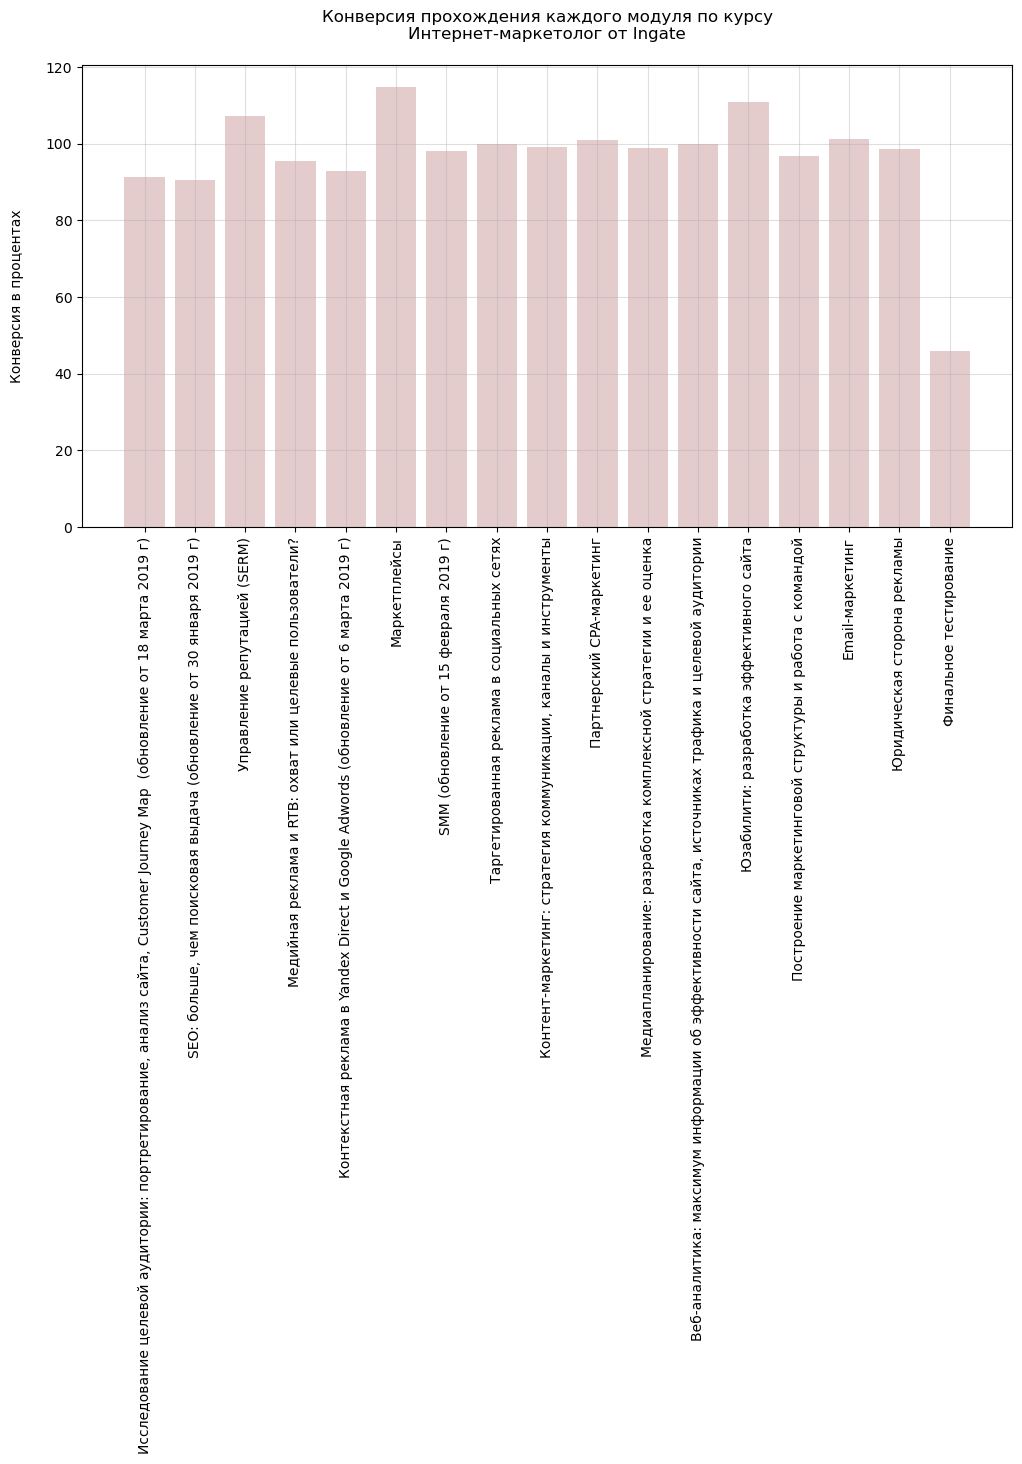

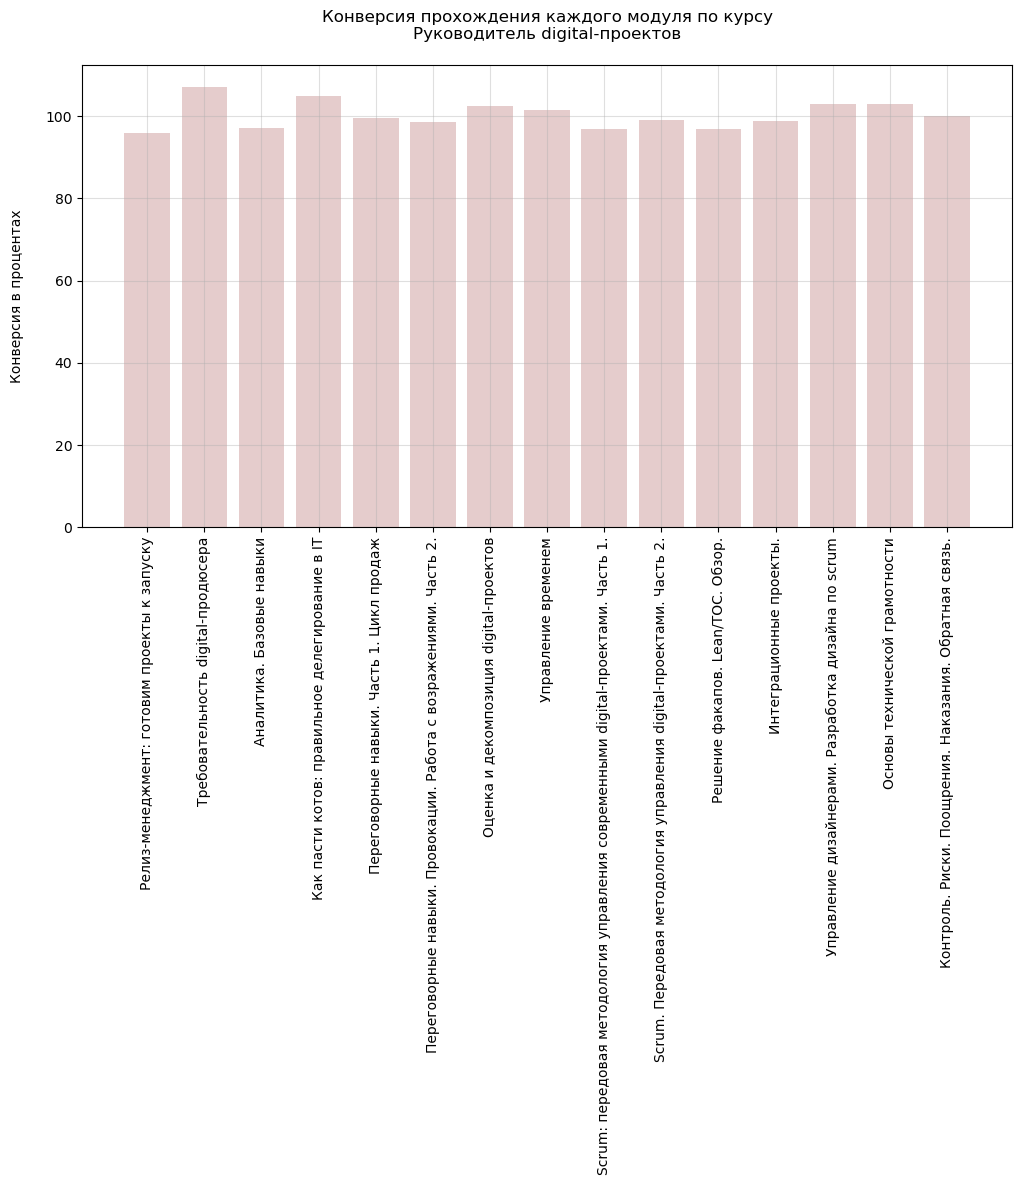

In [63]:
# Построим график конверсии прохождения каждого модуля
for _course in first_module['course_title']:
    
    data = conversion[conversion['course_title'] == _course]
    
    fig, ax = plt.subplots(figsize = (12,6))

    ax.tick_params(axis='x', rotation=90)
    plt.bar(data['module_title'], data['conversion']*100, color = 'maroon', alpha = 0.2)
    
    ax.set_title(f'Конверсия прохождения каждого модуля по курсу\n{_course}\n')

    ax.set_ylabel('Конверсия в процентах\n')
    
    plt.grid(alpha=0.4)
    plt.show()

3. **(m)** Постройте горизонтальный (столбцы должны располагаться горизонтально) bar-chart, отражающий конверсию перехода студентов из одного модуля в другой на каждом курсе. 15 графиков. Графики должны иметь заголовки. Ticks должны содержать номер и название модуля. Цвет столбцов графиков должен содержать информацию о сфере, к которой относится курс (нужна легенда). Прозрачность должна стоять на отметке 0.1. На графики должна быть нанесена линия медианы конверсии для каждого курса. У медианы должен быть свой цвет. Рамок у графиков быть не должно ⭐

In [64]:
# Подготовим данные для построения графика

del courses['id']

conv_by_field = conversion.merge(courses, left_on = 'course_title', 
                                 right_on = 'title', how = 'left')


In [65]:
# Удалим дубликат столбца course_title

del conv_by_field['title']
conv_by_field.head()

course_title                                       module_title  \
0  Excel Базовый            Основной функционал Excel (продолжение)   
1  Excel Базовый                  Формулы и функции Excel. Введение   
2  Excel Базовый  Формулы и функции Excel. Продолжаем работать с...   
3  Excel Базовый     Формулы и функции Excel. Более сложные формулы   
4  Excel Базовый  Формулы и функции Excel. Работа с ошибками, пр...   

   module_number  started_hws  done_hws  conversion     field  
0              2          434     458.0    0.947598  Business  
1              3          398     406.0    0.980296  Business  
2              4          345     387.0    0.891473  Business  
3              5          298     303.0    0.983498  Business  
4              6          263     270.0    0.974074  Business

In [66]:
# создадим датасет с цветами для раскраски графика

color_set = pd.DataFrame({
    'field' : conv_by_field['field'].unique(),
    'color' : ['lightgrey', 'mistyrose', 'rosybrown', 'tan']
})
color_set

field      color
0     Business  lightgrey
1  Development  mistyrose
2    Marketing  rosybrown
3       Design        tan

In [67]:
# Добавим цвета в датасет conv_by_field

conv_by_field = conv_by_field.merge(color_set, on = 'field', how = 'left')
conv_by_field.head()


course_title                                       module_title  \
0  Excel Базовый            Основной функционал Excel (продолжение)   
1  Excel Базовый                  Формулы и функции Excel. Введение   
2  Excel Базовый  Формулы и функции Excel. Продолжаем работать с...   
3  Excel Базовый     Формулы и функции Excel. Более сложные формулы   
4  Excel Базовый  Формулы и функции Excel. Работа с ошибками, пр...   

   module_number  started_hws  done_hws  conversion     field      color  
0              2          434     458.0    0.947598  Business  lightgrey  
1              3          398     406.0    0.980296  Business  lightgrey  
2              4          345     387.0    0.891473  Business  lightgrey  
3              5          298     303.0    0.983498  Business  lightgrey  
4              6          263     270.0    0.974074  Business  lightgrey

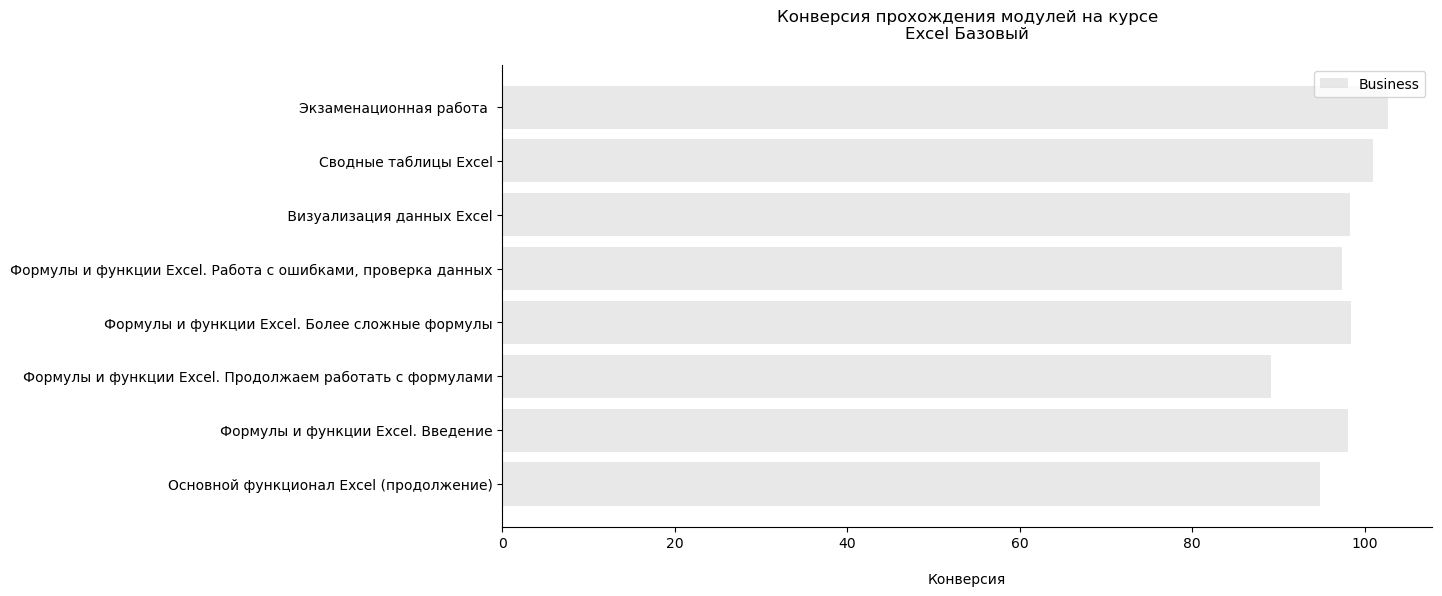

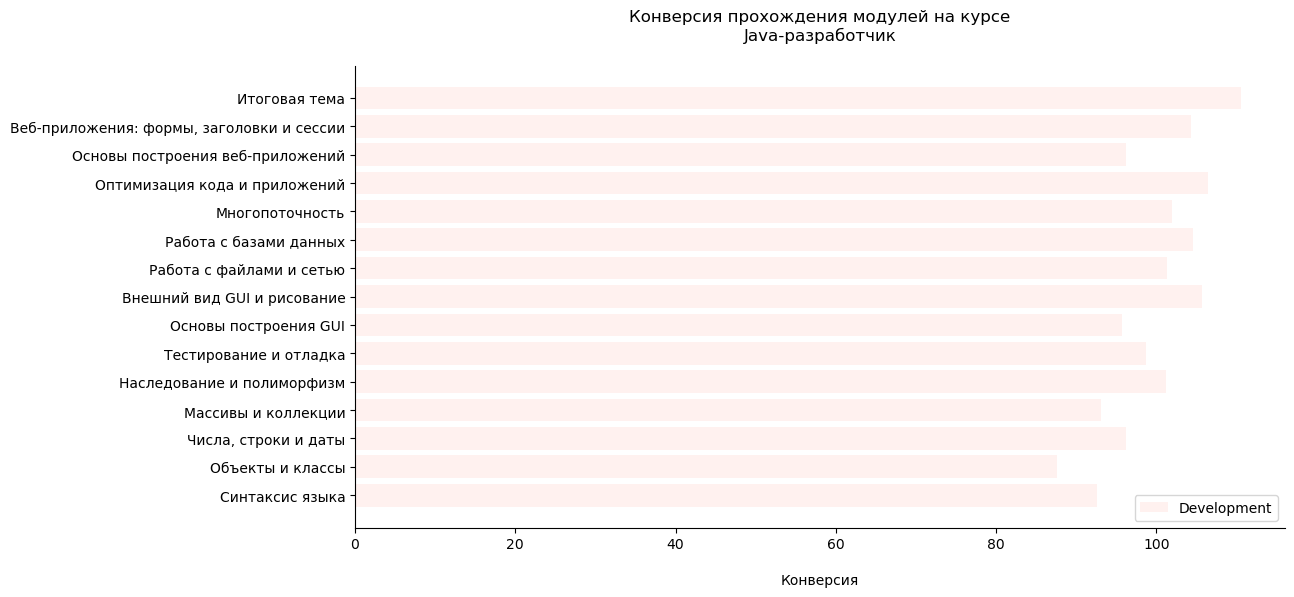

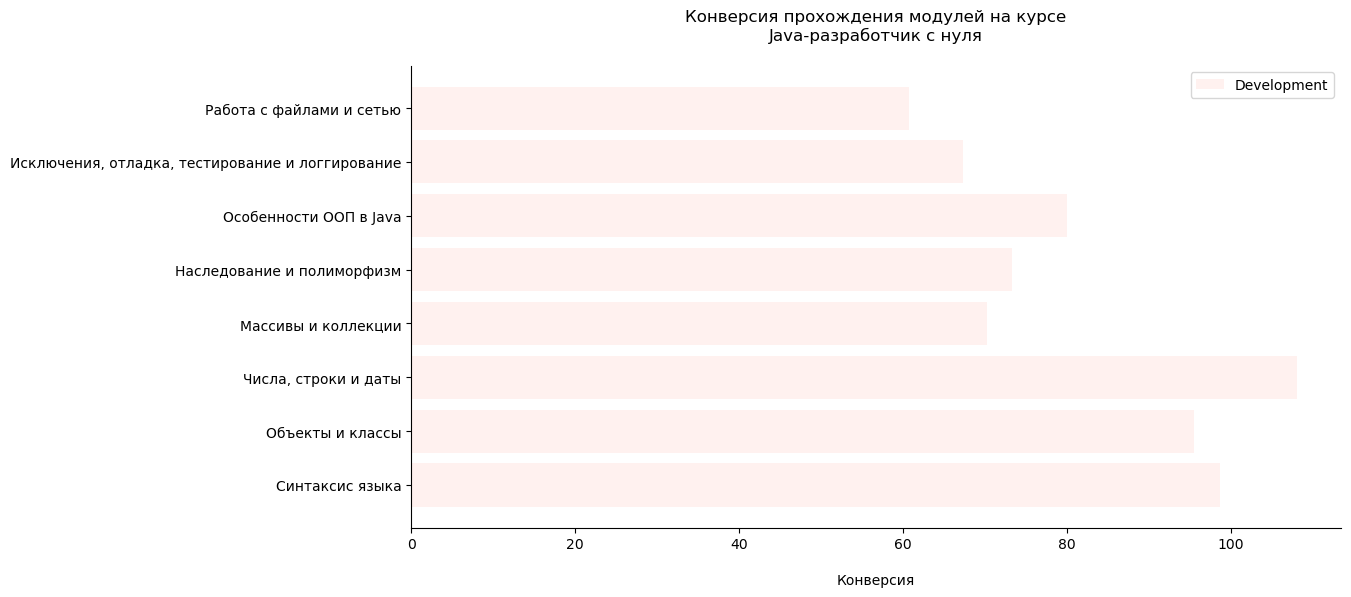

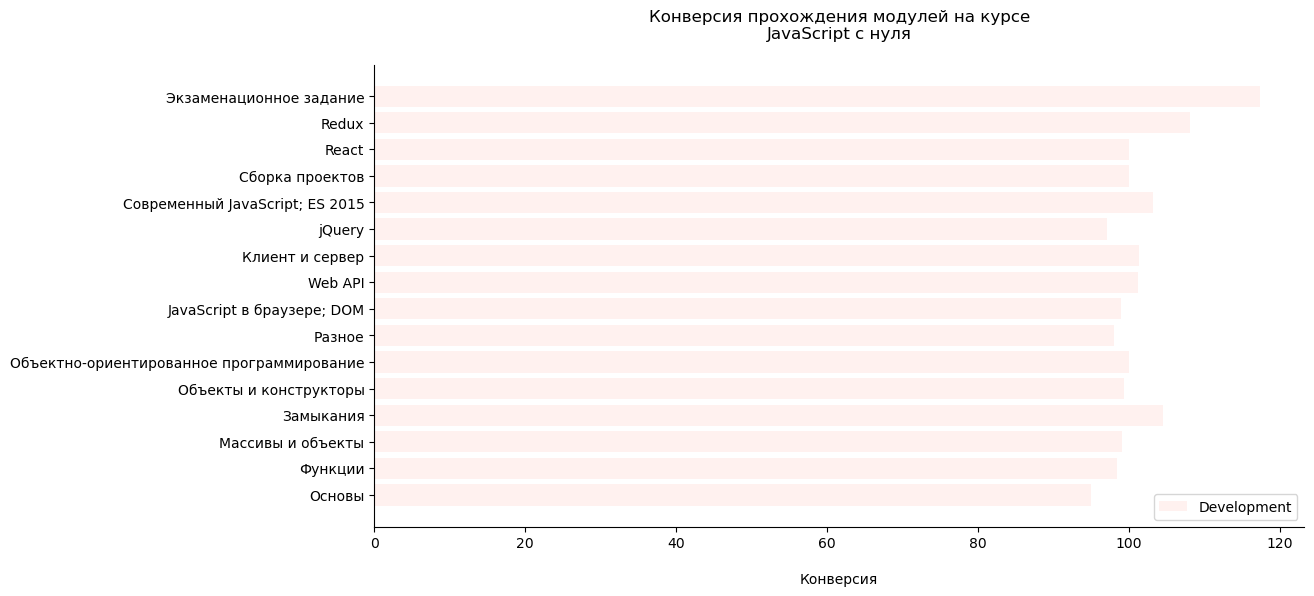

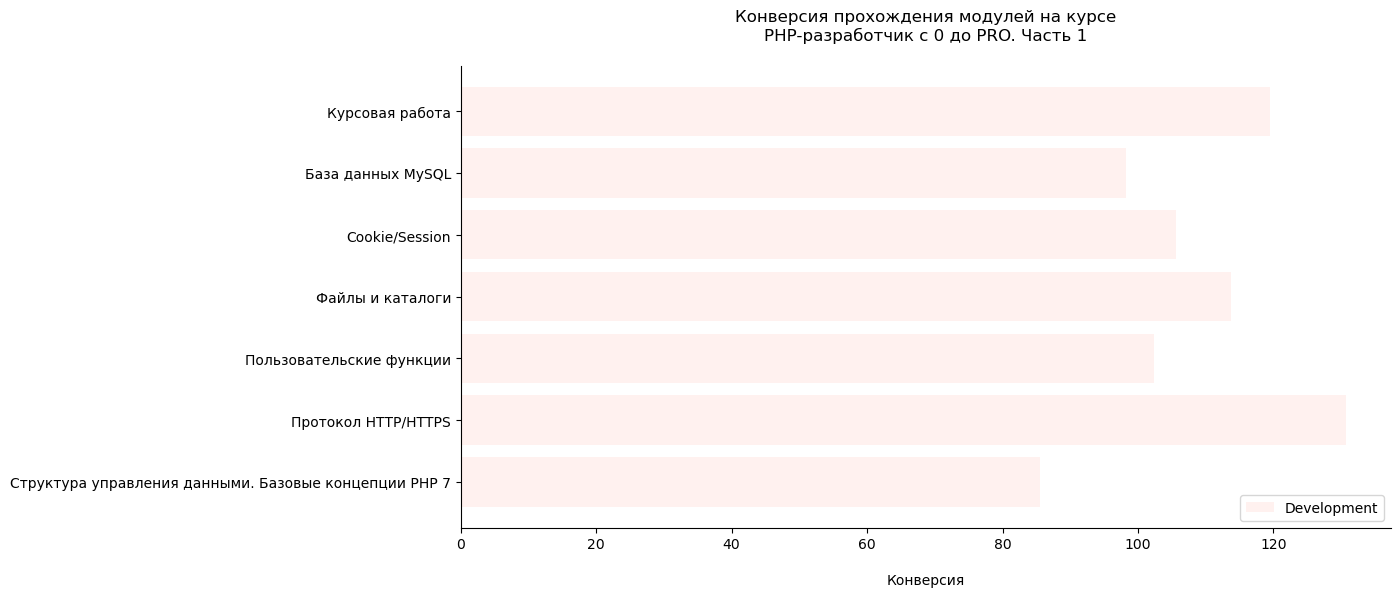

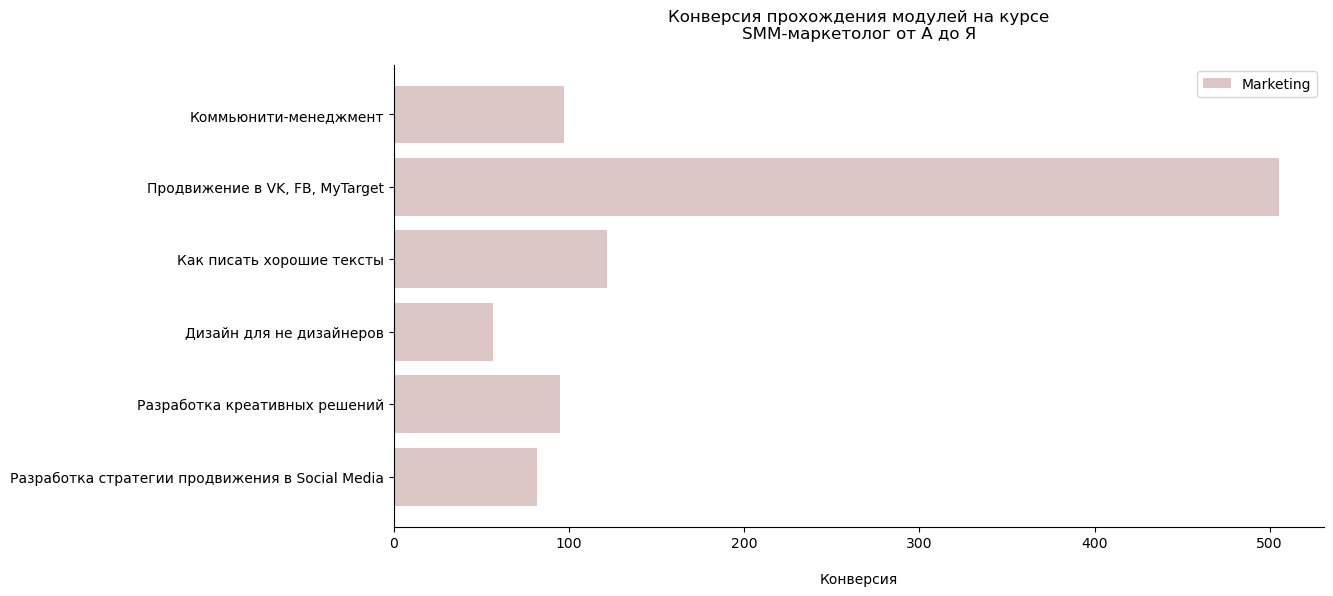

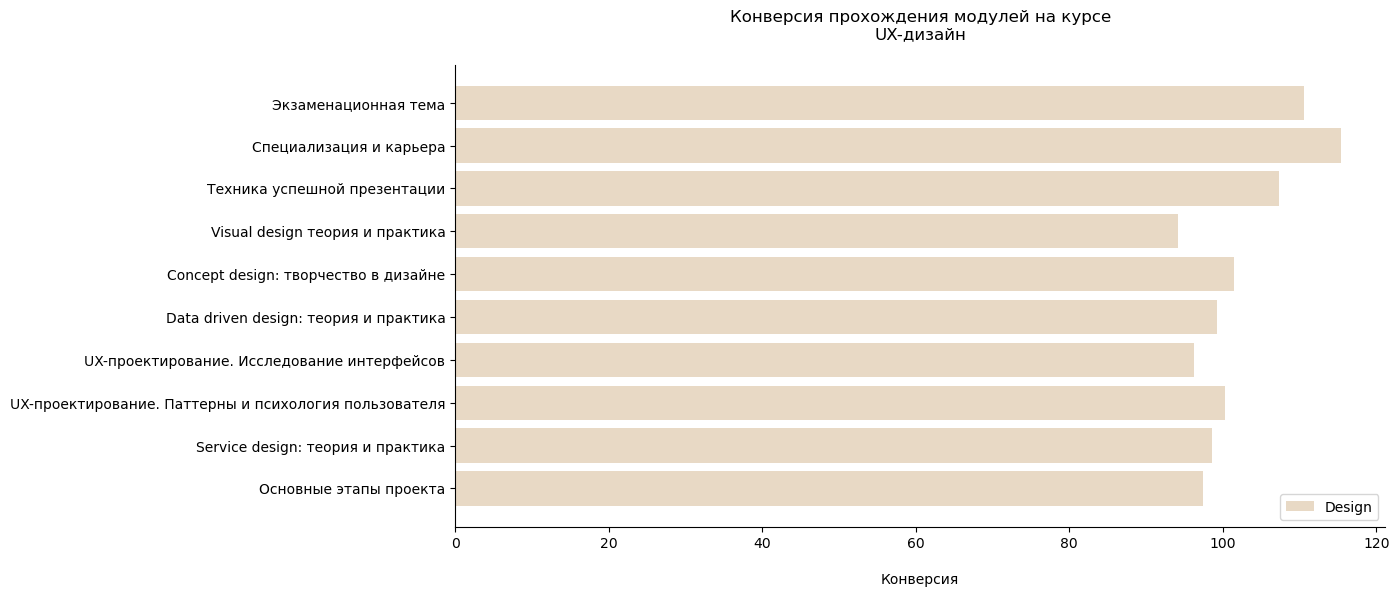

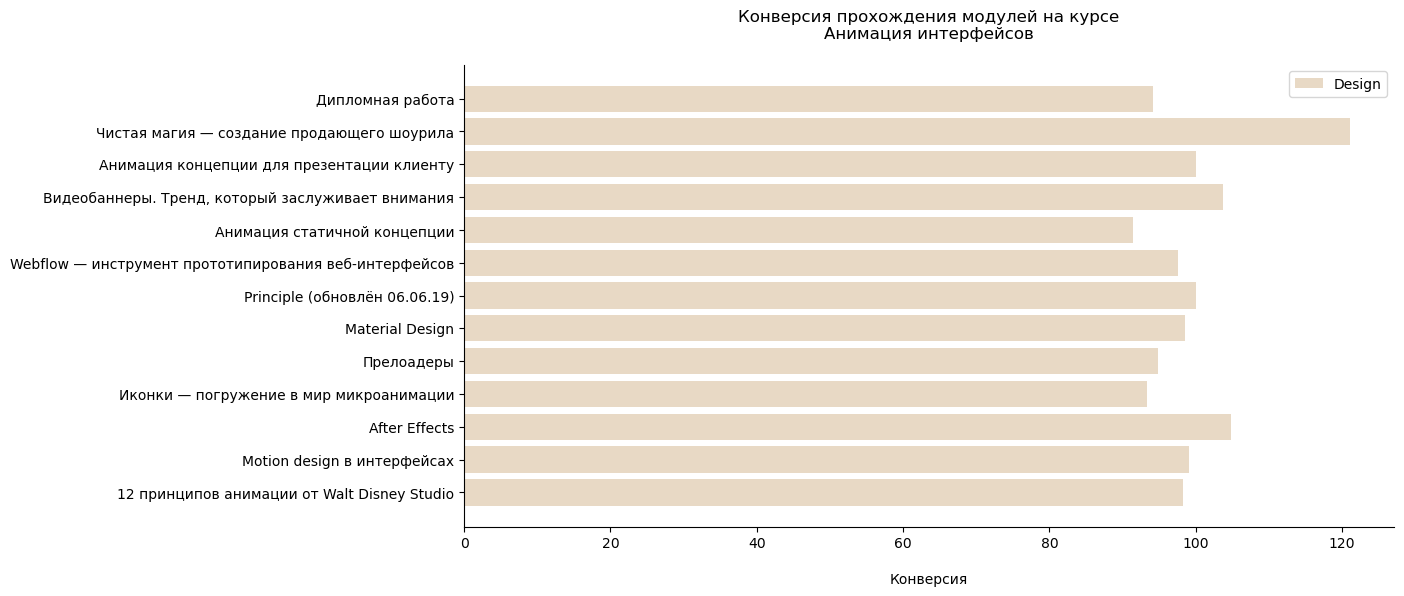

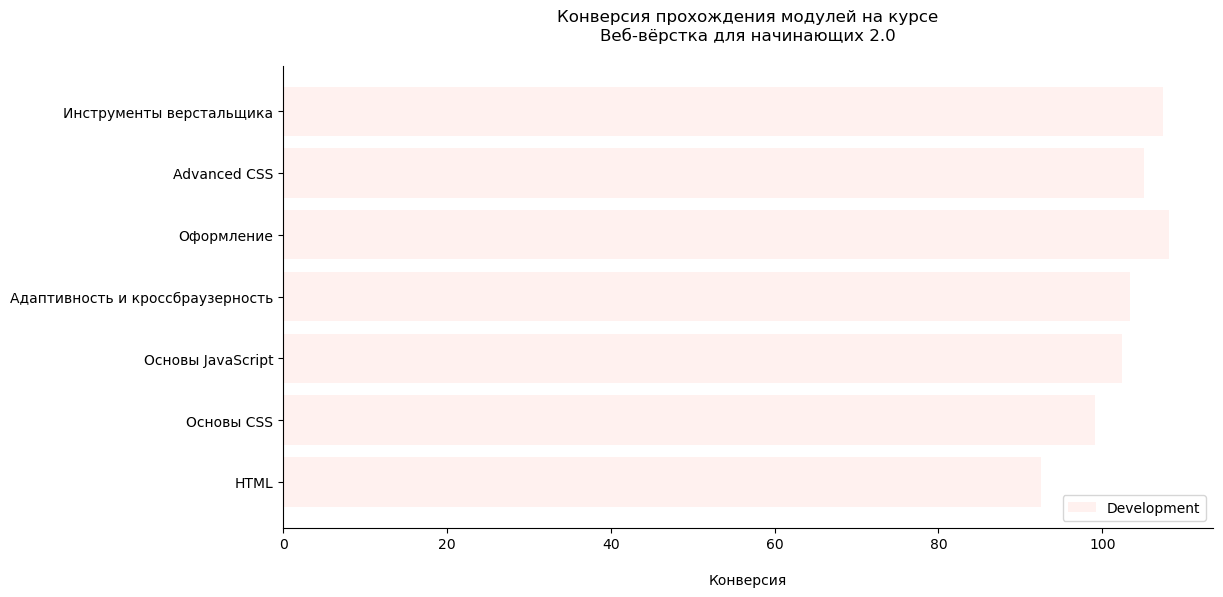

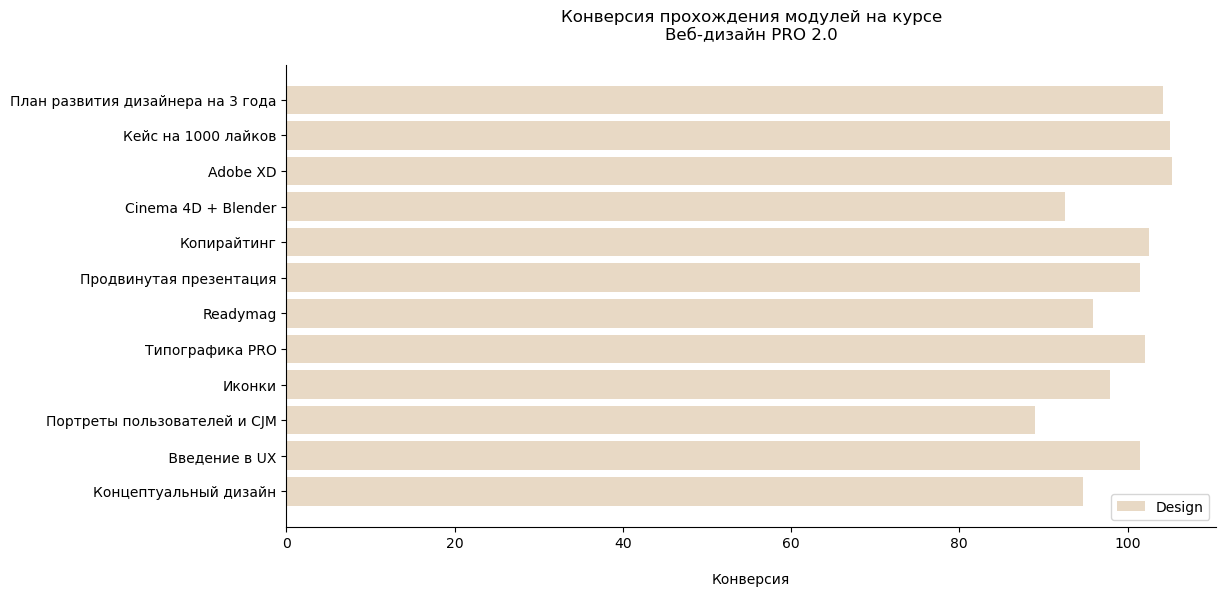

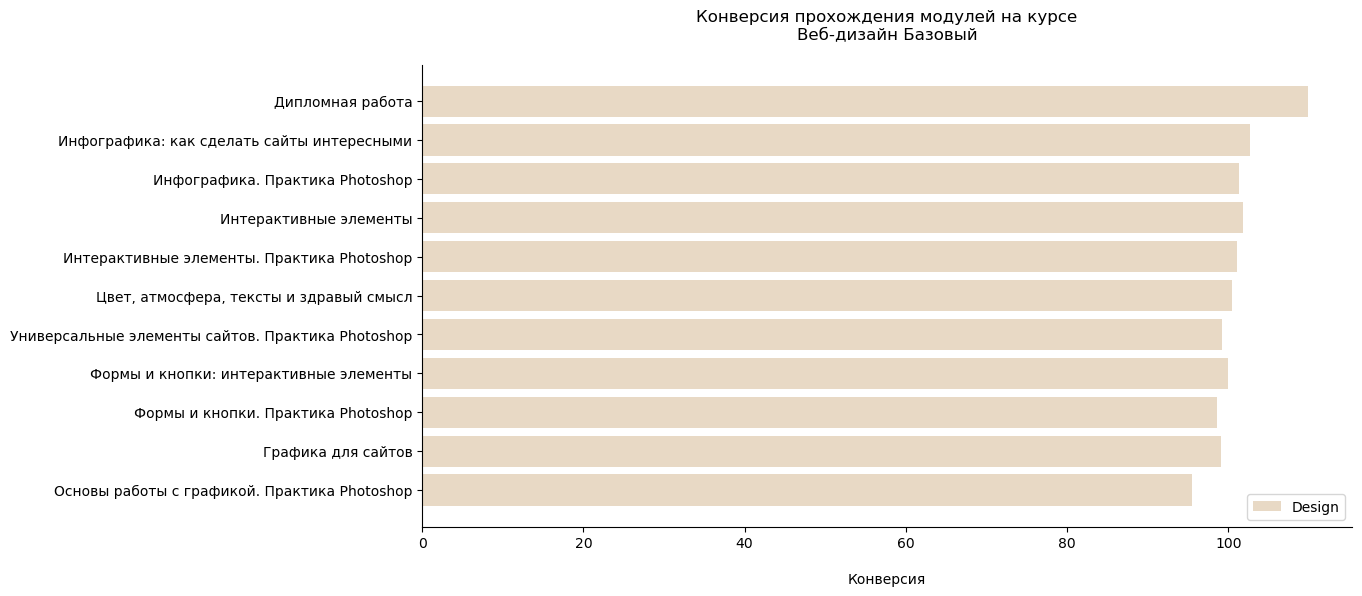

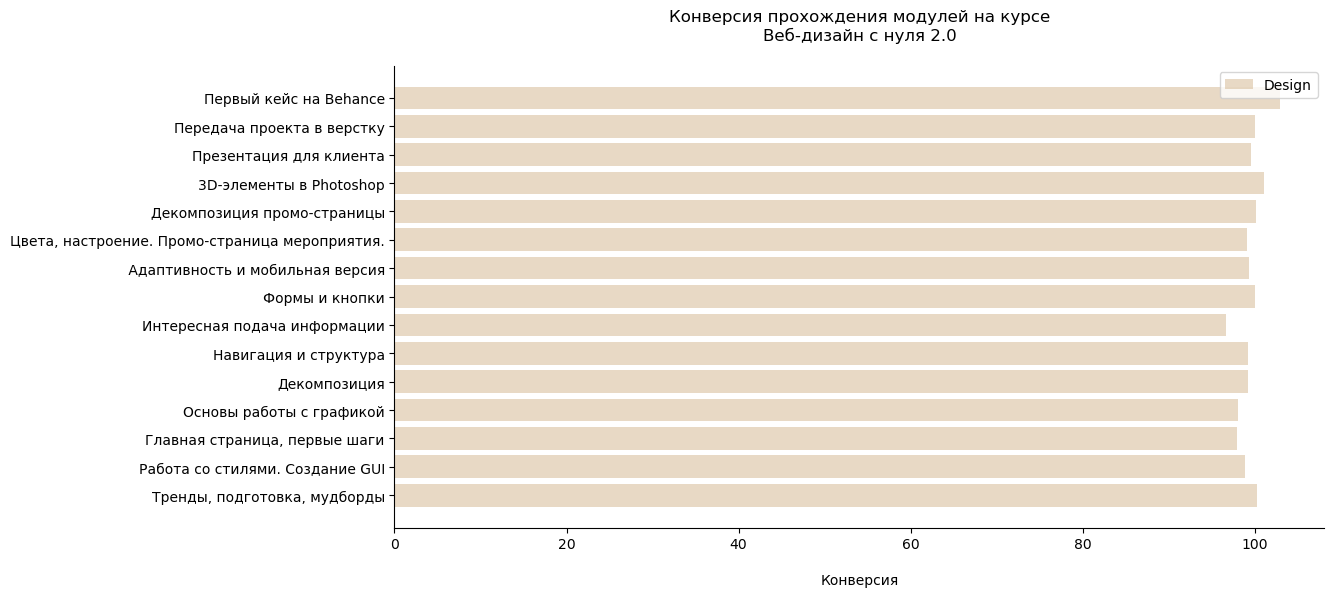

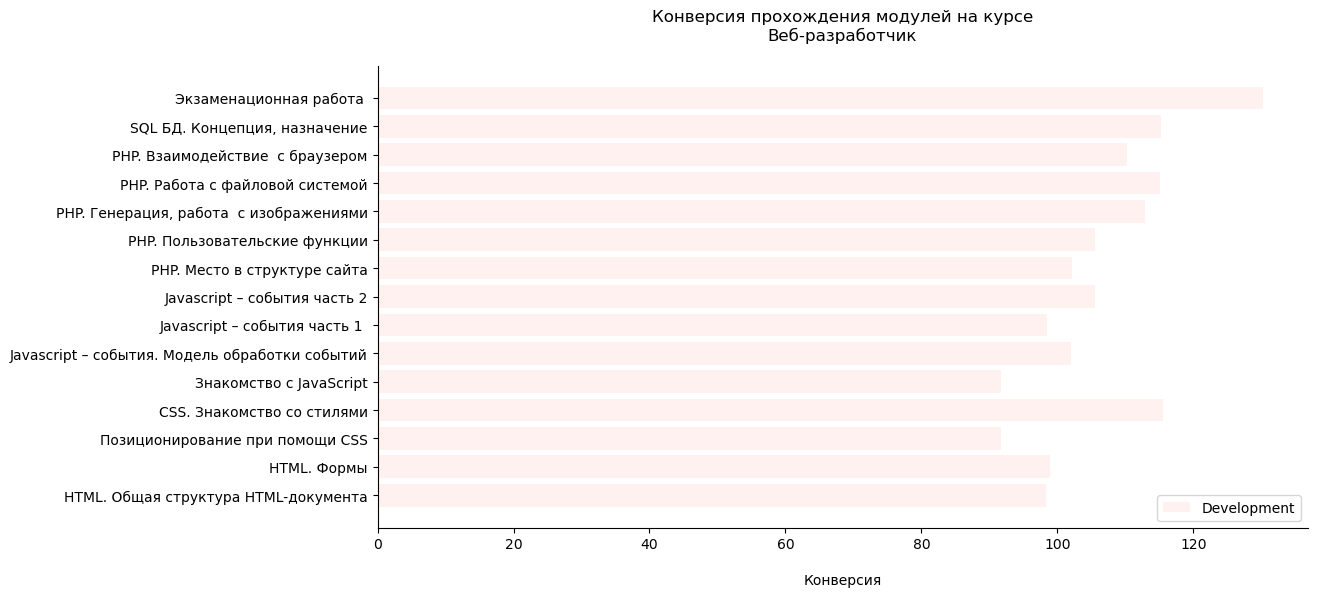

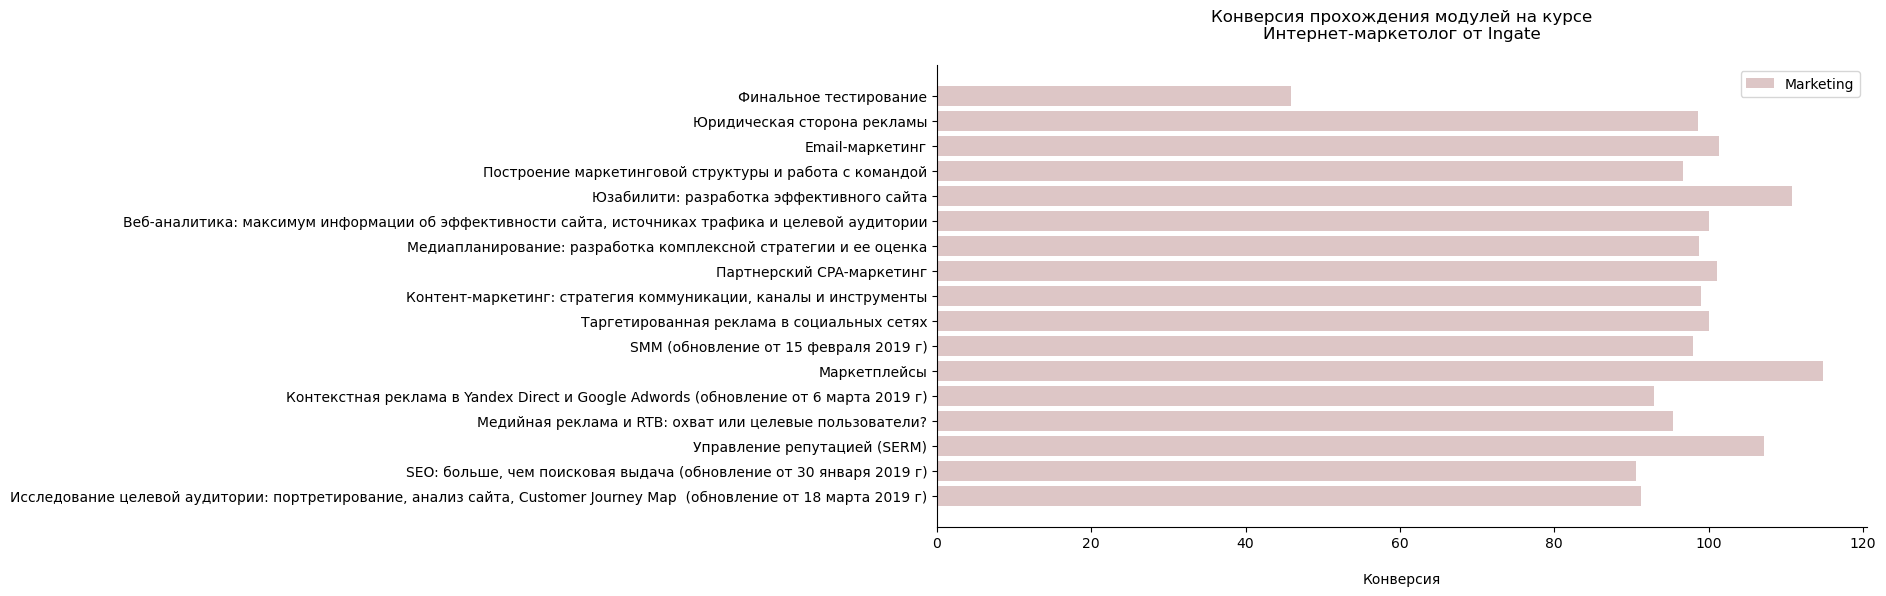

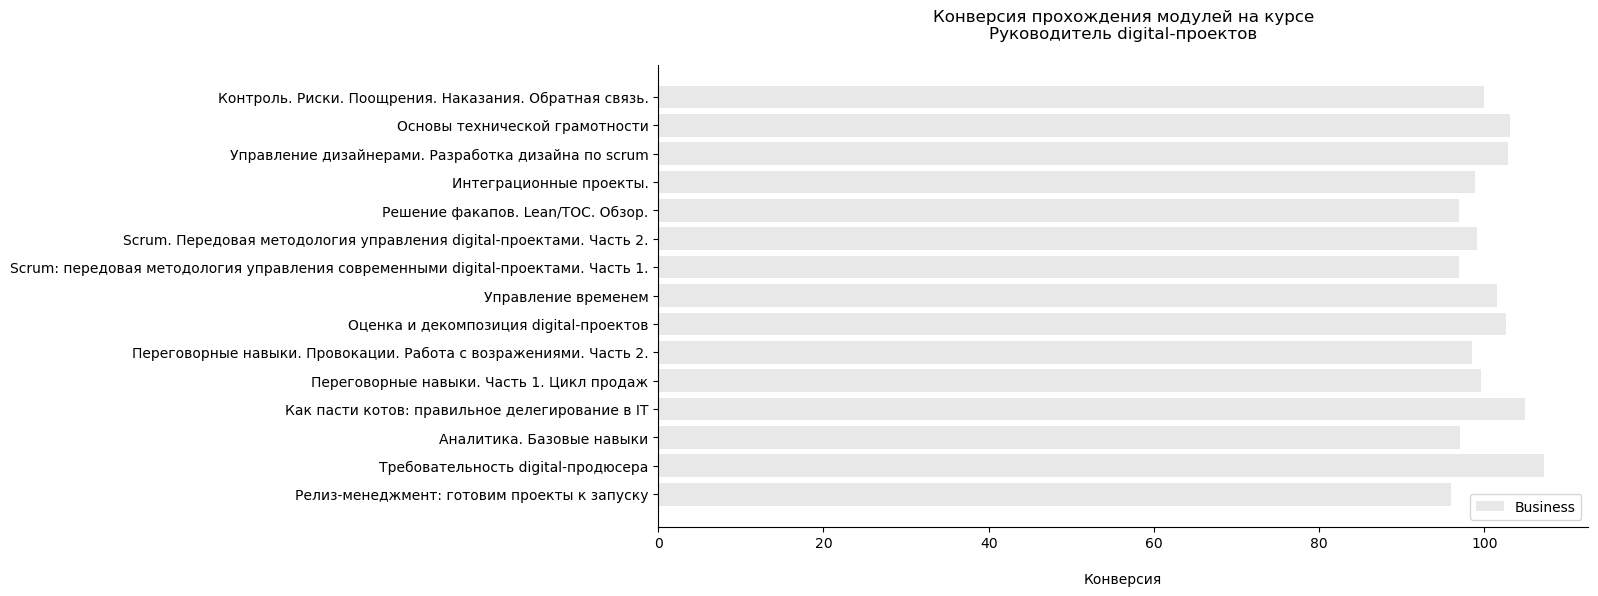

In [68]:
# Построим горизонтальную гистограмму

for _course in first_module['course_title']:
    
    data = conv_by_field[conv_by_field['course_title'] == _course]
    
    fig, ax = plt.subplots(figsize = (12,6))
    
    plt.barh(data['module_title'], data['conversion'] * 100, color=data['color'],
             alpha=0.5)
    
    ax.set_title(f'Конверсия прохождения модулей на курсе\n{_course}\n')
    ax.set_xlabel('\nКонверсия')
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.legend(data['field'])
    plt.show()



4. На основании рассчитанных значений сделайте аналитический вывод (должен быть полным и покрывать все полученные выше метрики).
    

Наблюдется аномально высокая конверсия на курсе "SMM-маркетолог от А до Я". При переходе на модуль "Продвижение в VK, FB, MyTarget" с предыдущего модуля конверсия равняется 505%. Это может быть связано с высоким интересом именно к этому курсу и возможно многие студенты перескакивают другие модули и приступают к изучению именно этого. 
Так же на курсе "Java-разработчик c нуля" наблюдается низкая конверсия при прохождение модулей, а именно ниже 80%. На прошлом этапе исследования, мы рассчитали, что на этом курсе некоторые из модулей на этом курсе требуют от студентов больше времени на прохождение. Есть вероятность, что эти модули оказываются проблемными, о которые студенты спотыкаются в процессе учебы.

В основном конверсия составляет около 90%. Это хороший показатель. Но стоит обратить внимание, что в итоге к дипломным и курсовым работам доходит 1/5 часть студентов. Например, на курсе "JavaScript с нуля" из 400 студентов, начавших обучение, до экзаминационной работы дошли 23 студента. Есть смысл более детально изучить проблемы, с которыми сталкиваются студенты во время прохождения курсов, чтобы минимизировать вероятность причины этому в контенте курсов. А также рассмотреть варианты дополнительной мотивации для студентов, рассылки напоминаний о том, чтобы вернуться к выполнению заданий и другие.

## 5. Метрика успеваемости 

&nbsp;&nbsp;&nbsp;&nbsp;*(необязательное задание)*

Иногда студенты берут курсы, которые оказываются для них неподъёмными. Это может быть как по причинам недостаточной изначальной подготовки, так и по причинам, связанным с низкой мотивацией студента. Для улучшения качества контента полезно выявить причину. На основании имеющихся данных придумайте метрику успеваемости студента. **Обоснуйте её.** Выявите таких студентов на каждом курсе, чтобы предоставить продюсерам список проблемных студентов. 

In [ ]:
### YOUR CODE HERE ###


